# Projet n°4 : Anticipez les besoins en consommation de bâtiments à Seattle

# I. Importer les librairies & le fichier au format 'csv'

**Importer les librairies utilisées dans ce notebook jupyter**

In [3]:
# Librairies de base python 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
import math

# Projection sur une cartographie
import folium
import folium.plugins

# Analyse statistique
from scipy import stats
from scipy.stats import norm
import statsmodels.formula.api as smf

# Pré-traitement des données avec scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

**Importer le fichier 'csv' - 2016_Building_Energy_Benchmarking**

In [2]:
# Importer le fichier 'csv' avec Pandas, dans un dataframe 'df'
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

# II. Nettoyage & description des données

## 1. Description généraliste du dataframe contenant les données brutes

A. Utilisation de la fonction 'info'

In [3]:
# Afficher les généralités du ficher
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

B. Utilisation de la fonction 'describe' pour les données quantitatives

In [4]:
# Utilisation de la foncion describe pour les généralités statistiques
pd.set_option('display.max_columns', None)
df.describe().round()

OSEBuildingID  DataYear  ZipCode  CouncilDistrictCode  Latitude  \
count         3376.0    3376.0   3360.0               3376.0    3376.0   
mean         21209.0    2016.0  98117.0                  4.0      48.0   
std          12224.0       0.0     19.0                  2.0       0.0   
min              1.0    2016.0  98006.0                  1.0      47.0   
25%          19991.0    2016.0  98105.0                  3.0      48.0   
50%          23112.0    2016.0  98115.0                  4.0      48.0   
75%          25994.0    2016.0  98122.0                  7.0      48.0   
max          50226.0    2016.0  98272.0                  7.0      48.0   

       Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
count     3376.0     3376.0             3368.0          3376.0   
mean      -122.0     1969.0                1.0             5.0   
std          0.0       33.0                2.0             5.0   
min       -122.0     1900.0                0.0             0.0   
25%       -122.0     1948.0                1.0             2.0   
50%       -122.0     1975.0                1.0             4.0   
75%       -122.0     1997.0                1.0             5.0   
max       -122.0     2015.0              111.0            99.0   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count            3376.0              3376.0                  3376.0   
mean            94834.0              8002.0                 86832.0   
std            218838.0             32327.0                207940.0   
min             11285.0                 0.0                  3636.0   
25%             28487.0                 0.0                 27756.0   
50%             44175.0                 0.0                 43216.0   
75%             90992.0                 0.0                 84276.0   
max           9320156.0            512608.0               9320156.0   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count                     3356.0                           1679.0   
mean                     79178.0                          28444.0   
std                     201703.0                          54393.0   
min                       5656.0                              0.0   
25%                      25095.0                           5000.0   
50%                      39894.0                          10664.0   
75%                      76200.0                          26640.0   
max                    9320156.0                         686750.0   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                           596.0           2533.0            3369.0   
mean                          11739.0             68.0              55.0   
std                           29331.0             27.0              56.0   
min                               0.0              1.0               0.0   
25%                            2239.0             53.0              28.0   
50%                            5043.0             75.0              39.0   
75%                           10139.0             90.0              60.0   
max                          459748.0            100.0             834.0   

       SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count              3370.0              3367.0                3367.0   
mean                 57.0               134.0                 138.0   
std                  57.0               139.0                 139.0   
min                   0.0                 0.0                  -2.0   
25%                  29.0                75.0                  78.0   
50%                  41.0                96.0                 101.0   
75%                  64.0               144.0                 148.0   
max                 834.0              2620.0                2620.0   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count               3371.0                 3370.0          3367.0   
mean             540

Première vision de nos variables qualitatives.
Selon les informations présentées ci-dessus, nous pouvons voir que plusieurs colonnes présentent peu d'intérêt à notre étude.
- OSEBuilding : valeur propre associée à chaque bâtiment
- DataYear : valeur unique qui est 2016
- ZipCode : peu d'information dans cette variable liée à la consommation d'un bâtiment

Valeurs qui semblent aberrantes ou peu probable à vérifier : 
- 99 étages : nom du bâtiment 'Seattle Chinese Baptist Church', après des recherches sur internet, la valeur de 99 n'est pas en accord avec la réalité (suppression de la ligne)
*https://en.wikipedia.org/wiki/Chinese_Baptist_Church*
La seconde valeur de 76 étages est cohérente avec la réalité car elle concerne le Columbia Center, qui est très grand building du centre de Seattle.
- Valeurs négatives pour l'électricité et les émissions de CO² : la valeur semble à l'opposé du propos que nous traitons ici, qui est la consommation. Néanmoins, après des recherhes sur internet, on apprend que la bâtiement en question est un bâtiment qui pourrait qualifier de nouvelle génération, qui produit de l'énergie et limite ses rejets de CO². Néanmoins, dans un premier temps je décide de supprimer cette ligne car trop peu représentative car un seul bâtiment concerné.
*https://www.inmesol.com/blog/bullittt-center-le-batiment-commercial-le-plus-respectueux-de-lenvironnement-du-monde/*
- On voit également que le min pour notre colonne correspondant au nombre de bâtiment est de 0, alors que cela est impossible.
Nous allons remplacer les 0, par 1.

In [5]:
count_zeros = (df['NumberofBuildings'] == 0).sum()
print("Nombre de valeurs égales à zéro dans la colonne 'NumberofBuildings':", count_zeros)
df['NumberofBuildings'] = df['NumberofBuildings'].replace(0, 1)

Nombre de valeurs égales à zéro dans la colonne 'NumberofBuildings': 92


Suppression des lignes où les valeurs sont négatives, cela concerne les variables 'Electricité' & 'Emissions totales'et pour la valeur aberrante de 99 étages

In [6]:
# Liste des colonnes à vérifier
colonnes_a_verifier = ['Electricity(kBtu)', 'TotalGHGEmissions']

# Supprimer les lignes où les valeurs dans les colonnes spécifiées sont négatives
for col in colonnes_a_verifier:
    df = df[df[col] >= 0]

# Supprimer la ligne où NumberofFloors est égal à 99
df = df[df['NumberofFloors'] != 99]

C. Utilisation de la fonction 'describe' pour les données qualitatives

In [7]:
# Utilisation de la foncion describe pour les généralités statistiques pour les variables qualitatives
df.describe(include="object").transpose()

count unique                   top  freq
BuildingType                   3365      8        NonResidential  1456
PrimaryPropertyType            3365     24  Low-Rise Multifamily   980
PropertyName                   3365   3351       Northgate Plaza     3
Address                        3365   3343    2203 Airport Way S     4
City                           3365      1               Seattle  3365
State                          3365      1                    WA  3365
TaxParcelIdentificationNumber  3365   3257            1625049001     8
Neighborhood                   3365     19              DOWNTOWN   572
ListOfAllPropertyUseTypes      3365    466   Multifamily Housing   866
LargestPropertyUseType         3354     56   Multifamily Housing  1667
SecondLargestPropertyUseType   1679     50               Parking   976
ThirdLargestPropertyUseType     596     44          Retail Store   110
YearsENERGYSTARCertified        119     65                  2016    14
ComplianceStatus               3365      4             Compliant  3205
Outlier                          32      2           Low outlier    23

Ici, nous avons un première vision de nos variables qualitatives.

On remarque d'emblée deux colonnes avec peu d'intérêt car présence d'une valeur unique, donc aucune variation.
- City
- State

A l'inverse, nous avons des colonnes avec une très forte variétés de modalités et qui semblent peu intéressantes pour notre étude de consommation.
- TaxParceldentificationNumber
- Address

D. Structure du fichier et taux de remplissage

In [8]:
# Nombre de doublons
doublons = df.duplicated().sum()
print('Nombre de doublons :',doublons)

# Compter le nombre de colonnes vides et de lignes vides
colonnes_vides = sum(df.isnull().all())
lignes_vides = sum(df.isnull().all(axis=1))

print("Nombre de colonnes vides :", colonnes_vides)
print("Nombre de lignes vides :", lignes_vides)

# Suppression de la colonne vide
df = df.dropna(axis=1, how='all')

# Format du fichier
print('Format du dataframe :', df.shape)

# Taux de remplissage du fichier
print('Taux de remplissage :', round(((df.size - sum(df.isnull().sum())) / df.size) * 100, 2),'%')

Nombre de doublons : 0
Nombre de colonnes vides : 1
Nombre de lignes vides : 0
Format du dataframe : (3365, 45)
Taux de remplissage : 89.19 %


E. Renommer certaines colonnes pour faciliter la compréhension des données et leur gestion pendant l'analyse

In [9]:
# Renommer les colonnes du dataframe pour simplifier la compréhension pendant l'analyse
df = df.rename(columns=
                  {'SiteEUI(kBtu/sf)': 'Intensite',
                   'SiteEUIWN(kBtu/sf)': 'Intensite_WN',
                   'SourceEUI(kBtu/sf)': 'Intensite_source',
                   'SourceEUIWN(kBtu/sf)': 'Intensite_source_WN',
                   'SiteEnergyUse(kBtu)': 'Conso_Totale',
                   'SiteEnergyUseWN(kBtu)': 'Conso_Totale_WN',
                   'SteamUse(kBtu)': 'Conso_Vapeur_kBtu',
                   'Electricity(kWh)': 'Conso_Elec_kWh',
                   'Electricity(kBtu)': 'Conso_Elec_kBtu',
                   'NaturalGas(therms)': 'Conso_GazNat_therms',
                   'NaturalGas(kBtu)': 'Conso_GazNat_kBtu',
                   'TotalGHGEmissions': 'Emissions_Totales',
                   'GHGEmissionsIntensity': 'Intensite_Emissions',
                   'NumberofBuildings': 'NbBat',
                   'NumberofFloors': 'NbEtages',
                   'PropertyGFATotal': 'Superficie_totale',
                   'PropertyGFAParking': 'Surface_parking',
                   'PropertyGFABuilding(s)': 'Surface_totale',
                   'LargestPropertyUseTypeGFA': 'Surface_1Usage',
                   'SecondLargestPropertyUseTypeGFA': 'Surface_2Usage',
                   'ThirdLargestPropertyUseTypeGFA': 'Surface_3Usage',
                   'BuildingType': 'TypeBatiment',
                   'PrimaryPropertyType': 'PrincipalUsage',
                   'ListOfAllPropertyUseTypes': 'Liste_Usage',
                   'LargestPropertyUseType': '1_Usage',
                   'SecondLargestPropertyUseType': '2_Usage',
                   'ThirdLargestPropertyUseType': '3_Usage'})

## 2. Opérations de filtrage et suppression des colonnes non-utiles à l'étude

A. Filtrer le dataframe uniquement sur les propriétés non-résidentielles & les immeubles dits "compliant'

In [10]:
df.shape

(3365, 45)

In [11]:
# Filtrer le dataframe en gardant uniquement les lignes concernant des propriétés non-résidentielles
df = df[df['TypeBatiment'].isin(['NonResidential', 'Nonresidential COS', 'Campus', 'SPS-District K-12', 'Nonresidential WA'])]

print(df.shape)

# Filtrer les propriétés définies comme 'Compliant' dans le fichier
df = df[df['ComplianceStatus'] == 'Compliant']

print(df.shape)

(1664, 45)
(1546, 45)


In [12]:
# Création de la carte
ma_carte = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajout des marqueurs pour chaque bâtiment
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['PropertyName']).add_to(ma_carte)

# Affichage de la carte
ma_carte.save('Seattle_Map.html')

B. Suppression des colonnes non-utiles à l'étude

In [13]:
# Liste des colonnes à supprimer
columns_to_delete = ['Address',
                     'City',
                     'OSEBuildingID',
                     'Neighborhood',
                     'State',
                     'TaxParcelIdentificationNumber',
                     'ZipCode',
                     'DataYear',
                     'DefaultData',
                     'ComplianceStatus',
                     'CouncilDistrictCode',
                     'Outlier']

# Utilisation de la méthode drop() pour supprimer les colonnes spécifiées
df = df.drop(columns_to_delete, axis=1)

C. Gestion des colonnes avec deux unités de mesure différentes pour le gaz & l'électricité

Nous remarquons que nous avons dans notre dataframe, deux colonnes concernant la consommation d'électricité où seule l'unité de mesure diffère entre les deux. L'ensemble de nos colonnes concernant la consommation d'énergie sont en kBtu, abréviation de 'British Thermal unit', en ce sens, il serait donc logique de garder la colonne pour l'électricité en kBtu à l'instar des colonnes paires.
Cependant, il est intéressant tout de même vérifier si nos deux colonnes sont bien identiques avant de supprimer la colonne la colonne en kWh.
Sachant que : 1 watt correspond à 3,415 BTU.
Nous sommes dans la même situation avec les variables concernant la consommation en gaz naturel.

In [14]:
# Calcul du coefficient de corrélation entre les deux colonnes 
corr_elec = df['Conso_Elec_kWh'].corr(df['Conso_Elec_kBtu']).round(6)
corr_gaz = df['Conso_GazNat_kBtu'].corr(df['Conso_GazNat_therms']).round(6)
print('Corrélation pour les variables concernant l\'électricité :',corr_elec)
print('Corrélation pour les variables concernant le gaz naturel :',corr_gaz)

Corrélation pour les variables concernant l'électricité : 1.0
Corrélation pour les variables concernant le gaz naturel : 1.0


Graphique en nuage de points pour les variables 'électricité'

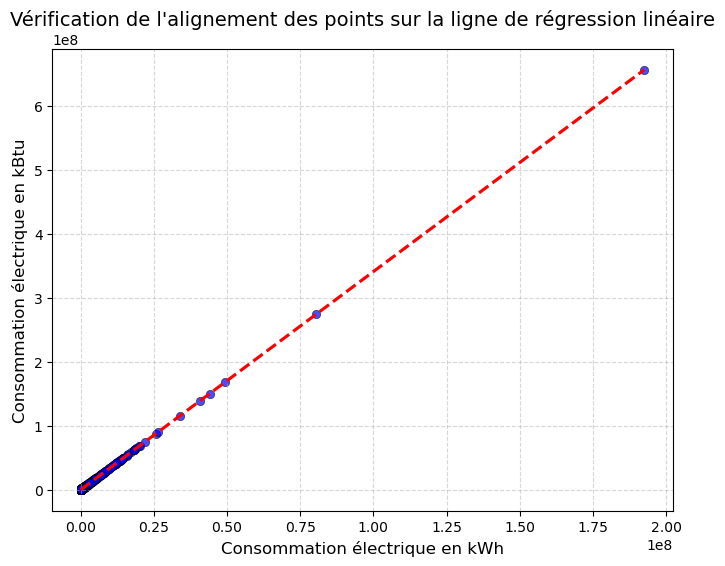

In [15]:
# Créer le graphique
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Conso_Elec_kWh", y="Conso_Elec_kBtu", data=df, alpha=0.7, color='blue', edgecolor='k')  # Couleur des points avec bordure noire

# Ajouter une ligne de régression linéaire avec un style personnalisé
sns.regplot(x="Conso_Elec_kWh", y="Conso_Elec_kBtu", data=df, scatter=False, line_kws={"color": "red", "linestyle": "--"})  

# Nom des axes et titre avec une police plus grande
plt.xlabel("Consommation électrique en kWh", fontsize=12)
plt.ylabel("Consommation électrique en kBtu", fontsize=12)
plt.title("Vérification de l'alignement des points sur la ligne de régression linéaire", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.5)

# Afficher le graphique
plt.show()

Graphique en nuage de points pour les variables 'gaz naturel'

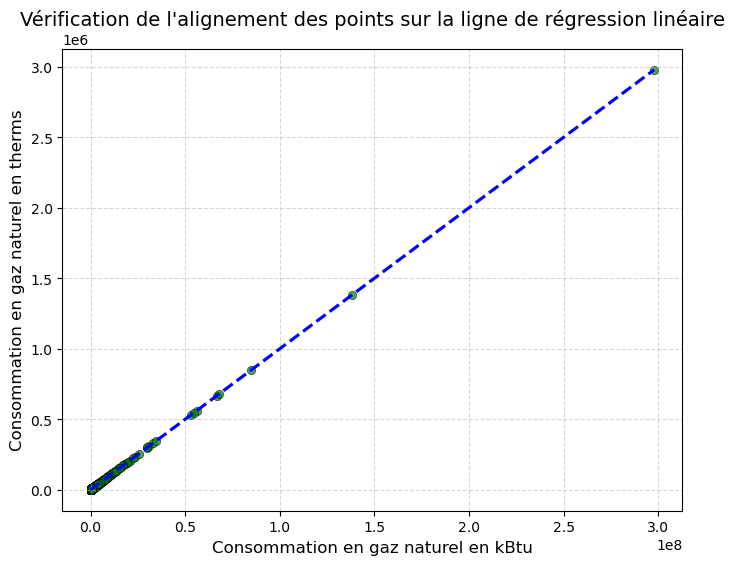

In [16]:
# Créer le graphique
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Conso_GazNat_kBtu", y="Conso_GazNat_therms", data=df, alpha=0.7, color='green', edgecolor='k')

# Ajouter une ligne de régression linéaire avec un style personnalisé
sns.regplot(x="Conso_GazNat_kBtu", y="Conso_GazNat_therms", data=df, scatter=False, line_kws={"color": "blue", "linestyle": "--"})  

# Nom des axes et titre avec une police plus grande
plt.xlabel("Consommation en gaz naturel en kBtu", fontsize=12)
plt.ylabel("Consommation en gaz naturel en therms", fontsize=12)
plt.title("Vérification de l'alignement des points sur la ligne de régression linéaire", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.5)

# Afficher le graphique
plt.show()

Après vérification, avec le coefficient de corrélation ainsi que l'alignement des points sur la droite de régression linéaire, nous pouvons supprimer la colonne pour la consommation d'électricité en kWh, sans perdre d'information. Même méthode pour les deux variables pour le gaz naturel.

In [17]:
# Supprimer les colonnes pour la consommation en électricité en kWh et la consommation en gaz naturel en therms
df = df.drop('Conso_Elec_kWh', axis=1)
df = df.drop('Conso_GazNat_therms', axis=1)

D. Le cas des colonnes indexées ou non avec les données météorologiques

Il y a 3 paires de variables concernées : 

- L'intensité de la consommation : 'Intensite' & 'Intensite_WN'
- La consommation totale de la propriété : 'Conso_Totale' & 'Conso_Totale_WN'
- L'intensité à la source : 'Intensite_source' & 'Intensite_source_WN'

In [18]:
# Calcul des coefficients de corrélation entre les variables
corr_intensite = df['Intensite'].corr(df['Intensite_WN']).round(6)
corr_consototale = df['Conso_Totale'].corr(df['Conso_Totale_WN']).round(6)
corr_intSource = df['Intensite_source'].corr(df['Intensite_source_WN']).round(6)

# Afficher les résultats
print('Coefficent de corrélation entre les deux variables liées à l\'intensité :', corr_intensite)
print('Coefficent de corrélation entre les deux variables liées à la consommation totale :', corr_consototale)
print('Coefficent de corrélation entre les deux variables liées à l\'intensité à la source :', corr_intSource)

Coefficent de corrélation entre les deux variables liées à l'intensité : 0.992824
Coefficent de corrélation entre les deux variables liées à la consommation totale : 0.70244
Coefficent de corrélation entre les deux variables liées à l'intensité à la source : 0.993699


Nous avons une divergence plutôt marquée concernant la consommation totale & consommation totale indexée aux données météorologiques

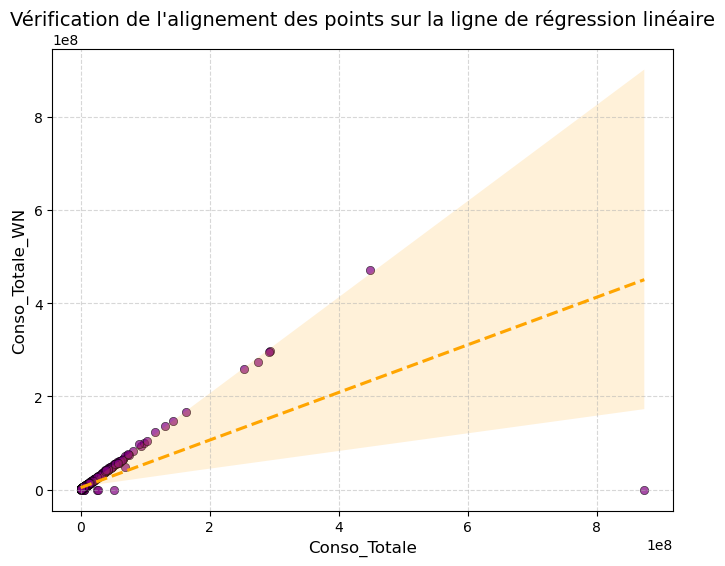

In [19]:
# Créer le graphique
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Conso_Totale", y="Conso_Totale_WN", data=df, alpha=0.7, color='purple', edgecolor='k')  # Couleur des points avec bordure noire

# Ajouter une ligne de régression linéaire avec un style personnalisé
sns.regplot(x="Conso_Totale", y="Conso_Totale_WN", data=df, scatter=False, line_kws={"color": "orange", "linestyle": "--"})  

# Nom des axes et titre avec une police plus grande
plt.xlabel("Conso_Totale", fontsize=12)
plt.ylabel("Conso_Totale_WN", fontsize=12)
plt.title("Vérification de l'alignement des points sur la ligne de régression linéaire", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.5)

# Afficher le graphique
plt.show()


In [20]:
# Retirer les valeurs nulles ou égales à 0 de la colonne 'Conso_Totale_WN'
df_without_null = df[(df['Conso_Totale_WN'] != 0) & df['Conso_Totale_WN'].notnull()]

# Calcul du rapport entre les deux colonnes
Sum_Conso_Totale = df_without_null['Conso_Totale'].sum()
Sum_Conso_Totale_WN = df_without_null['Conso_Totale_WN'].sum()

# Calcul du taux appliqué pour indexer les valeurs aux données météorologiques
rapportWN = Sum_Conso_Totale_WN / Sum_Conso_Totale
print('Résultat du coefficient lié aux données météorologiques entre les deux colonnes:', rapportWN)

Résultat du coefficient lié aux données météorologiques entre les deux colonnes: 1.0268953265459388


In [21]:
# Remplacer les valeurs manquantes dans 'Conso_Totale_WN' par le produit de 'Conso_Totale' et 'rapport'
df['Conso_Totale_WN'] = df.apply(lambda row: row['Conso_Totale'] * rapportWN if pd.isnull(row['Conso_Totale_WN']) or row['Conso_Totale_WN'] == 0 else row['Conso_Totale_WN'], axis=1)

# Calcul du nouveau coefficient de corrélation entre les deux colonnes après l'imputation
New_corr_consototale = df['Conso_Totale'].corr(df['Conso_Totale_WN']).round(6)

print('Nouveau coefficient de corrélation entre les deux colonnes après l\'imputation:', New_corr_consototale)

Nouveau coefficient de corrélation entre les deux colonnes après l'imputation: 0.999711


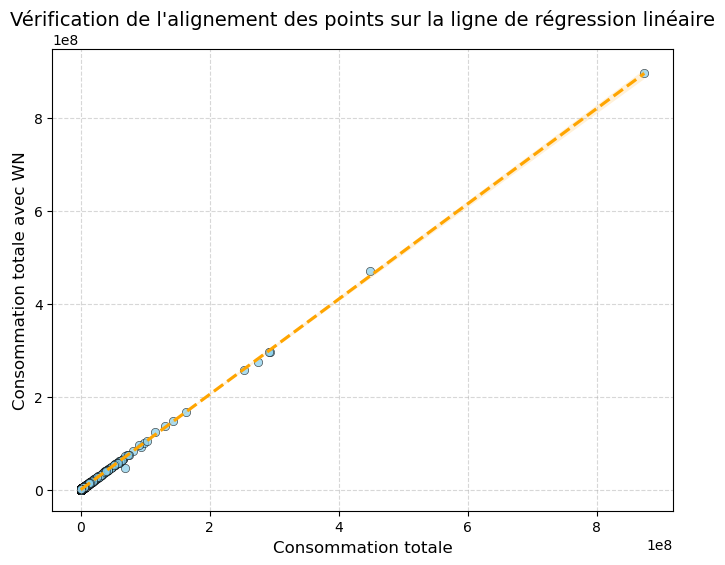

In [22]:
# Créer le graphique
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Conso_Totale", y="Conso_Totale_WN", data=df, alpha=0.7, color='skyblue', edgecolor='black')  # Couleur des points avec bordure noire

# Ajouter une ligne de régression linéaire avec un style personnalisé
sns.regplot(x="Conso_Totale", y="Conso_Totale_WN", data=df, scatter=False, line_kws={"color": "orange", "linestyle": "--"})  

# Nom des axes et titre avec une police plus grande
plt.xlabel("Consommation totale", fontsize=12)
plt.ylabel("Consommation totale avec WN", fontsize=12)
plt.title("Vérification de l'alignement des points sur la ligne de régression linéaire", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.5)

# Afficher le graphique
plt.show()


Réindexer les variables concernant le consommation en électricité, en charbon & en gaz naturel avec le coefficient calculé

In [23]:
# Application du coefficent calculé pour réindexer les variables electricité, gaz et charbon
df['Conso_GazNat_kBtu_WN'] = df['Conso_GazNat_kBtu'] * rapportWN
df['Conso_Vapeur_kBtu_WN'] = df['Conso_Vapeur_kBtu'] * rapportWN
df['Conso_Elec_kBtu_WN'] = df['Conso_Elec_kBtu'] * rapportWN

# Supprimer les colonnes non-indexées
df = df.drop('Conso_GazNat_kBtu', axis=1)
df = df.drop('Conso_Vapeur_kBtu', axis=1)
df = df.drop('Conso_Elec_kBtu', axis =1)

## 3. Imputation pour les données manquantes

Pour la getion des Nan, nous sommes face à plusieurs situations différentes.
Pour 'l'intensité_WN', nous pouvons utiliser le coefficient calculé prédémment pour réindexer la valeur de la colonne 'Intensite' et ainsi combler la valeur manquante.

Ensuite, en ce qui concerne les 2 & 3ième usage ainsi leur surface associée, nous pouvons en déduire tout simplement il n'y a pas de second et troisième usage au sein de ses bâtiments. Nous pouvons donc remplir par 0, pour les surfaces et 'Pas d'usage' pour les types d'usageb.

Enfin, concernant les deux dernières variables sur l'EnergystarScore.
Celui-ci est un indicateur avec ses propres méthodes de calcul, donc nous ne pouvons le reproduire sans le protocole associé, donc remplissage par 0. 
Pour le 'YearsENERGYSTARCertified', cette colonne ne nous servira pas par la suite dans le cadre de cette étude car ce sont les années où le contrôle à eu lieu.

<Axes: >

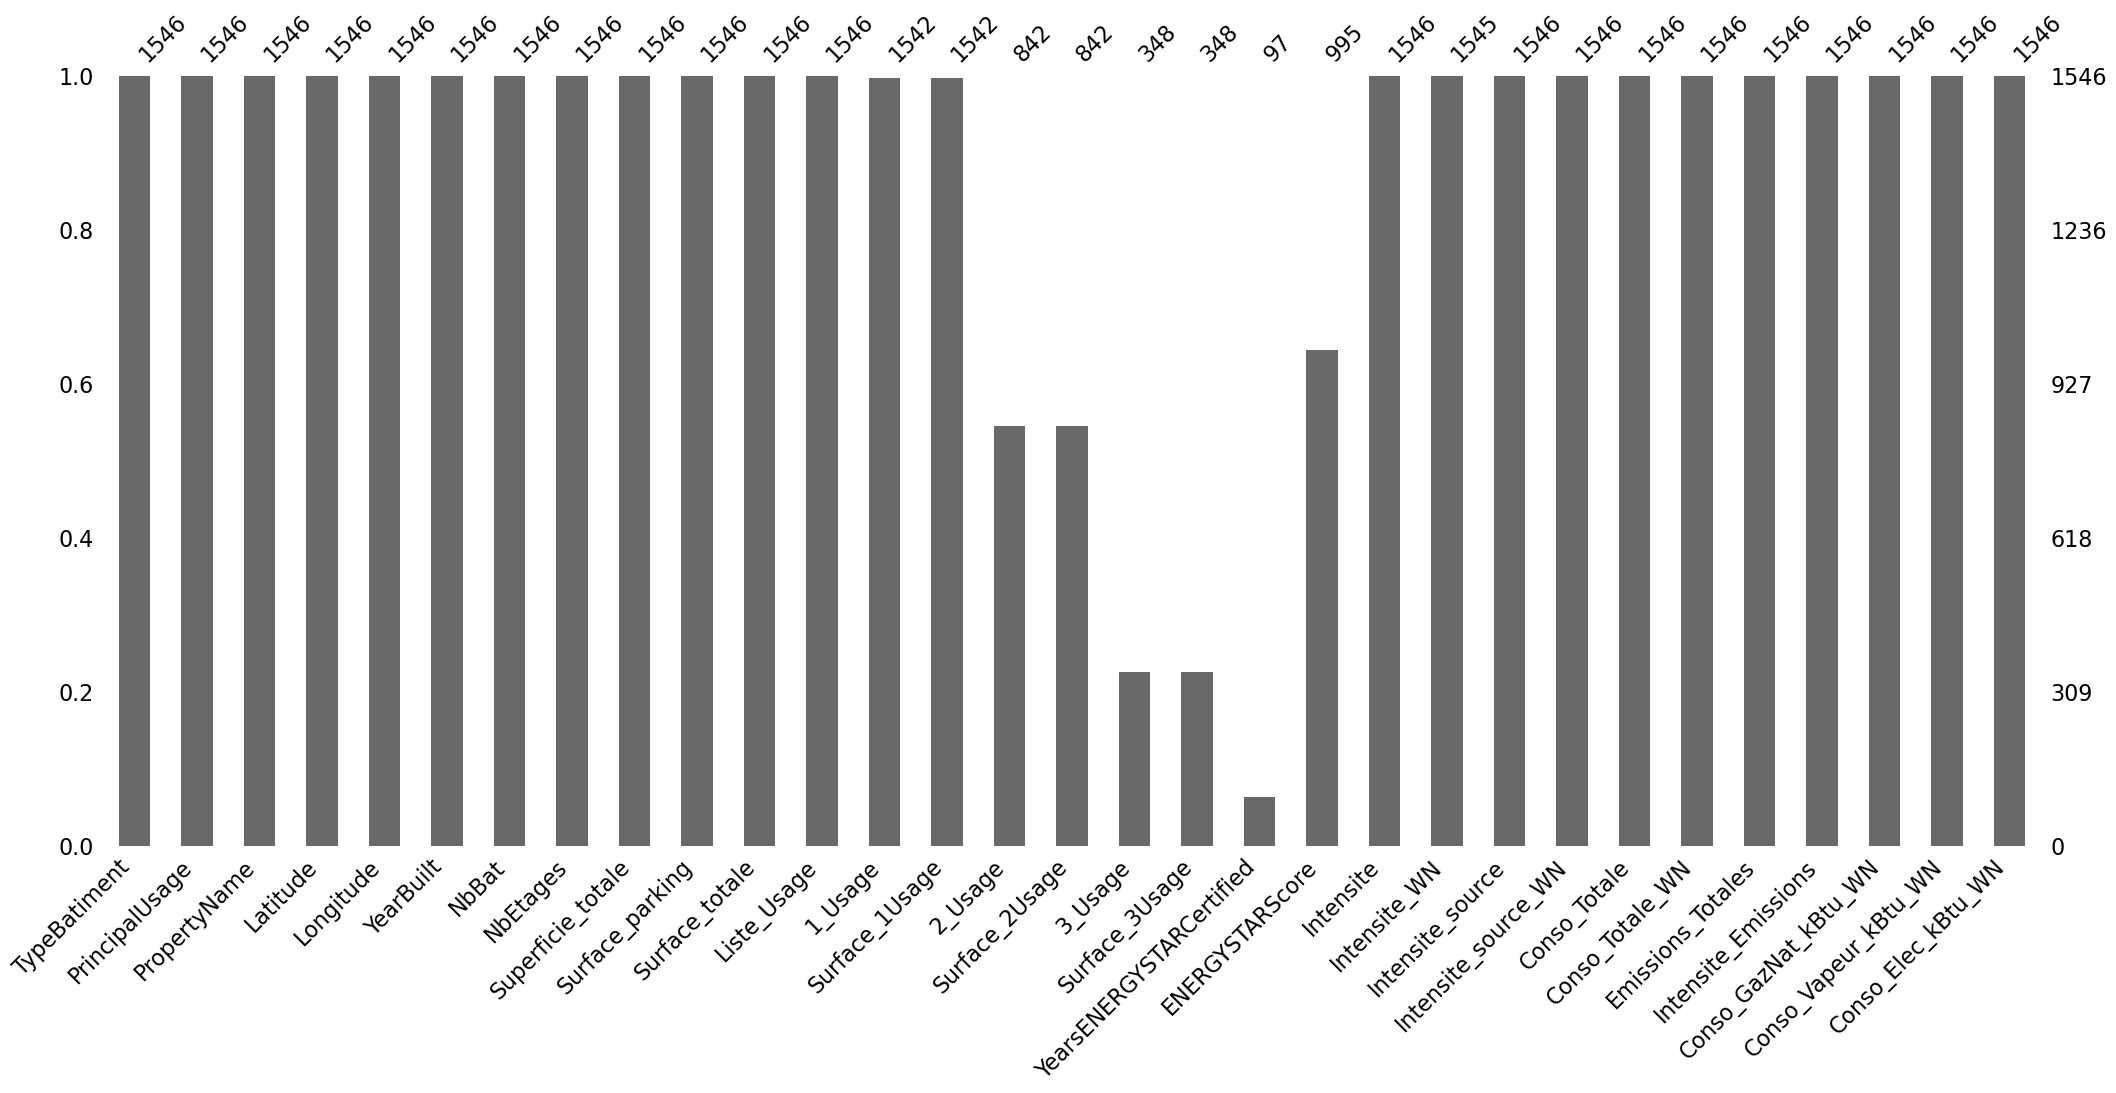

In [24]:
msno.bar(df)

In [25]:
# Remplacer la valeur manquante pour la variable 'Intensite_WN' par le produit de la variable 'Intensite' par le coefficent d'indexation des données météorologiques
df['Intensite_WN'] = df.apply(lambda row: row['Intensite'] * rapportWN if pd.isnull(row['Intensite_WN']) else row['Intensite_WN'], axis=1)

# Faire une imputation par 0 pour les superficie de l'usage 2 et 3 et par 'Pas d'usage' pour les variables qualitatives
df['Surface_2Usage'].fillna(0, inplace=True)
df['Surface_3Usage'].fillna(0, inplace=True)
df['2_Usage'].fillna("Pas d'usage", inplace=True)
df['3_Usage'].fillna("Pas d'usage", inplace=True)
df['YearsENERGYSTARCertified'].fillna(0, inplace=True)
df['ENERGYSTARScore'].fillna(0, inplace=True)

## 4. Détection & gestion des incohérences dans nos variables quantitatives

Nous allons dans cette partie vérifier la cohérence des interrelations entre les différentes variables. Nous nous pencherons sur 3 interrelations que nous mesurerons à l'aide d'un ratio entre la colonne calculée & la colonne déjà présente dans le dataframe.

A. Calcul de 3 ratio pour mesurer les écarts entre les différentes groupes de variables

In [26]:
# Faire une copie du dataframe de base pour effectuer les analyses de cohérences entre les variables
df_interRel = df.copy()

df_interRel['ratio_energy'] = (df_interRel['Conso_GazNat_kBtu_WN'] + df_interRel['Conso_Elec_kBtu_WN'] + df_interRel['Conso_Vapeur_kBtu_WN']) / df_interRel['Conso_Totale_WN']
df_interRel['ratio_GFA'] = (df_interRel['Surface_1Usage'] + df_interRel['Surface_2Usage'] + df_interRel['Surface_3Usage'] + df_interRel['Surface_3Usage']) / df_interRel['Superficie_totale']
df_interRel['ratio_intensite'] = (df_interRel['Conso_Totale'] / df_interRel['Superficie_totale']) / df_interRel['Intensite']

df_interRel['Score'] = df_interRel['ratio_energy'] + df_interRel['ratio_GFA'] + df_interRel['ratio_intensite']

B. Calcul de la moyenne et de l'écart-type du score obtenu

In [27]:
# Calcul moyenne et écart-type pour le score
mean_score = df_interRel['Score'].mean().round(4)
std_score = df_interRel['Score'].std()

print(mean_score)
print(std_score)

2.9723
0.5660373512222521


C. Afficher la distribution du 'Score'

<Figure size 1000x600 with 0 Axes>

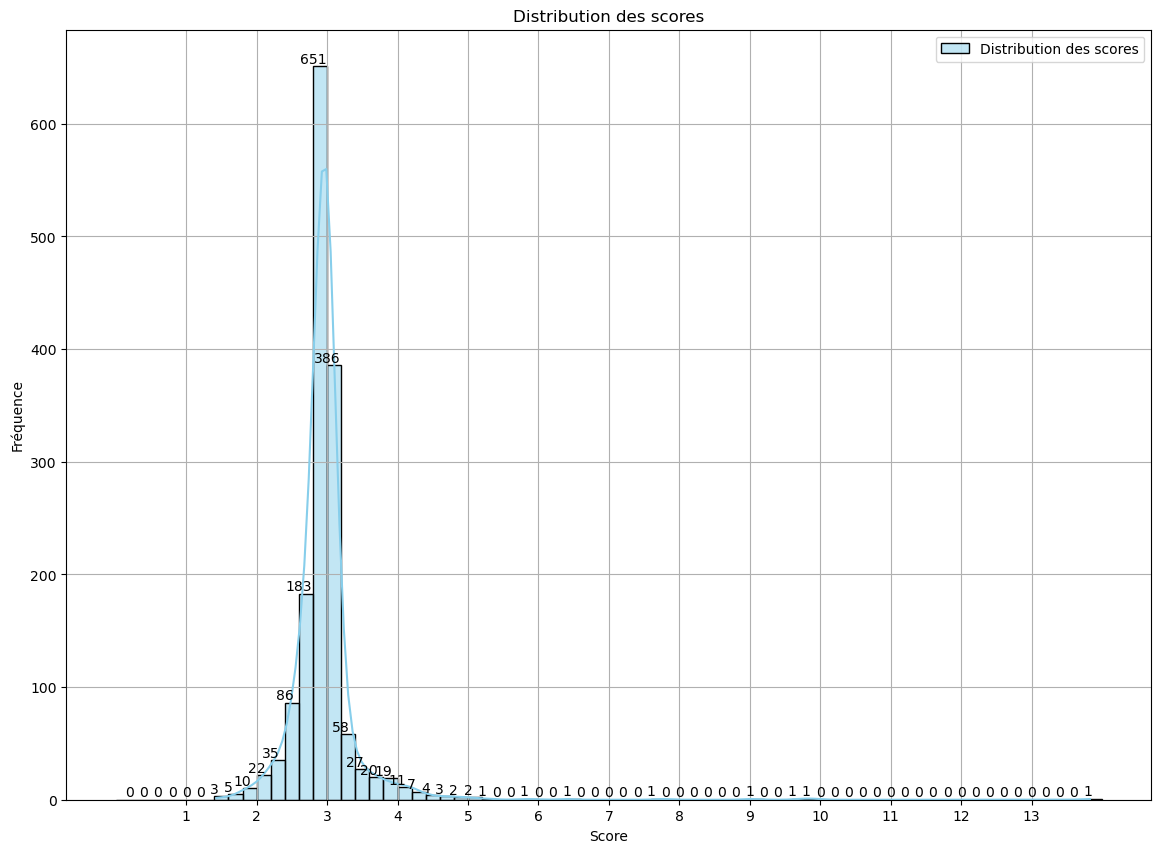

In [28]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Création d'une figure et d'un axe
fig, ax = plt.subplots(figsize=(14, 10))

# Définir les bins pour l'histogramme
bin_width = 0.2
bins = np.arange(0, df_interRel['Score'].max() + bin_width, bin_width)

# Filtrer les données pour exclure les valeurs de zéro
df_filtered = df_interRel[df_interRel['Score'] != 0]

# Tracer l'histogramme des valeurs de 'Score'
sns.histplot(data=df_filtered, x='Score', bins=bins, ax=ax, kde=True, color='skyblue', label='Distribution des scores')

# Ajouter des étiquettes de données (ou valeurs y)
counts, _ = np.histogram(df_filtered['Score'], bins=bins)
for i, count in enumerate(counts):
    if bins[i] != 0:
        plt.text(bins[i], count, str(count), ha='center', va='bottom')

# Spécifier la gradation de l'axe des abscisses avec un pas de 1
plt.xticks(range(int(min(df_filtered['Score'])), int(max(df_filtered['Score'])) + 1, 1))

# Ajouter un titre et des étiquettes d'axe
plt.title('Distribution des scores')
plt.xlabel('Score')
plt.ylabel('Fréquence')

# Ajouter une grille
plt.grid(True)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


In [29]:
nblines_before = df_interRel.shape
print('Nombre de lignes avant l\'application du paramètre \'Alpha\'', nblines_before)

Nombre de lignes avant l'application du paramètre 'Alpha' (1546, 35)


In [30]:
# Création d'un 'paramètre' alpha qui sera notre coefficient devant notre valeur écart-type
alpha = 1

# Calculer les bornes de l'intervalle
lower_bound = df_interRel['Score'].mean() - (std_score * alpha)
upper_bound = df_interRel['Score'].mean() + (std_score * alpha)

# Filtrer les lignes en fonction de la condition sur la colonne 'Score'
df_interRel = df_interRel.loc[(df_interRel['Score'] >= lower_bound) & (df_interRel['Score'] <= upper_bound)]

In [31]:
nblines_after = df_interRel.shape
print('Nombre de lignes avant l\'application du paramètre \'Alpha\'', nblines_after)

Nombre de lignes avant l'application du paramètre 'Alpha' (1382, 35)


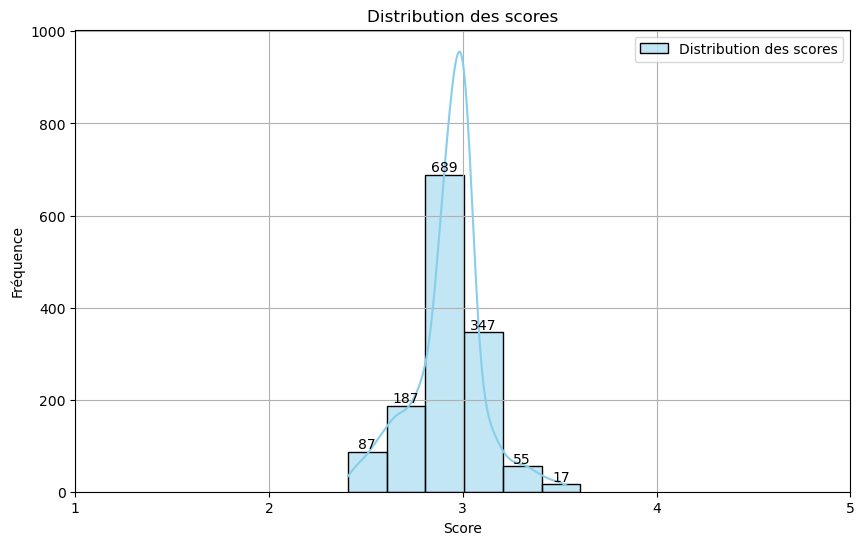

In [32]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Définir les bins pour l'histogramme, en excluant explicitement la valeur 0
bin_width = 0.2
max_score = df_interRel['Score'].max()
min_score = df_interRel['Score'].min()
bins = np.arange(min_score, max_score + bin_width, bin_width)

# Filtrer les données pour exclure les valeurs de zéro
df_filtered = df_interRel[df_interRel['Score'] != 0]

# Tracer l'histogramme des valeurs de 'Score'
sns.histplot(data=df_filtered, x='Score', bins=bins, kde=True, color='skyblue', label='Distribution des scores')

# Ajouter des étiquettes de données (ou valeurs y) pour les données filtrées
counts, _ = np.histogram(df_filtered['Score'], bins=bins)
for i, count in enumerate(counts):
    plt.text(bins[i] + bin_width / 2, count, str(count), ha='center', va='bottom')

# Définir les limites de l'axe des abscisses pour centrer autour de 2 et 4
plt.xlim(2, 4)

# Spécifier la gradation de l'axe des abscisses avec un pas de 1
plt.xticks(range(1, 6, 1))

# Ajouter un titre et des étiquettes d'axe
plt.title('Distribution des scores')
plt.xlabel('Score')
plt.ylabel('Fréquence')

# Ajouter une grille
plt.grid(True)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


Après, avoir corriger ou limiter l'impact les incohérences existantes dans le dataframe, nous pouvons donc consolider nos colonnes 'Surface_Totale' qui sera l'addition des 3 usages, et la consommation totales qui sera également la sommes des trois sources d'énergie.



In [33]:
# Utilisation de la méthode describe pour obtenir les statistiques descriptives
description_avant = df_interRel[['Surface_totale', 'Conso_Totale_WN']].describe()

description_avant.head()

Surface_totale  Conso_Totale_WN
count     1382.000000     1.382000e+03
mean    106713.850941     8.465601e+06
std     304191.569306     2.993884e+07
min       3636.000000     5.811420e+04
25%      27914.250000     1.311296e+06

In [34]:
# Création d'une fonction pour calculer la somme des colonnes spécifiées
def calculer_surface_totale(row):
    return row['Surface_1Usage'] + row['Surface_2Usage'] + row['Surface_3Usage']

# Remplacement des valeurs dans la colonne 'Surface_totale' en utilisant apply
df_interRel['Surface_totale'] = df_interRel.apply(calculer_surface_totale, axis=1)

# Création d'une fonction pour calculer la somme des colonnes spécifiées
def calculer_conso_totale(row):
    return row['Conso_GazNat_kBtu_WN'] + row['Conso_Vapeur_kBtu_WN'] + row['Conso_Elec_kBtu_WN']

# Remplacement des valeurs dans la colonne 'Conso_totale_WN' en utilisant apply
df_interRel['Conso_Totale_WN'] = df_interRel.apply(calculer_conso_totale, axis=1)

# Utilisation de la méthode describe pour obtenir les statistiques descriptives
description_après = df_interRel[['Surface_totale', 'Conso_Totale_WN']].describe()

description_après.head().round()

Surface_totale  Conso_Totale_WN
count          1382.0           1382.0
mean         118304.0        8317098.0
std          318970.0       27209020.0
min           11285.0          58670.0
25%           28312.0        1251293.0

## 5. Constitution du dataframe final, nettoyé avec les colonnes utiles à notre étude

Après ces premières étapes de cleaning  et d'exploration primaire, nous pouvons avoir une première idée des colonnes qui vont nous être utiles par la suite dans notre étude.
Notre propos ici est de faire des prédictions sur les émissions de CO² et de la consommation des bâtiments en énergie.
Nos deux variables prédictrices (y) seront par conséquent : 
- Conso_Totale_WN
- Emissions_Totales

Pour faire des prédictions, il faut également des variables en X, qui seront nos variables explicatrices, nos features.
Le contexte est que la ville de Seattle veut arrêter le relevé des consommations des bâtiments qui est trop coûteux. Notre rôle sera alors de prédire la consommation de nouveaux bâtiments en ayant à disposition les données structurelles des bâtimennts, propre à leur architecture et leur type d'utilisation.

A ce stade, nous avons dataframe nettoyé où nous avons traité les incohérences entre les variables, détecté ou vérifié certaines valeurs aberrantes ou non, ainsi que fait les imputations nécessaires et approprié pour avoir un taux de remplissage de 100%.
La structure de notre dataframe est de 1382 lignes donc bâtiments avec 19 variables / colonnes.


In [35]:
df_clean = df_interRel[['PropertyName',
                        'PrincipalUsage',
                        'Liste_Usage',
                        'YearBuilt',
                        'Surface_totale',
                        'Surface_parking',
                        'NbBat',
                        'NbEtages',
                        '1_Usage',
                        'Surface_1Usage',
                        '2_Usage',
                        'Surface_2Usage',
                        '3_Usage',
                        'Surface_3Usage',
                        'Intensite_WN',
                        'Intensite_source_WN',
                        'Conso_Totale_WN',
                        'Conso_GazNat_kBtu_WN',
                        'Conso_Vapeur_kBtu_WN',
                        'Conso_Elec_kBtu_WN',
                        'Emissions_Totales',
                        'Intensite_Emissions',
                        'ENERGYSTARScore'
                       ]]

# Pour créer un fichier CSV à partir de clear_dataset
df_clean.to_csv('df_clean.csv', index=False)

In [36]:
# Afficher le dataframe après les premières étapes de cleaning
df_clean.head()

PropertyName PrincipalUsage                    Liste_Usage  \
0         Mayflower park hotel          Hotel                          Hotel   
1              Paramount Hotel          Hotel     Hotel, Parking, Restaurant   
2      5673-The Westin Seattle          Hotel                          Hotel   
3                    HOTEL MAX          Hotel                          Hotel   
4  WARWICK SEATTLE HOTEL (ID8)          Hotel  Hotel, Parking, Swimming Pool   

   YearBuilt  Surface_totale  Surface_parking  NbBat  NbEtages 1_Usage  \
0       1927         88434.0                0    1.0        12   Hotel   
1       1996        103566.0            15064    1.0        11   Hotel   
2       1969        756493.0           196718    1.0        41   Hotel   
3       1926         61320.0                0    1.0        10   Hotel   
4       1980        191454.0            62000    1.0        18   Hotel   

   Surface_1Usage      2_Usage  Surface_2Usage        3_Usage  Surface_3Usage  \
0         88434.0  Pas d'usage             0.0    Pas d'usage             0.0   
1         83880.0      Parking         15064.0     Restaurant          4622.0   
2        756493.0  Pas d'usage             0.0    Pas d'usage             0.0   
3         61320.0  Pas d'usage             0.0    Pas d'usage             0.0   
4        123445.0      Parking         68009.0  Swimming Pool             0.0   

   Intensite_WN  Intensite_source_WN  Conso_Totale_WN  Conso_GazNat_kBtu_WN  \
0     84.300003           189.000000     7.420717e+06          1.310784e+06   
1     97.900002           179.399994     8.613529e+06          5.283461e+06   
2     97.699997           244.100006     7.453927e+07          1.533976e+06   
3    113.300003           224.000000     6.977326e+06          1.859926e+06   
4    118.699997           215.600006     1.455378e+07          9.040784e+06   

   Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  Emissions_Totales  \
0          2.057777e+06        4.052157e+06             249.98   
1          0.000000e+00        3.330069e+06             295.86   
2          2.214659e+07        5.085870e+07            2089.28   
3          2.274005e+06        2.843395e+06             286.43   
4          0.000000e+00        5.512997e+06             505.01   

   Intensite_Emissions  ENERGYSTARScore  
0                 2.83             60.0  
1                 2.86             61.0  
2                 2.19             43.0  
3                 4.67             56.0  
4                 2.88             75.0

# III. Analyse statistique univariée & bivariée

## 1. Description généraliste des données avec la fonction '.describe'

A. Utilisation de la fonction 'describe' sur les variables quantitatives

In [37]:
df_clean.describe().round()

YearBuilt  Surface_totale  Surface_parking   NbBat  NbEtages  \
count     1382.0          1382.0           1382.0  1382.0    1382.0   
mean      1961.0        118304.0          12062.0     1.0       4.0   
std         33.0        318970.0          40129.0     3.0       7.0   
min       1900.0         11285.0              0.0     1.0       0.0   
25%       1929.0         28312.0              0.0     1.0       1.0   
50%       1965.0         47006.0              0.0     1.0       2.0   
75%       1988.0        100231.0              0.0     1.0       4.0   
max       2015.0       9320156.0         512608.0   111.0      76.0   

       Surface_1Usage  Surface_2Usage  Surface_3Usage  Intensite_WN  \
count          1382.0          1382.0          1382.0        1382.0   
mean          97902.0         17605.0          2797.0          76.0   
std          295838.0         45792.0         13847.0          76.0   
min            5656.0             0.0             0.0           0.0   
25%           24963.0             0.0             0.0          37.0   
50%           41266.0             0.0             0.0          56.0   
75%           88476.0         12982.0             0.0          86.0   
max         9320156.0        441551.0        303910.0         834.0   

       Intensite_source_WN  Conso_Totale_WN  Conso_GazNat_kBtu_WN  \
count               1382.0           1382.0                1382.0   
mean                 182.0        8317098.0             1818477.0   
std                  190.0       27209020.0             6157848.0   
min                    0.0          58670.0                   0.0   
25%                   82.0        1251293.0                   0.0   
50%                  139.0        2687930.0              504306.0   
75%                  208.0        7043507.0             1550664.0   
max                 2620.0      762017565.0           141907936.0   

       Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  Emissions_Totales  \
count                1382.0              1382.0             1382.0   
mean               441703.0           6056917.0              168.0   
std               4761234.0          22269123.0              589.0   
min                     0.0                 0.0                0.0   
25%                     0.0            735859.0               20.0   
50%                     0.0           1681725.0               49.0   
75%                     0.0           5082995.0              142.0   
max             138572804.0         674746619.0            12307.0   

       Intensite_Emissions  ENERGYSTARScore  
count               1382.0           1382.0  
mean                   2.0             41.0  
std                    2.0             38.0  
min                    0.0              0.0  
25%                    0.0              0.0  
50%                    1.0             40.0  
75%                    2.0             79.0  
max                   26.0            100.0

B. Utilisation de la fonction 'describe' sur les variables qualitatives

In [38]:
# Utilisation de la foncion describe pour les généralités statistiques pour les variables qualitatives
df_clean.describe(include="object").transpose()

count unique                          top  freq
PropertyName    1382   1379             Bayview Building     2
PrincipalUsage  1382     21  Small- and Mid-Sized Office   265
Liste_Usage     1382    334                       Office   122
1_Usage         1382     55                       Office   442
2_Usage         1382     46                  Pas d'usage   641
3_Usage         1382     34                  Pas d'usage  1080

## 2. Analyse univariée

### A. Variable qualitative concernant la principale utilisation des bâtiments

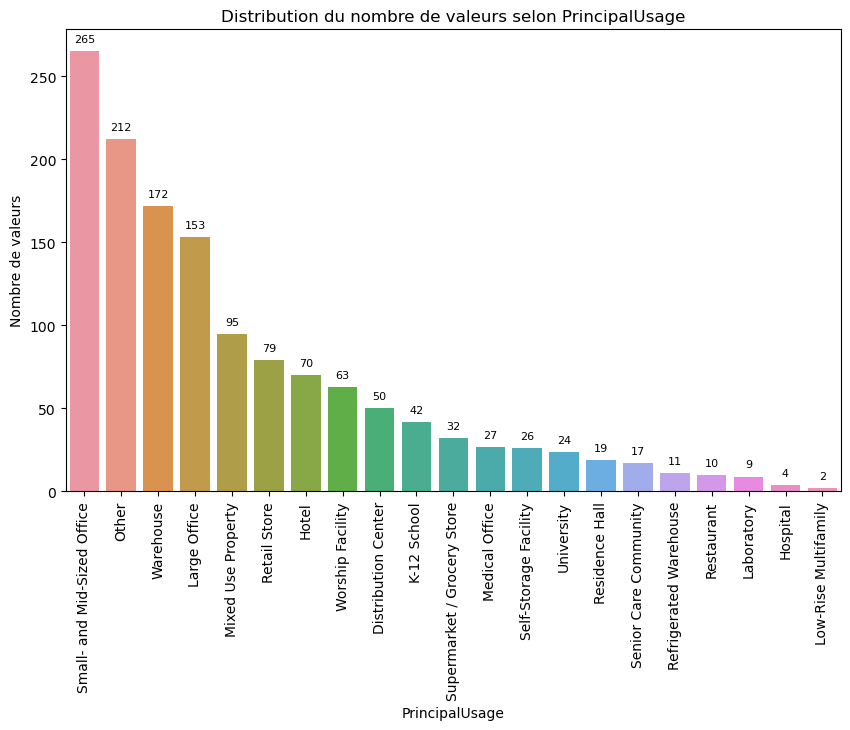

In [34]:
# Créer l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='PrincipalUsage', order=df_clean['PrincipalUsage'].value_counts().index)
plt.title('Distribution du nombre de valeurs selon PrincipalUsage')
plt.xlabel('PrincipalUsage')
plt.ylabel('Nombre de valeurs')
plt.xticks(rotation=90)

# Ajouter les étiquettes des données sur chaque barre
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.show()

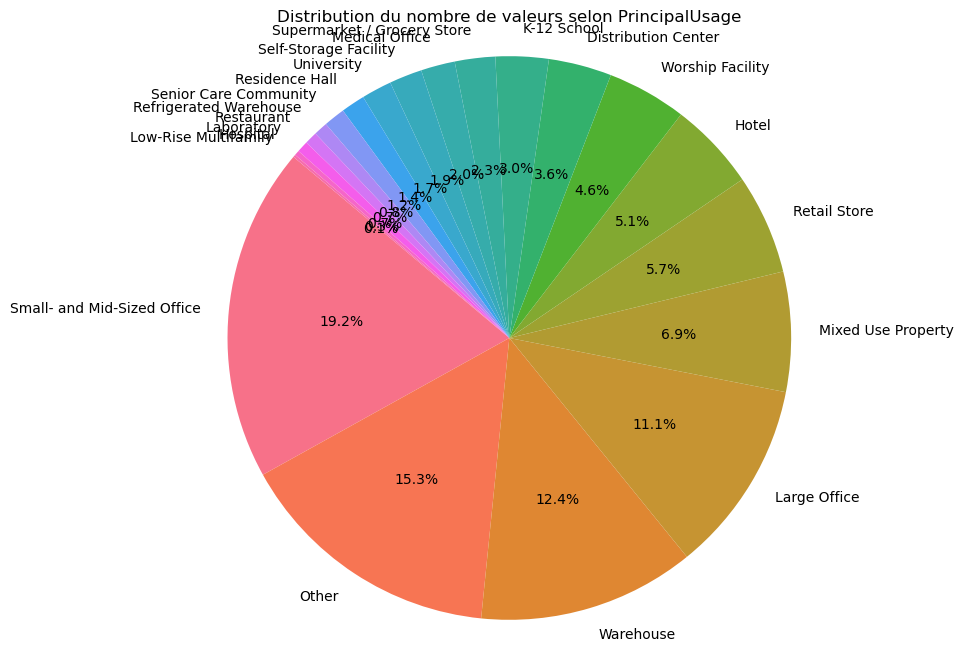

In [35]:
# Définir la palette de couleurs à utiliser
palette = sns.color_palette("husl", len(df_clean['PrincipalUsage'].unique()))

# Compter les occurrences de chaque catégorie
usage_counts = df_clean['PrincipalUsage'].value_counts()

# Créer un diagramme circulaire avec la même palette de couleurs
plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribution du nombre de valeurs selon PrincipalUsage')
plt.axis('equal')
plt.show()

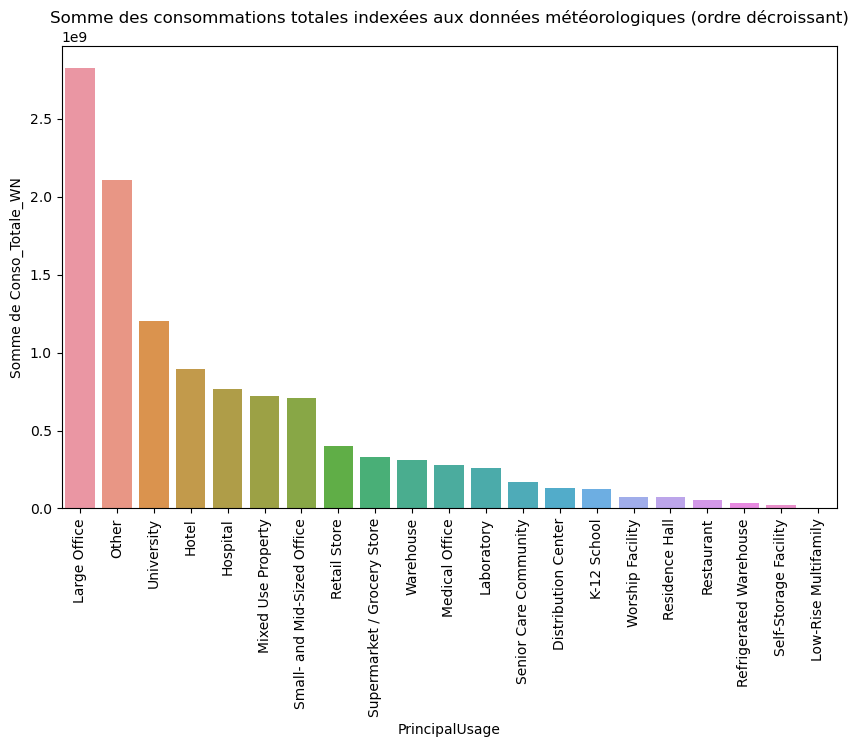

In [36]:
# Calculer la somme de Conso_Totale_WN pour chaque catégorie de PrincipalUsage
sum_by_usage = df_clean.groupby('PrincipalUsage')['Conso_Totale_WN'].sum()

# Trier les catégories par la somme de Conso_Totale_WN dans l'ordre décroissant
order = sum_by_usage.sort_values(ascending=False).index

# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='PrincipalUsage', y='Conso_Totale_WN', estimator=sum, errorbar=None, order=order)
plt.title('Somme des consommations totales indexées aux données météorologiques (ordre décroissant)')
plt.xlabel('PrincipalUsage')
plt.ylabel('Somme de Conso_Totale_WN')
plt.xticks(rotation=90)

# Ajouter les étiquettes des données sur chaque barre
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


### B. Distribution de nos variables quantitatives

Variables concernant les surfaces

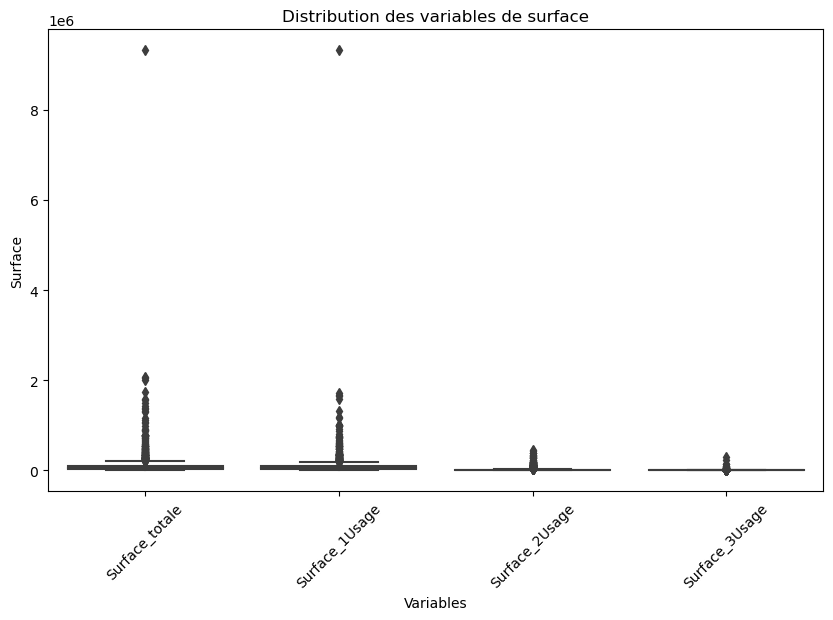

In [37]:
# Sélection des variables d'intérêt
variables = ['Surface_totale', 'Surface_1Usage', 'Surface_2Usage', 'Surface_3Usage']

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[variables])
plt.title('Distribution des variables de surface')
plt.xlabel('Variables')
plt.ylabel('Surface')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Trouver l'indice de la ligne où 'Surface_Totale' est maximale
indice_max_surface = df_clean['Surface_totale'].idxmax()

# Obtenir la ligne correspondante
ligne_max_surface = df_clean.loc[indice_max_surface]

# Afficher la ligne
print("Ligne avec la plus grande valeur de Surface_Totale :\n", ligne_max_surface)

Ligne avec la plus grande valeur de Surface_Totale :
 PropertyName            University of Washington - Seattle Campus
PrincipalUsage                                         University
Liste_Usage                                    College/University
YearBuilt                                                    1900
Surface_totale                                          9320156.0
Surface_parking                                                 0
NbBat                                                       111.0
NbEtages                                                        0
1_Usage                                        College/University
Surface_1Usage                                          9320156.0
2_Usage                                               Pas d'usage
Surface_2Usage                                                0.0
3_Usage                                               Pas d'usage
Surface_3Usage                                                0.0
Intensite_WN          

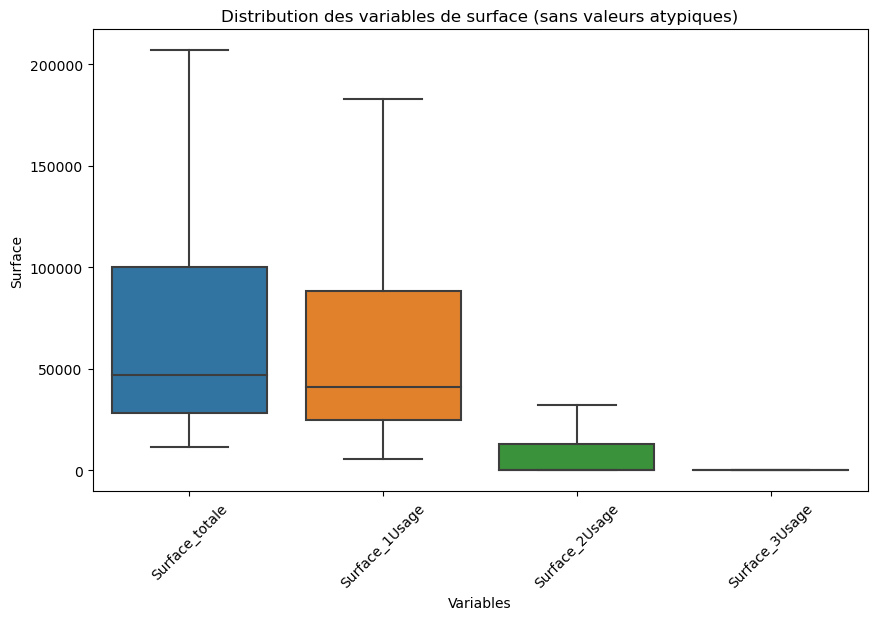

In [39]:
# Sélection des variables d'intérêt
variables = ['Surface_totale', 'Surface_1Usage', 'Surface_2Usage', 'Surface_3Usage']

# Création du boxplot sans les valeurs atypiques
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[variables], showfliers=False)
plt.title('Distribution des variables de surface (sans valeurs atypiques)')
plt.xlabel('Variables')
plt.ylabel('Surface')
plt.xticks(rotation=45)
plt.show()

Les variables concernant les énergies

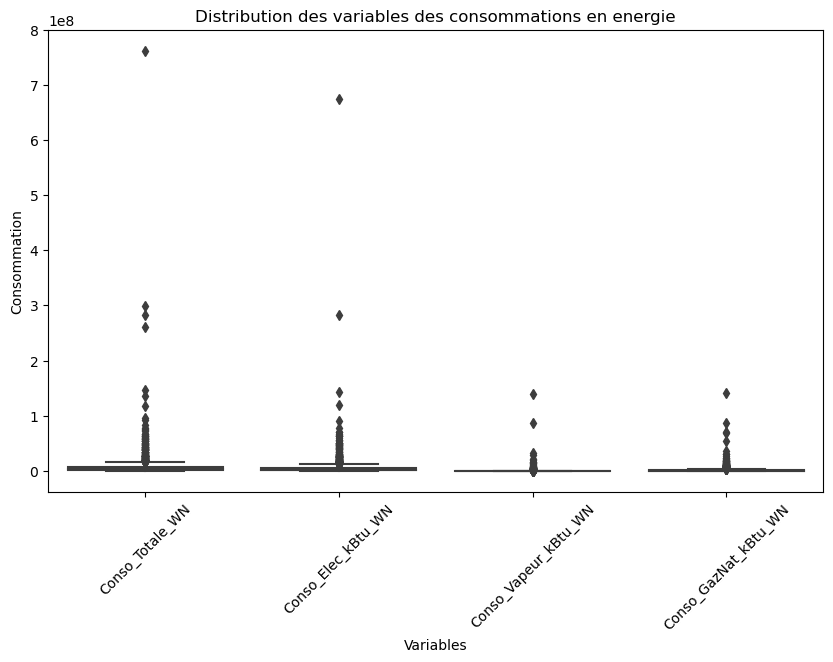

In [40]:
# Sélection des variables d'intérêt
variables = ['Conso_Totale_WN', 'Conso_Elec_kBtu_WN', 'Conso_Vapeur_kBtu_WN', 'Conso_GazNat_kBtu_WN']

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[variables])
plt.title('Distribution des variables des consommations en energie')
plt.xlabel('Variables')
plt.ylabel('Consommation')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Trouver l'indice de la ligne où 'Surface_Totale' est maximale
indice_max_conso = df_clean['Conso_Totale_WN'].idxmax()

# Obtenir la ligne correspondante
ligne_max_conso = df_clean.loc[indice_max_conso]

# Afficher la ligne
print("Ligne avec la plus grande valeur de Conso_Totale :\n", ligne_max_conso)

Ligne avec la plus grande valeur de Conso_Totale :
 PropertyName            University of Washington - Seattle Campus
PrincipalUsage                                         University
Liste_Usage                                    College/University
YearBuilt                                                    1900
Surface_totale                                          9320156.0
Surface_parking                                                 0
NbBat                                                       111.0
NbEtages                                                        0
1_Usage                                        College/University
Surface_1Usage                                          9320156.0
2_Usage                                               Pas d'usage
Surface_2Usage                                                0.0
3_Usage                                               Pas d'usage
Surface_3Usage                                                0.0
Intensite_WN            

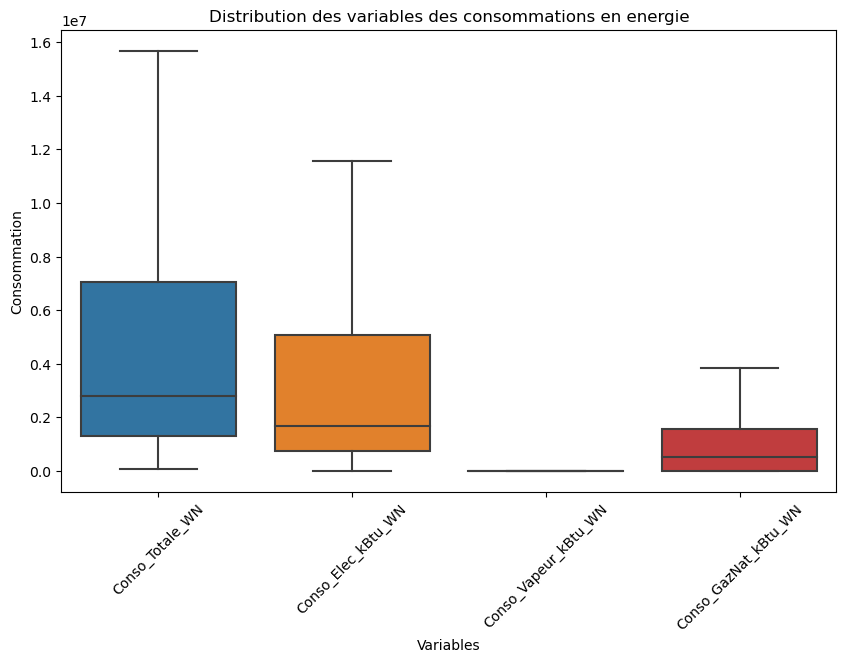

In [39]:
# Sélection des variables d'intérêt
variables = ['Conso_Totale_WN', 'Conso_Elec_kBtu_WN', 'Conso_Vapeur_kBtu_WN', 'Conso_GazNat_kBtu_WN']

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[variables], showfliers=False)
plt.title('Distribution des variables des consommations en energie')
plt.xlabel('Variables')
plt.ylabel('Consommation')
plt.xticks(rotation=45)
plt.show()

### C. Analyse de nos variables clés de l'étude

Nous allons nous intéresser à 4 variables clés de l'étude qui sont : 
- La surface totale
- La consommation totale indexée aux données météorologiques
- Les émmissions de CO²
- le KPI de l'ENERGYScore

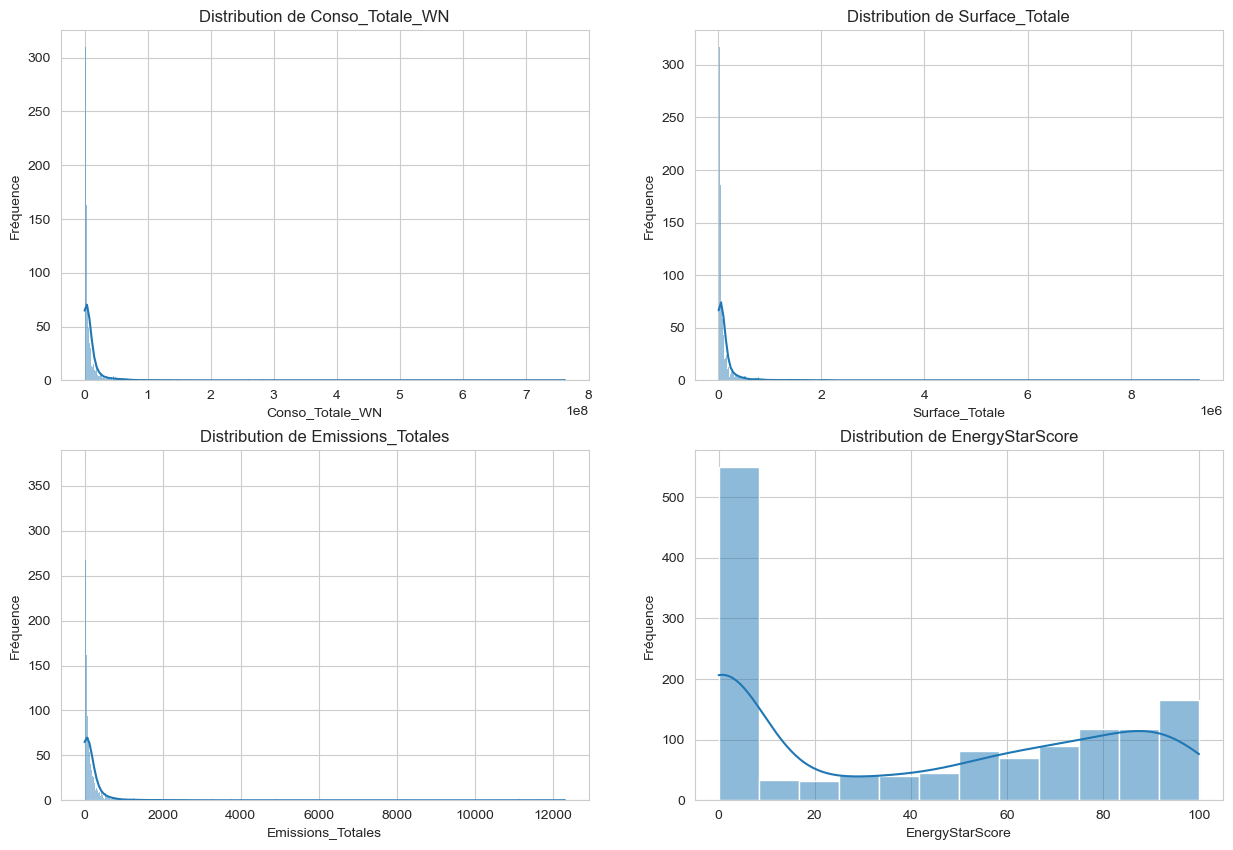

In [269]:
# Créer une figure pour les graphiques avec une taille personnalisée
plt.figure(figsize=(15, 10))

# Tracer la distribution de la variable Conso_Totale_WN
plt.subplot(2, 2, 1)  # 2 lignes, 2 colonnes, premier graphique
sns.histplot(data=df_clean, x='Conso_Totale_WN', kde=True)
plt.title('Distribution de Conso_Totale_WN')
plt.xlabel('Conso_Totale_WN')
plt.ylabel('Fréquence')

# Tracer la distribution de la variable Surface_Totale
plt.subplot(2, 2, 2)  # 2 lignes, 2 colonnes, deuxième graphique
sns.histplot(data=df_clean, x='Surface_totale', kde=True)
plt.title('Distribution de Surface_Totale')
plt.xlabel('Surface_Totale')
plt.ylabel('Fréquence')

# Tracer la distribution de la variable Emissions_Totales
plt.subplot(2, 2, 3)  # 2 lignes, 2 colonnes, troisième graphique
sns.histplot(data=df_clean, x='Emissions_Totales', kde=True)
plt.title('Distribution de Emissions_Totales')
plt.xlabel('Emissions_Totales')
plt.ylabel('Fréquence')

# Tracer la distribution de la variable EnergyStarScore
plt.subplot(2, 2, 4)  # 2 lignes, 2 colonnes, quatrième graphique
sns.histplot(data=df_clean, x='ENERGYSTARScore', kde=True)
plt.title('Distribution de EnergyStarScore')
plt.xlabel('EnergyStarScore')
plt.ylabel('Fréquence')

# Ajuster automatiquement le placement des sous-graphiques
#plt.tight_layout()

# Afficher les graphiques
plt.show()


L'écrasement de nos données est lié a des valeurs qui sont soient hors-normes ou aberrantes. Nous allons donc regarder plus attentivement les bâtiments correspondant à ces valeurs.

In [32]:
# Filtrer les données dans l'ordre décroissant selon Conso_Totale_WN et extraire les 10 premières lignes
df_conso_top10 = df_clean.sort_values(by='Conso_Totale_WN', ascending=False).head(10)

# Filtrer les données dans l'ordre décroissant selon Surface_Totale et extraire les 10 premières lignes
df_surface_top10 = df_clean.sort_values(by='Surface_totale', ascending=False).head(10)

# Filtrer les données dans l'ordre décroissant selon Emissions_Totales et extraire les 10 premières lignes
df_emissions_top10 = df_clean.sort_values(by='Emissions_Totales', ascending=False).head(10)

In [33]:
# Afficher les 10 premières lignes de chaque DataFrame pour vérification
print("Top 10 pour Conso_Totale_WN :")
df_conso_top10

Top 10 pour Conso_Totale_WN :


PropertyName PrincipalUsage  \
3274  University of Washington - Seattle Campus     University   
618                          Swedish First Hill       Hospital   
558                              WestinBuilding          Other   
124     Seattle Children's Hospital Main Campus       Hospital   
167                         Swedish Cherry Hill       Hospital   
340                 Weintraub/Hutchinson/Thomas          Other   
1494                              Entire Campus     University   
559                      Columbia Center - 2015   Large Office   
2325                    5th Avenue Master Meter     University   
49                       Sheraton Seattle Hotel          Hotel   

                                         Liste_Usage  YearBuilt  \
3274                              College/University       1900   
618   Hospital (General Medical & Surgical), Parking       1994   
558                              Data Center, Office       1981   
124            Hospital (General Medical & Surgical)       1953   
167   Hospital (General Medical & Surgical), Parking       1990   
340                                   Other, Parking       1997   
1494                     College/University, Parking       1939   
559                                  Office, Parking       1985   
2325                              College/University       1945   
49                     Hotel, Parking, Swimming Pool       1982   

      Surface_totale  Surface_parking  NbBat  NbEtages  \
3274       9320156.0                0  111.0         0   
618        2080885.0                0    7.0        14   
558         429406.0                0    1.0        33   
124         879000.0                0    6.0        10   
167         650222.0                0    6.0         5   
340         639930.0                0    1.0         5   
1494       2038603.0                0    1.0         2   
559        2000305.0           319400    1.0        76   
2325        533826.0                0   14.0         2   
49         1111880.0           146694    1.0        34   

                                    1_Usage  Surface_1Usage  ...  \
3274                     College/University       9320156.0  ...   
618   Hospital (General Medical & Surgical)       1639334.0  ...   
558                             Data Center        218997.0  ...   
124   Hospital (General Medical & Surgical)        879000.0  ...   
167   Hospital (General Medical & Surgical)        601615.0  ...   
340                                   Other        535947.0  ...   
1494                     College/University       1719643.0  ...   
559                                  Office       1680937.0  ...   
2325                     College/University        533826.0  ...   
49                                    Hotel        994212.0  ...   

     Surface_3Usage  Intensite_WN Intensite_source_WN  Conso_Totale_WN  \
3274            0.0      0.000000            0.000000     7.620176e+08   
618             0.0    180.500000          378.399994     2.994575e+08   
558             0.0    639.799988         2008.000000     2.820698e+08   
124             0.0    293.200012          576.599976     2.606594e+08   
167             0.0    244.800003          459.200012     1.472804e+08   
340             0.0    255.800003          515.599976     1.349072e+08   
1494            0.0     71.599998          151.300003     1.177320e+08   
559             0.0     55.099998          166.500000     9.543721e+07   
2325            0.0    181.300003          278.899994     9.304661e+07   
49              0.0     82.800003          184.500000     8.263345e+07   

      Conso_GazNat_kBtu_WN  Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  \
3274          0.000000e+00          8.727095e+07        6.747466e+08   
618           1.778184e+07          1.385728e+08        1.431028e+08   
558           1.536975e+05          0.000000e+00        2.819161e+08   
124           1.419079e+08          0.000000e+00        1.187514e+08   
167    

In [34]:
print("\nTop 10 pour Surface_Totale :")
df_surface_top10


Top 10 pour Surface_Totale :


PropertyName PrincipalUsage  \
3274  University of Washington - Seattle Campus     University   
618                          Swedish First Hill       Hospital   
1494                              Entire Campus     University   
559                      Columbia Center - 2015   Large Office   
292                            Two Union Square   Large Office   
155                                 CenturyLink          Other   
490                  Russell Investments Center   Large Office   
477                            Starbucks Center   Large Office   
273                              US Bank Centre   Large Office   
271                           1201 Third Avenue   Large Office   

                                            Liste_Usage  YearBuilt  \
3274                                 College/University       1900   
618      Hospital (General Medical & Surgical), Parking       1994   
1494                        College/University, Parking       1939   
559                                     Office, Parking       1985   
292                              Office, Other, Parking       1989   
155      Other - Entertainment/Public Assembly, Parking       1999   
490   Data Center, Financial Office, Office, Parking...       2005   
477    Non-Refrigerated Warehouse, Office, Retail Store       1912   
273   Financial Office, Office, Other, Parking, Rest...       1989   
271                  Office, Other, Parking, Restaurant       1988   

      Surface_totale  Surface_parking  NbBat  NbEtages  \
3274       9320156.0                0  111.0         0   
618        2080885.0                0    7.0        14   
1494       2038603.0                0    1.0         2   
559        2000305.0           319400    1.0        76   
292        1735079.0           389860    1.0        56   
155        1585960.0           327680    1.0         6   
490        1567530.0                0    1.0        42   
477        1502329.0                0    0.0         6   
273        1432565.0           512608    1.0        46   
271        1392195.0           285000    1.0        55   

                                    1_Usage  Surface_1Usage  ...  \
3274                     College/University       9320156.0  ...   
618   Hospital (General Medical & Surgical)       1639334.0  ...   
1494                     College/University       1719643.0  ...   
559                                  Office       1680937.0  ...   
292                                  Office       1314475.0  ...   
155   Other - Entertainment/Public Assembly       1585960.0  ...   
490                                  Office        914832.0  ...   
477                                  Office       1000730.0  ...   
273                                  Office       1002403.0  ...   
271                                  Office        994116.0  ...   

     Surface_3Usage  Intensite_WN Intensite_source_WN  Conso_Totale_WN  \
3274            0.0      0.000000            0.000000     7.620176e+08   
618             0.0    180.500000          378.399994     2.994575e+08   
1494            0.0     71.599998          151.300003     1.177320e+08   
559             0.0     55.099998          166.500000     9.543721e+07   
292         30744.0     37.900002          113.300003     5.084949e+07   
155             0.0     39.200001          106.300003     6.136463e+07   
490        303910.0     45.500000          140.199997     5.801841e+07   
477        220303.0     50.099998          147.199997     7.612433e+07   
273         53116.0     53.599998          162.699997     5.812857e+07   
271        133598.0     48.500000          145.300003     5.450674e+07   

      Conso_GazNat_kBtu_WN  Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  \
3274          0.000000e+00          8.727095e+07        6.747466e+08   
618           1.778184e+07          1.385728e+08        1.431028e+08   
1494          5.440049e+07          0.000000e+00        6.333153e+07   
559           5.222546e+06          0.000000e+

In [35]:
print("\nTop 10 pour Emissions_Totales :")
df_emissions_top10


Top 10 pour Emissions_Totales :


PropertyName PrincipalUsage  \
618                          Swedish First Hill       Hospital   
3274  University of Washington - Seattle Campus     University   
124     Seattle Children's Hospital Main Campus       Hospital   
167                         Swedish Cherry Hill       Hospital   
340                 Weintraub/Hutchinson/Thomas          Other   
2325                    5th Avenue Master Meter     University   
1494                              Entire Campus     University   
262                    Fairmont Olympic Seattle          Hotel   
3156            Reasearch and Training Building     Laboratory   
49                       Sheraton Seattle Hotel          Hotel   

                                         Liste_Usage  YearBuilt  \
618   Hospital (General Medical & Surgical), Parking       1994   
3274                              College/University       1900   
124            Hospital (General Medical & Surgical)       1953   
167   Hospital (General Medical & Surgical), Parking       1990   
340                                   Other, Parking       1997   
2325                              College/University       1945   
1494                     College/University, Parking       1939   
262                             Hotel, Swimming Pool       1923   
3156                                      Laboratory       2000   
49                     Hotel, Parking, Swimming Pool       1982   

      Surface_totale  Surface_parking  NbBat  NbEtages  \
618        2080885.0                0    7.0        14   
3274       9320156.0                0  111.0         0   
124         879000.0                0    6.0        10   
167         650222.0                0    6.0         5   
340         639930.0                0    1.0         5   
2325        533826.0                0   14.0         2   
1494       2038603.0                0    1.0         2   
262         542305.0                0    1.0        12   
3156        181930.0                0    1.0         8   
49         1111880.0           146694    1.0        34   

                                    1_Usage  Surface_1Usage  ...  \
618   Hospital (General Medical & Surgical)       1639334.0  ...   
3274                     College/University       9320156.0  ...   
124   Hospital (General Medical & Surgical)        879000.0  ...   
167   Hospital (General Medical & Surgical)        601615.0  ...   
340                                   Other        535947.0  ...   
2325                     College/University        533826.0  ...   
1494                     College/University       1719643.0  ...   
262                                   Hotel        542305.0  ...   
3156                             Laboratory        181930.0  ...   
49                                    Hotel        994212.0  ...   

     Surface_3Usage  Intensite_WN Intensite_source_WN  Conso_Totale_WN  \
618             0.0    180.500000          378.399994     2.994575e+08   
3274            0.0      0.000000            0.000000     7.620176e+08   
124             0.0    293.200012          576.599976     2.606594e+08   
167             0.0    244.800003          459.200012     1.472804e+08   
340             0.0    255.800003          515.599976     1.349072e+08   
2325            0.0    181.300003          278.899994     9.304661e+07   
1494            0.0     71.599998          151.300003     1.177320e+08   
262             0.0    105.199997          209.399994     5.800439e+07   
3156            0.0    302.700012          594.400024     5.459607e+07   
49              0.0     82.800003          184.500000     8.263345e+07   

      Conso_GazNat_kBtu_WN  Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  \
618           1.778184e+07          1.385728e+08        1.431028e+08   
3274          0.000000e+00          8.727095e+07        6.747466e+08   
124           1.419079e+08          0.000000e+00        1.187514e+08   
167           8.694527e+07          0.000000e+00        6.033516e+07   
340    

Concernant nos variables cibles / target, nous allons devoir utiliser la fonction 'log' pour avoir une distribution de nos deux variables cibles.

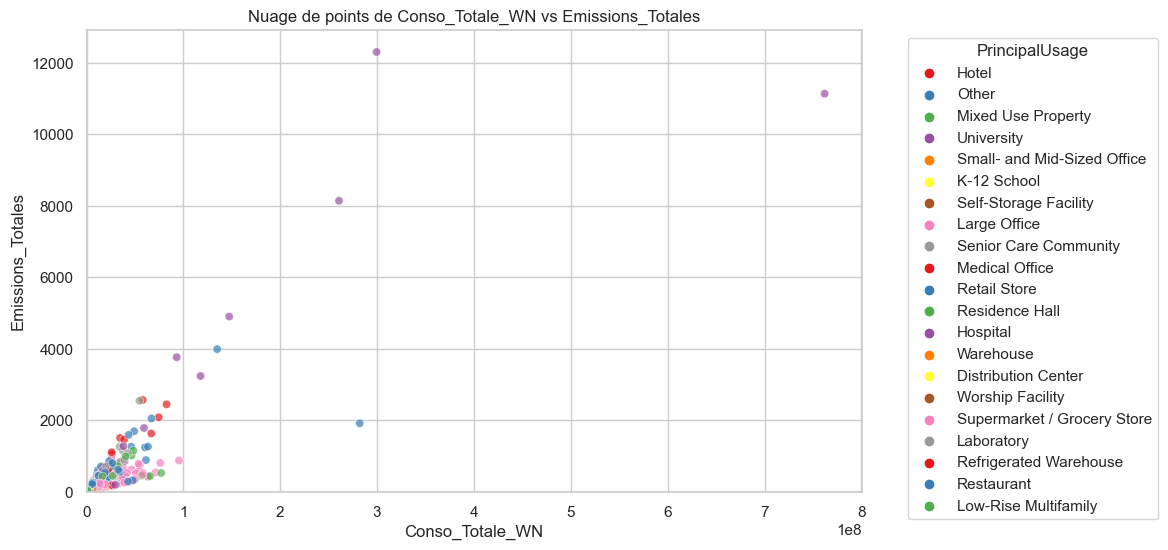

In [270]:
# Définir un style seaborn
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Conso_Totale_WN', y='Emissions_Totales', hue='PrincipalUsage', data=df_clean, palette='Set1', alpha=0.7)
plt.title('Nuage de points de Conso_Totale_WN vs Emissions_Totales')
plt.xlabel('Conso_Totale_WN')
plt.ylabel('Emissions_Totales')
plt.grid(True)
plt.xlim(0)
plt.ylim(0) 
plt.legend(title='PrincipalUsage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Nous constatons d'important 'outliers', dans notre situation ce sont plutôt des valeurs dites extrêmes car il est très envisagable d'avoir de très forte consommation sur des bâtiments très importants en surficie.
Néanmoins, ces outliers peuvent être handicapant pour nos modèles de machine learning, mon choix est de les conserver et de les traiter plus tard si besoin. Néanmoins, nous avons connaissance de leur existence dans le dataset.

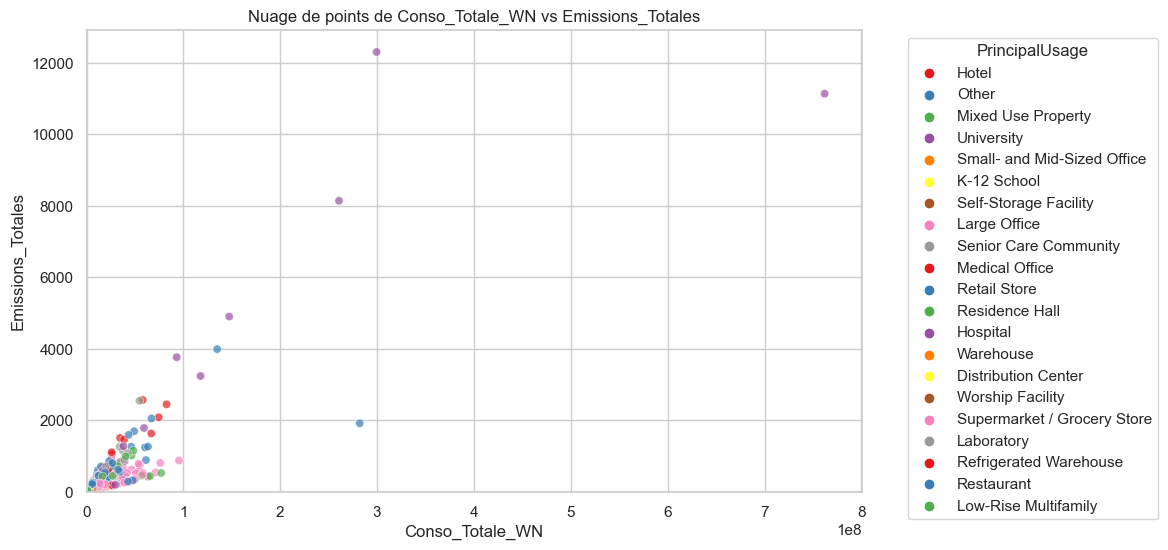

In [271]:
# Définir un style seaborn
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Conso_Totale_WN', y='Emissions_Totales', hue='PrincipalUsage', data=df_clean, palette='Set1', alpha=0.7)
plt.title('Nuage de points de Conso_Totale_WN vs Emissions_Totales')
plt.xlabel('Conso_Totale_WN')
plt.ylabel('Emissions_Totales')
plt.grid(True)
plt.xlim(0)
plt.ylim(0) 
plt.legend(title='PrincipalUsage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


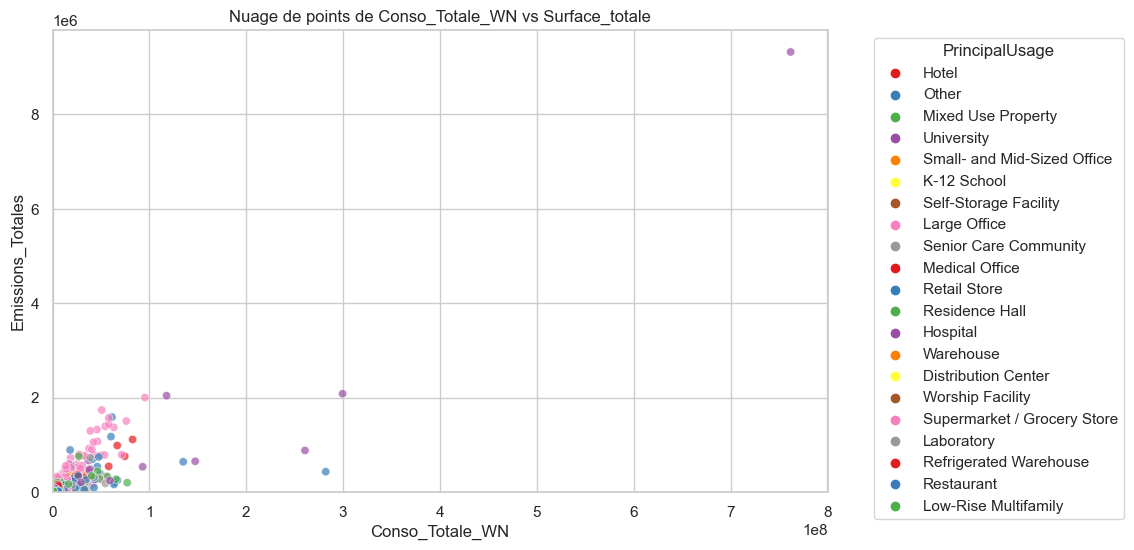

In [272]:
# Définir un style seaborn
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Conso_Totale_WN', y='Surface_totale', hue='PrincipalUsage', data=df_clean, palette='Set1', alpha=0.7)
plt.title('Nuage de points de Conso_Totale_WN vs Surface_totale')
plt.xlabel('Conso_Totale_WN')
plt.ylabel('Emissions_Totales')
plt.grid(True)
plt.xlim(0)
plt.ylim(0) 
plt.legend(title='PrincipalUsage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 3. Analyse bivariée

### A. Analyse des corrélations via une HeatMap

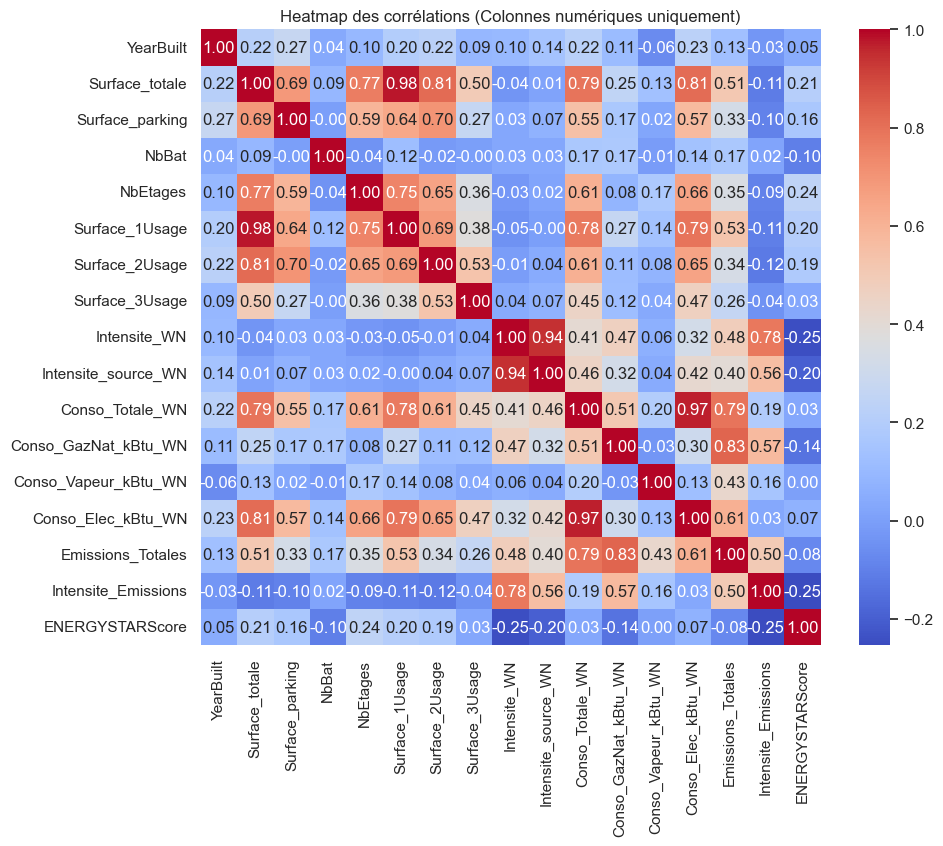

In [52]:
# Table des corrélations entre les variables

# Sélectionner uniquement les colonnes numériques
df_correlation = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
matrice_corr = df_correlation.corr()

# Tracer la heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des corrélations (Colonnes numériques uniquement)')
plt.show()

### B. Analyse de paires de variables avec des scatterplot

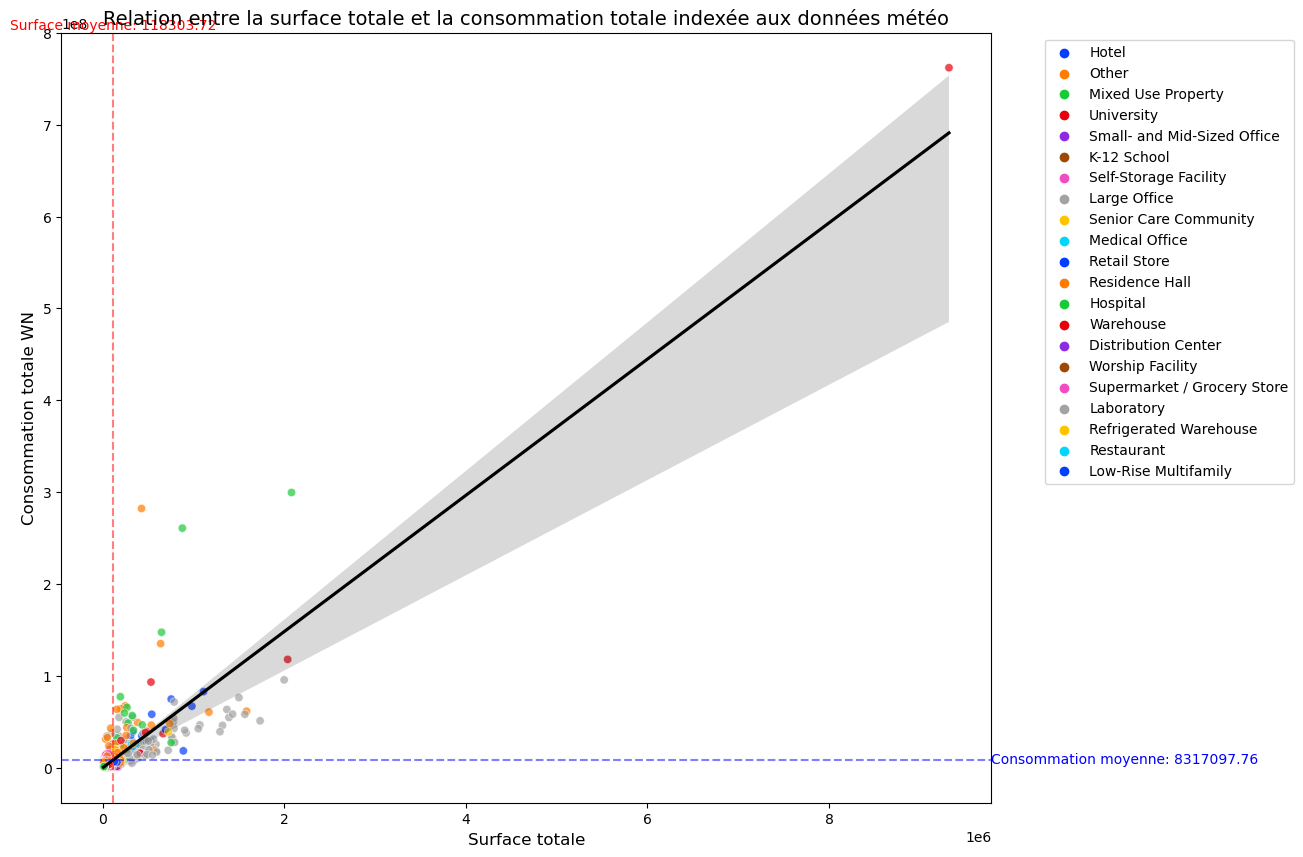

In [69]:
# Calcul des moyennes
mean_surface_totale = df_clean['Surface_totale'].mean()
mean_consototale = df_clean['Conso_Totale_WN'].mean()

# Créer le graphique avec les ajustements
plt.figure(figsize=(12, 10))

sns.scatterplot(x="Surface_totale", y="Conso_Totale_WN", hue="PrincipalUsage", data=df_clean, 
                palette="bright", alpha=0.7)

# Ajouter une ligne de régression linéaire
sns.regplot(x="Surface_totale", y="Conso_Totale_WN", data=df_clean, scatter=False, color='black')

# Modifier les limites des axes et ajouter des titres
plt.xlabel("Surface totale", fontsize=12)
plt.ylabel("Consommation totale WN", fontsize=12)
plt.title("Relation entre la surface totale et la consommation totale indexée aux données météo", fontsize=14)

# Ajouter les moyennes au graphique
plt.text(mean_surface_totale, plt.ylim()[1], f"Surface moyenne: {mean_surface_totale:.2f}", va='bottom', ha='center', color='red')
plt.text(plt.xlim()[1], mean_consototale, f"Consommation moyenne: {mean_consototale:.2f}", va='center', ha='left', color='blue')

# Tracer les lignes de moyennes
plt.axvline(x=mean_surface_totale, linestyle='--', color='red', alpha=0.5)
plt.axhline(y=mean_consototale, linestyle='--', color='blue', alpha=0.5)

# Placer la légende à l'extérieur du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


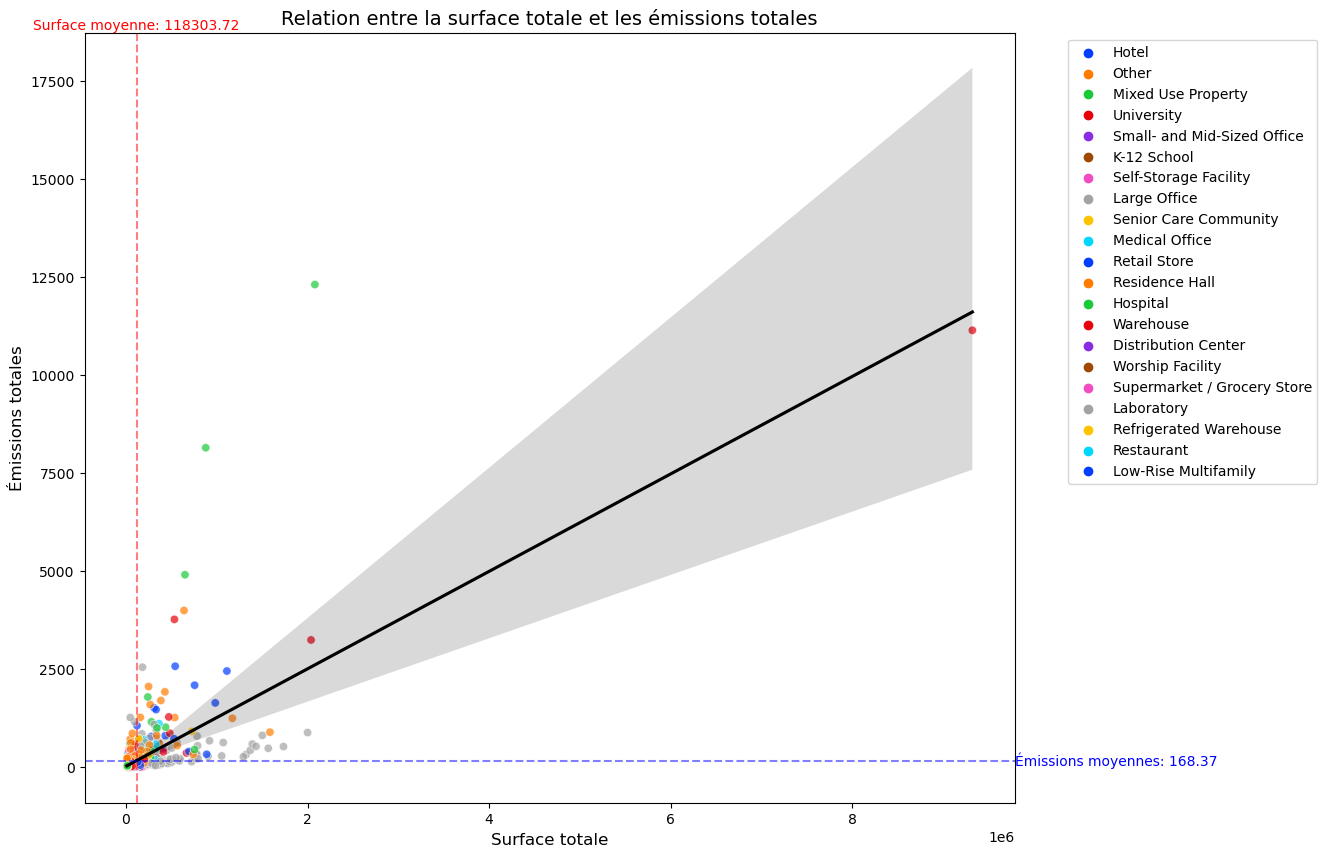

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des moyennes
mean_surface_totale = df_clean['Surface_totale'].mean()
mean_emissions_totales = df_clean['Emissions_Totales'].mean()

# Créer le graphique avec les ajustements
plt.figure(figsize=(12, 10))

sns.scatterplot(x="Surface_totale", y="Emissions_Totales", hue="PrincipalUsage", data=df_clean, 
                palette="bright", alpha=0.7)

# Ajouter une ligne de régression linéaire
sns.regplot(x="Surface_totale", y="Emissions_Totales", data=df_clean, scatter=False, color='black')

# Modifier les limites des axes et ajouter des titres
plt.xlabel("Surface totale", fontsize=12)
plt.ylabel("Émissions totales", fontsize=12)
plt.title("Relation entre la surface totale et les émissions totales", fontsize=14)

# Ajouter les moyennes au graphique
plt.text(mean_surface_totale, plt.ylim()[1], f"Surface moyenne: {mean_surface_totale:.2f}", va='bottom', ha='center', color='red')
plt.text(plt.xlim()[1], mean_emissions_totales, f"Émissions moyennes: {mean_emissions_totales:.2f}", va='center', ha='left', color='blue')

# Tracer les lignes de moyennes
plt.axvline(x=mean_surface_totale, linestyle='--', color='red', alpha=0.5)
plt.axhline(y=mean_emissions_totales, linestyle='--', color='blue', alpha=0.5)

# Placer la légende à l'extérieur du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## 4. Analyse focalisée sur l'association entre l'intensité de la consommation & leur utilisation

Le propos dans cette dernière partie de l'analyse descriptive de nos données, sera d'étudier les différents type d'utilisation et leur intensité de consommation.
C'est à dire de regarder comment varie l'intensité de la consommation, qui est l'association de la surface à la consommation totale, selon leur utilisation.
Nous pourrons ensuite détecter des variations plus ou moins flagrante entre l'intensité de la consommation et l'utilisation du bâtiment associé.

Voici le process employé :
- Détecter les outliers que nous pourrions qualifier d'unitaire, dans le sens où statistiquement cela peut de créer des biais dans notre modélisation.
- Réperer les types d'utilisation atypiques 
- Chercher les cohérences et des similitudes
- Objectif final : avoir des regroupements logiques basés le niveau d'intensité de consommation

Ce travail sera un préquel pour le pre-processing de nos données avec le machine learning. 
Cette étape devrait nous aider à réduire le nombre de type d'usage qui au total est de 135 actuellement.

In [53]:
# Création d'un dataframe pour cette partie
df_cat = df_clean.copy()

In [54]:
df_cat.shape

(1382, 23)

**Regardons la répartition de manière systémique, entre la surface allouée pour le 1ier, 2ième et 3ième usage.** 

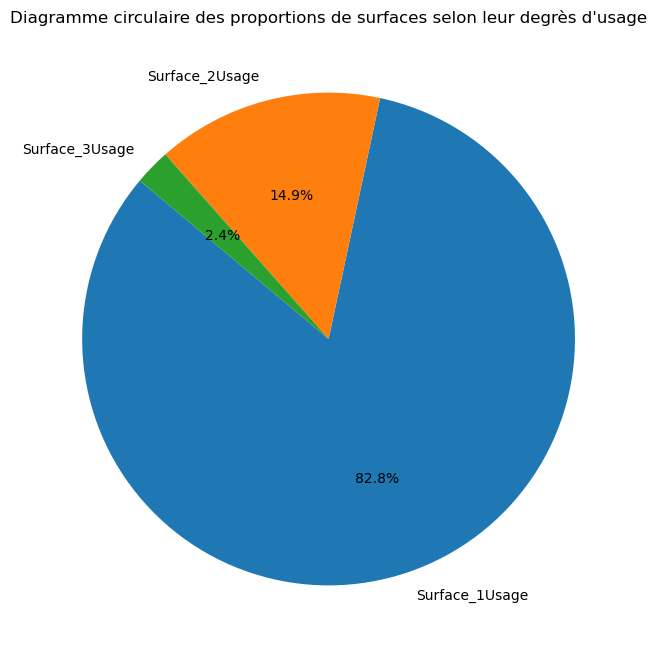

In [55]:
# Calculer la somme totale des surfaces
total_surface = df_cat['Surface_1Usage'].sum() + df_cat['Surface_2Usage'].sum() + df_cat['Surface_3Usage'].sum()

# Calculer les proportions de chaque variable par rapport à la somme totale
proportions = [
    df_cat['Surface_1Usage'].sum() / total_surface,
    df_cat['Surface_2Usage'].sum() / total_surface,
    df_cat['Surface_3Usage'].sum() / total_surface
]

# Étiquettes pour les parts
labels = ['Surface_1Usage', 'Surface_2Usage', 'Surface_3Usage']

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Diagramme circulaire des proportions de surfaces selon leur degrès d\'usage')
plt.show()


On voit très nettement que le 1ier usage représente plus de 80% des surfaces, suivi par la second usage avec 23,3% et pour finir l'usage 3, avec 7%. Cela est logique dans le cadre de notre étude, l'usage 1 étant l'usage principal de bâtiment. Néanmoins, avoir les proportions permet d'avoir un ordre d'idée sur la répartition entre les trois usages.
Nous allons donc dans un premier temps, nous intéresser au 1ier usage qui constitura notre base pour créer nos catégories, ensuite nous ferons une distribution selon les usages n°2 & n°3.

### A. L'intensité et le 1ier usage des bâtiments

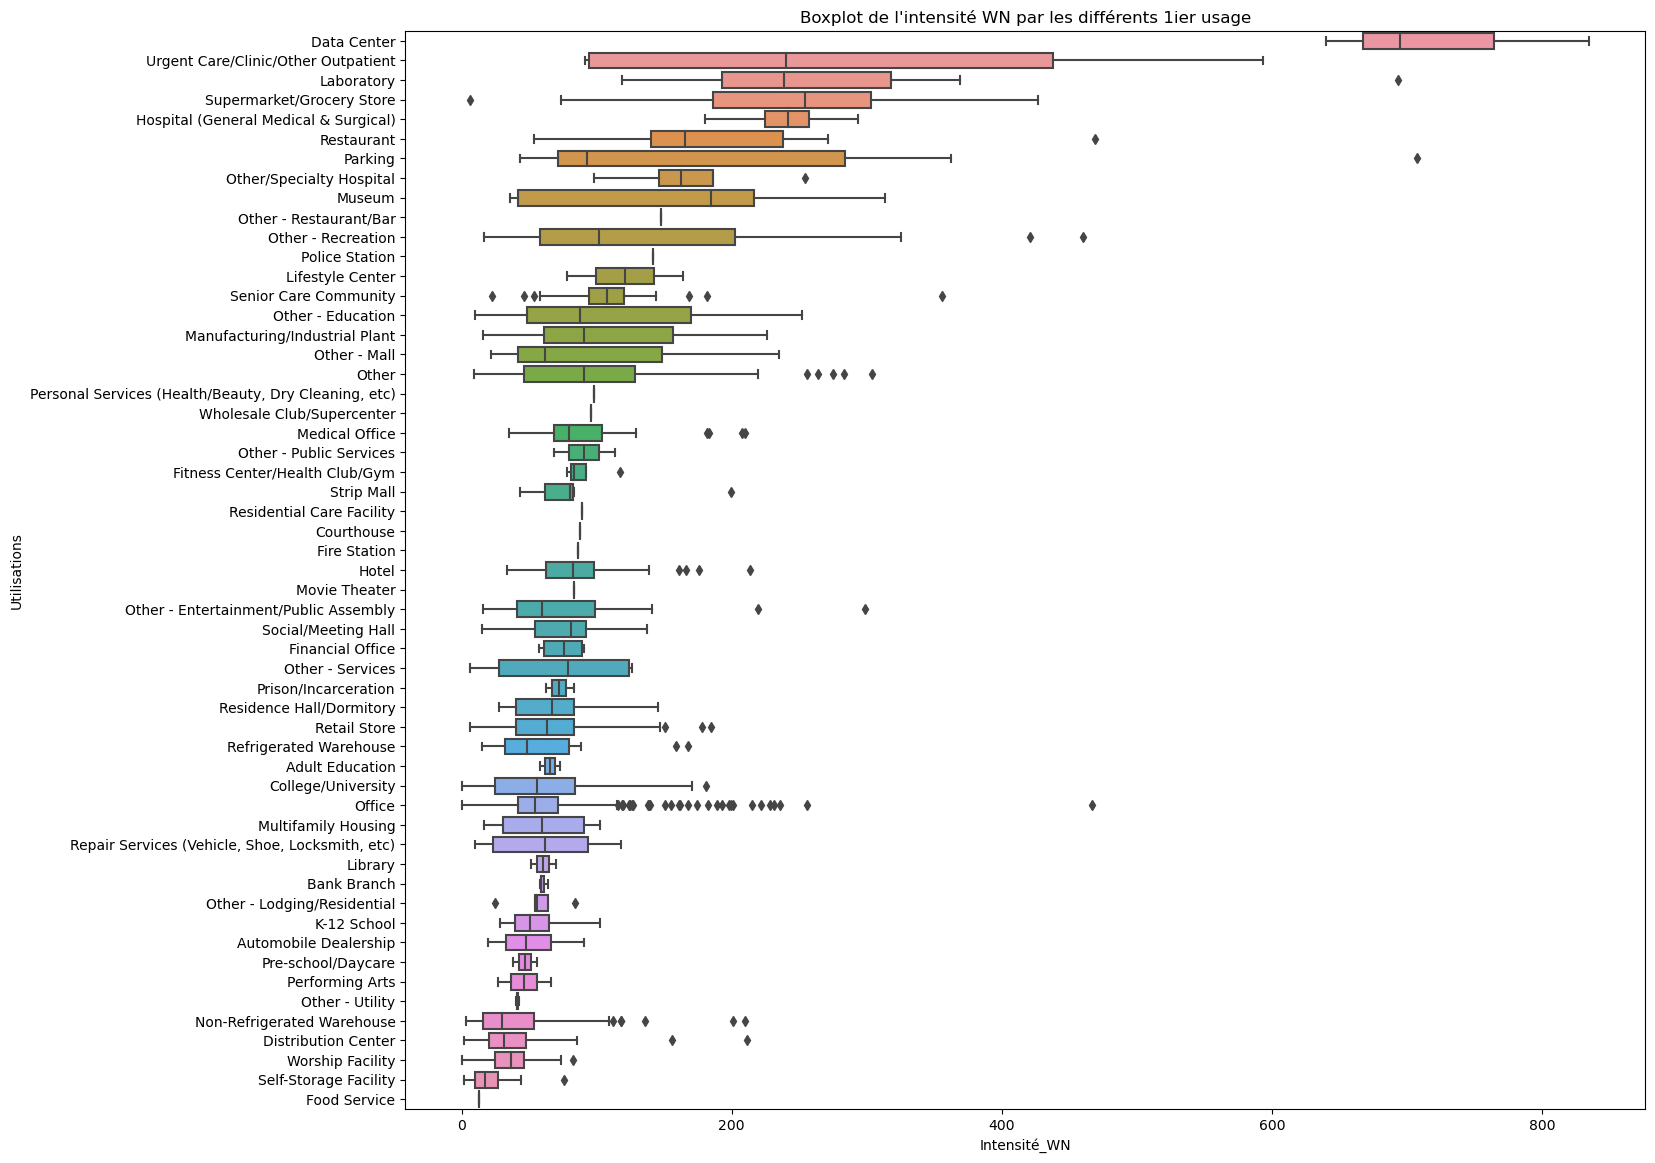

In [59]:
# Calculer la moyenne par utilisation et trier dans l'ordre décroissant
mean_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].mean().sort_values(ascending=False).index

# Créer le boxplot avec Seaborn en spécifiant l'ordre des catégories
plt.figure(figsize=(16, 14))
sns.boxplot(x='Intensite_WN', y='1_Usage', data=df_cat, order=mean_by_usage)

# Afficher le graphique
plt.title('Boxplot de l\'intensité WN par les différents 1ier usage')
plt.xlabel('Intensité_WN')
plt.ylabel('Utilisations')
plt.show()

A la lecture des boxplot ci-dessus, nous pouvons voir que selon les types d'usage des surfaces la consommation rapportée à la superficie (l'intensité) est différente et ne se comporte pas de la même manière.
L'usage qui ressort spontanément est le data center avec très forte consommation par sf.



In [206]:
# Calculer la moyenne de 'Intensite_WN' selon les catégories '1_Usage'
mean_intensity_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].mean()

# Calculer la médiane de 'Intensite_WN' selon les catégories '1_Usage'
median_intensity_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].median()

# Compter le nombre de valeurs selon les catégories '1_Usage'
count_by_usage = df_cat['1_Usage'].value_counts()

# Calculer le poids de chaque catégorie par rapport au total des valeurs en pourcentage
weight_by_usage_percent = (count_by_usage / len(df_cat)) * 100

# Créer un DataFrame pour stocker les résultats
usage_stats_df = pd.DataFrame({
    'Moyenne Intensite_WN': mean_intensity_by_usage,
    'Médiane Intensite_WN': median_intensity_by_usage,
    'Nombre de valeurs': count_by_usage,
    'Poids par rapport au total (%)': weight_by_usage_percent
})

# Classer les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
usage_stats_df = usage_stats_df.sort_values(by='Moyenne Intensite_WN', ascending=False)

# Afficher le DataFrame
print("Statistiques par catégorie '1_Usage' :")
usage_stats_df


Statistiques par catégorie '1_Usage' :


Moyenne Intensite_WN  \
1_Usage                                                                    
Data Center                                                   722.966675   
Urgent Care/Clinic/Other Outpatient                           291.499994   
Laboratory                                                    276.633332   
Supermarket/Grocery Store                                     242.130770   
Hospital (General Medical & Surgical)                         226.457145   
Restaurant                                                    191.509092   
Other/Specialty Hospital                                      169.399998   
Museum                                                        158.520002   
Other - Recreation                                            154.980000   
Other - Mall                                                  149.024998   
Other - Restaurant/Bar                                        147.650002   
Parking                                                       142.375001   
Police Station                                                141.600006   
Lifestyle Center                                              121.250000   
Senior Care Community                                         117.805264   
Other - Education                                             116.566669   
Manufacturing/Industrial Plant                                 98.724999   
Fitness Center/Health Club/Gym                                 97.900002   
Personal Services (Health/Beauty, Dry Cleaning,...             97.800003   
Other                                                          96.489011   
Wholesale Club/Supercenter                                     95.500000   
Medical Office                                                 94.212500   
Social/Meeting Hall                                            93.040001   
Other - Public Services                                        90.750000   
Strip Mall                                                     90.300001   
Residential Care Facility                                      89.199997   
Courthouse                                                     87.500000   
Fire Station                                                   86.199997   
Movie Theater                                                  83.500000   
Hotel                                                          83.489333   
Other - Entertainment/Public Assembly                          83.205264   
Library                                                        75.449999   
Financial Office                                               74.825002   
Other - Services                                               72.775000   
Prison/Incarceration                                           72.433334   
Retail Store                                                   68.614286   
Bank Branch                                                    68.475000   
Refrigerated Warehouse                                         66.518181   
Adult Education                                                65.249998   
Residence Hall/Dormitory                                       64.159090   
Office                                                         64.070068   
College/University                                             63.650000   
Performing Arts                                                62.033333   
Multifamily Housing                                            61.118181   
Repair Services (Vehicle, Shoe, Locksmith, etc)                61.016667   
Other - Lodging/Residential                                    56.680000   
K-12 School                                                    53.604445   
Pre-school/Daycare                                             47.100000   
Automobile Dealership                                          45.620000   
Other - Utility                                                41.400000   
Non-Refrigerated Warehouse                                     38.464767   
Distribution Center     

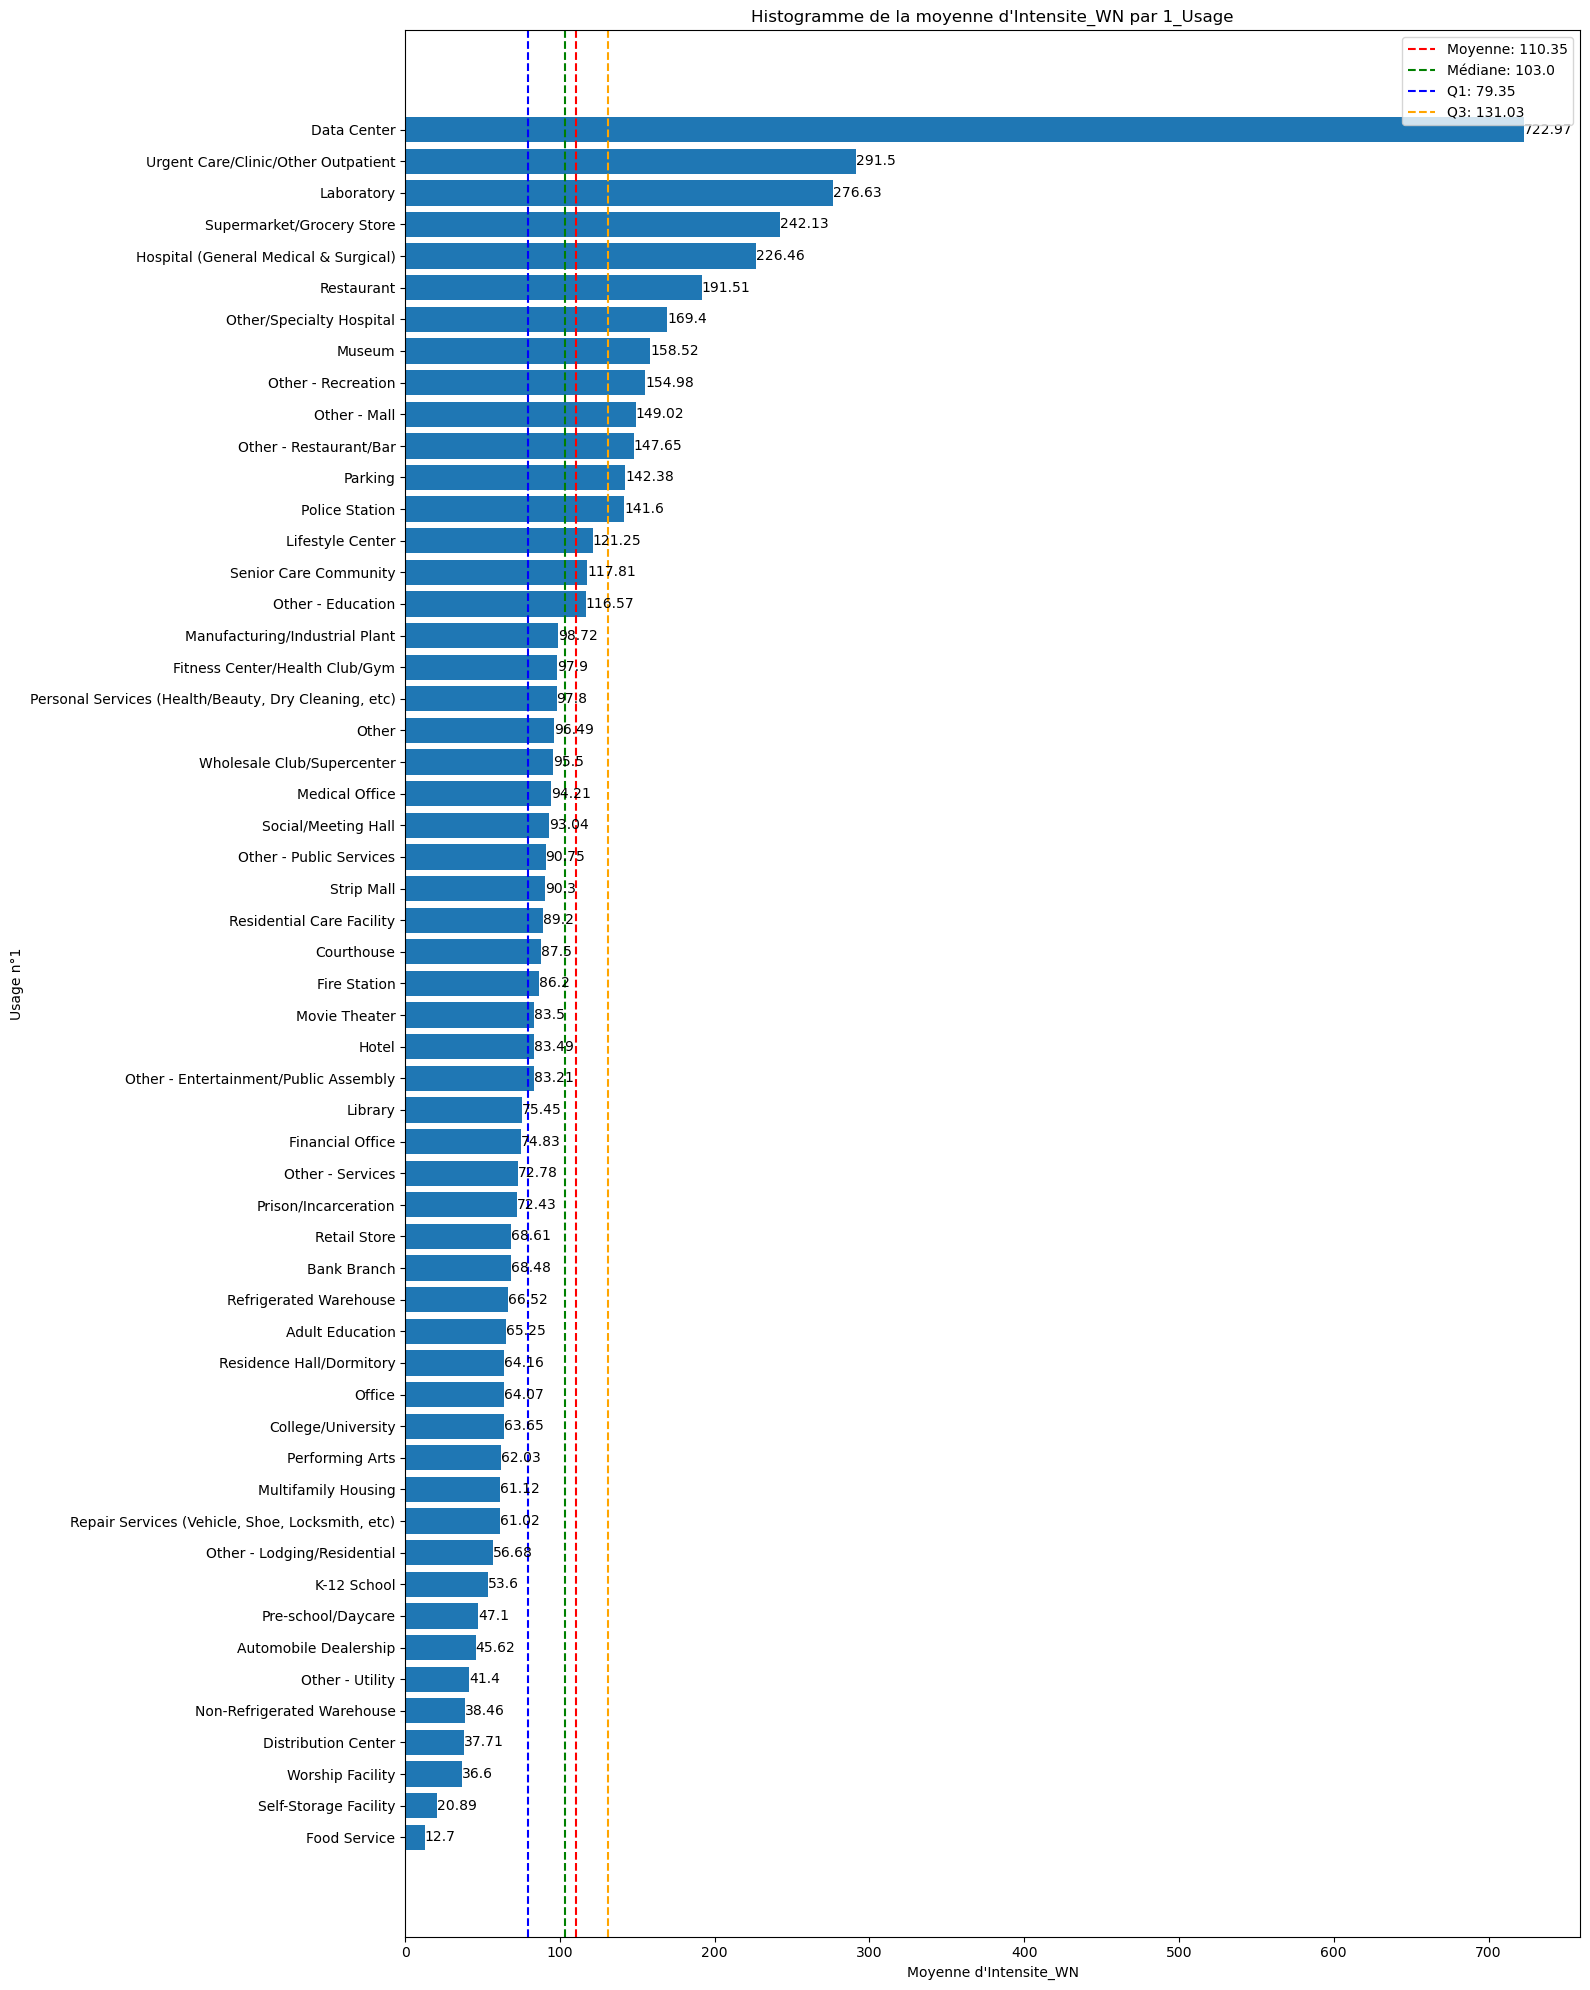

In [207]:
# Calculer la moyenne d'Intensite_WN par 1_Usage
mean_intensity_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_WN par 1_Usage
median_intensity_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_WN par 1_Usage
q1_intensity_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].quantile(0.25)
q3_intensity_by_usage = df_cat.groupby('1_Usage')['Intensite_WN'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°1')
plt.xlabel('Moyenne d\'Intensite_WN')
plt.title('Histogramme de la moyenne d\'Intensite_WN par 1_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétations :**

*Rappel de l'objectif de cette partie :*

Créer des catégories cohérentes en associant des types d'utilisation similaire en terme d'intensité, qui permet de rapport la consommation rapportée à la surface allouée.

Voici les catégories que nous pouvons extraire de ce graphique, qui vont être regroupé dans des variables spécifiques pour être réutiliser par la suite.


In [48]:
# Calculer la moyenne par catégorie
category_mean = df_cat.groupby('1_Usage')['Intensite_WN'].mean()

# Fonction pour déterminer si une catégorie doit être renommée en "Other"
def categorize_usage(row):
    if 50 <= category_mean[row['1_Usage']] <= 140:
        return 'Other'
    else:
        return row['1_Usage']

# Appliquer la fonction pour créer une nouvelle colonne 'Category' en utilisant .loc
df_cat.loc[:, 'NewCatUsage1'] = df_cat.apply(categorize_usage, axis=1)

# Afficher les valeurs uniques de la colonne 'Category'
unique_categories_conso = df_cat['NewCatUsage1'].unique()
print(unique_categories_conso)
print(len(unique_categories_conso))

['Other' 'Police Station' 'Self-Storage Facility' 'Museum'
 'Other/Specialty Hospital' 'Hospital (General Medical & Surgical)'
 'Non-Refrigerated Warehouse' 'Distribution Center' 'Worship Facility'
 'Restaurant' 'Data Center' 'Parking' 'Laboratory'
 'Supermarket/Grocery Store' 'Urgent Care/Clinic/Other Outpatient'
 'Other - Recreation' 'Performing Arts' 'Other - Restaurant/Bar'
 'Food Service' 'Other - Utility' 'Pre-school/Daycare']
21


### B. L'intensité et le 2ième usage des bâtiments

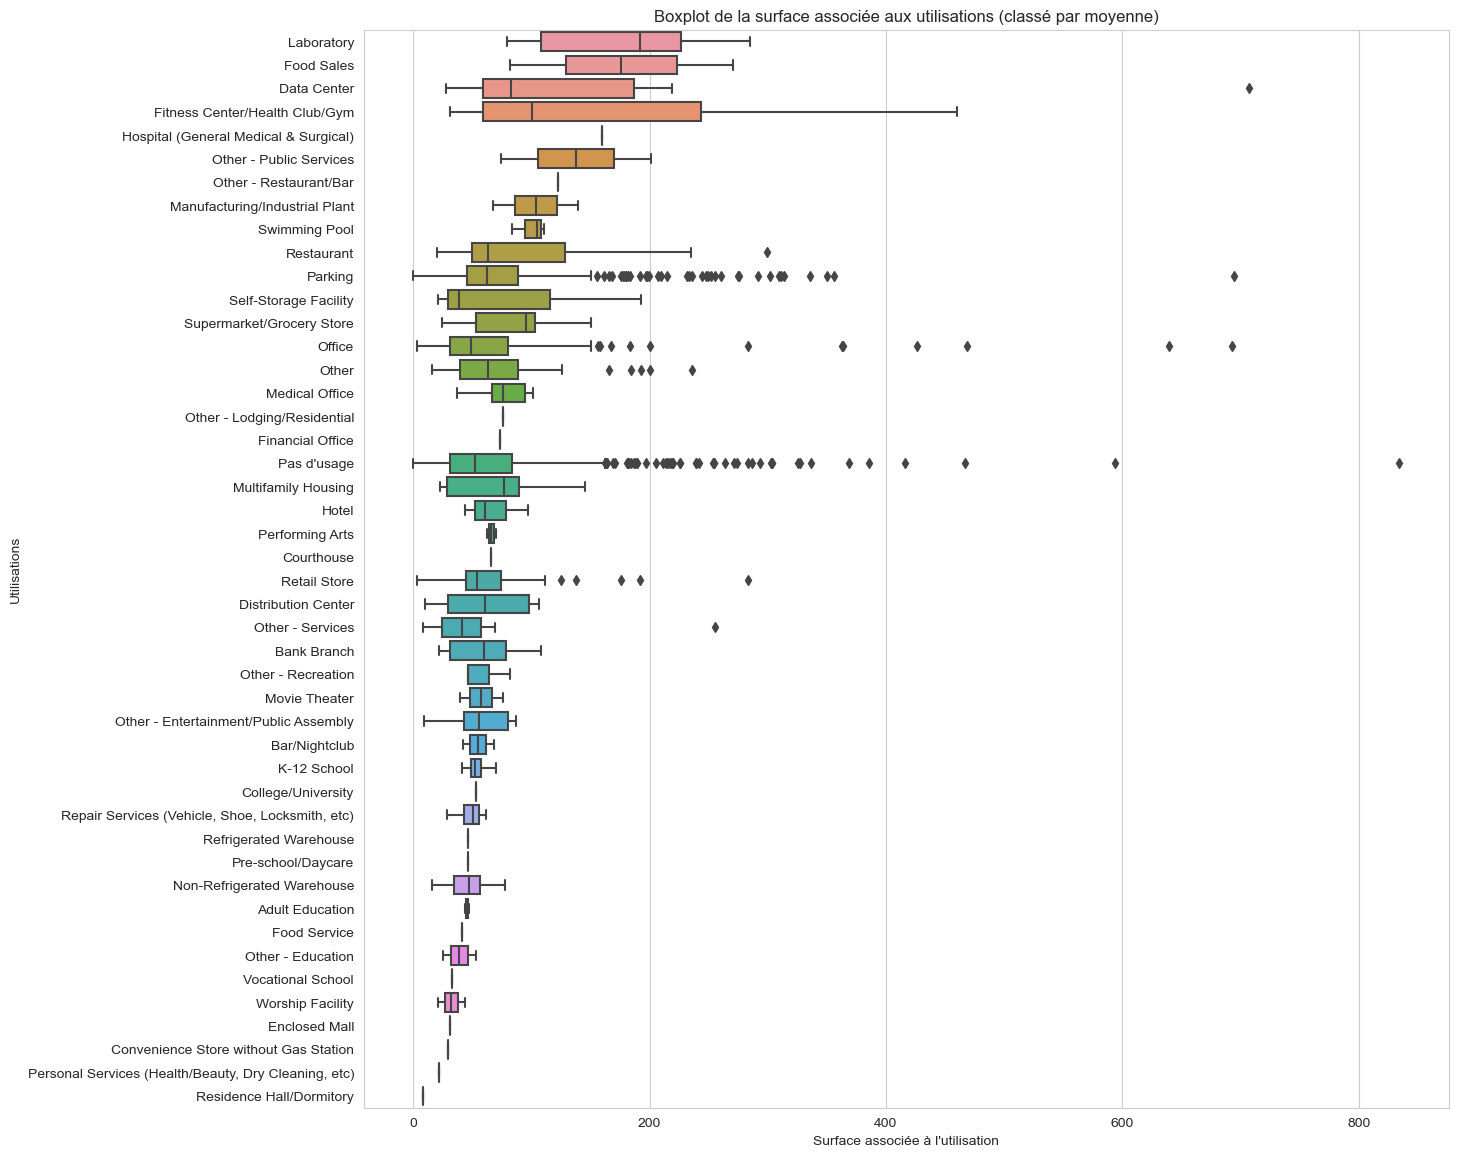

In [353]:
# Filtrer les lignes où '2_Usage' n'est pas égal à 'Pas d'usage'
#df_cat = df_cat[df_cat['2_Usage'] != 'Pas d\'usage']

# Calculer la moyenne par utilisation et trier dans l'ordre décroissant
mean_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].mean().sort_values(ascending=False).index

# Créer le boxplot avec Seaborn en spécifiant l'ordre des catégories
plt.figure(figsize=(14, 14))
sns.boxplot(x='Intensite_WN', y='2_Usage', data=df_cat, order=mean_by_usage)

# Afficher le graphique
plt.title('Boxplot de la surface associée aux utilisations (classé par moyenne)')
plt.xlabel('Surface associée à l\'utilisation')
plt.ylabel('Utilisations')
plt.show()

In [49]:
# Filtrer les données pour exclure la catégorie 'Pas d'usage'
#df_cat = df_cat[df_cat['3_Usage'] != 'Pas d\'usage']

# Calculer la moyenne de 'Intensite_WN' selon les catégories '2_Usage'
mean_intensity_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].mean()

# Calculer la médiane de 'Intensite_WN' selon les catégories '2_Usage'
median_intensity_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].median()

# Compter le nombre de valeurs selon les catégories '2_Usage'
count_by_usage = df_cat['2_Usage'].value_counts()

# Calculer le poids de chaque catégorie par rapport au total des valeurs en pourcentage
weight_by_usage_percent = (count_by_usage / len(df_clean)) * 100

# Créer un DataFrame pour stocker les résultats
usage_stats_df = pd.DataFrame({
    'Moyenne Intensite_WN': mean_intensity_by_usage,
    'Médiane Intensite_WN': median_intensity_by_usage,
    'Nombre de valeurs': count_by_usage,
    'Poids par rapport au total (%)': weight_by_usage_percent
})

# Classer les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
usage_stats_df = usage_stats_df.sort_values(by='Moyenne Intensite_WN', ascending=False)

# Afficher le DataFrame
print("Statistiques par catégorie '2_Usage' :")
usage_stats_df


Statistiques par catégorie '2_Usage' :


Moyenne Intensite_WN  \
2_Usage                                                                    
Laboratory                                                    177.633333   
Food Sales                                                    176.200005   
Data Center                                                   164.054545   
Fitness Center/Health Club/Gym                                161.157144   
Hospital (General Medical & Surgical)                         159.699997   
Other - Public Services                                       137.800003   
Other - Restaurant/Bar                                        122.300003   
Manufacturing/Industrial Plant                                103.900002   
Swimming Pool                                                  99.833333   
Restaurant                                                     95.371428   
Parking                                                        85.392123   
Self-Storage Facility                                          84.166667   
Supermarket/Grocery Store                                      83.299998   
Office                                                         78.068212   
Other                                                          77.500000   
Medical Office                                                 76.650001   
Other - Lodging/Residential                                    75.800003   
Financial Office                                               73.599998   
Pas d'usage                                                    70.064587   
Multifamily Housing                                            68.520000   
Hotel                                                          67.266666   
Performing Arts                                                66.300001   
Courthouse                                                     65.699997   
Retail Store                                                   64.645177   
Distribution Center                                            61.828571   
Other - Services                                               60.179999   
Bank Branch                                                    59.333333   
Other - Recreation                                             58.266666   
Movie Theater                                                  57.600002   
Other - Entertainment/Public Assembly                          55.850000   
Bar/Nightclub                                                  55.249998   
K-12 School                                                    54.100000   
College/University                                             53.299999   
Repair Services (Vehicle, Shoe, Locksmith, etc)                47.850000   
Refrigerated Warehouse                                         46.799999   
Pre-school/Daycare                                             46.599998   
Non-Refrigerated Warehouse                                     45.946154   
Adult Education                                                45.500000   
Food Service                                                   41.099998   
Other - Education                                              39.250000   
Vocational School                                              33.099998   
Worship Facility                                               32.449999   
Enclosed Mall                                                  30.799999   
Convenience Store without Gas Station                          29.600000   
Personal Services (Health/Beauty, Dry Cleaning,...             21.600000   
Residence Hall/Dormitory                                        8.000000   

                                                    Médiane Intensite_WN  \
2_Usage                                                                    
Laboratory                                                    191.649994   
Food Sales                                                    176.200005   
Data Center                                                    82.400002   
Fitness Center/Health C

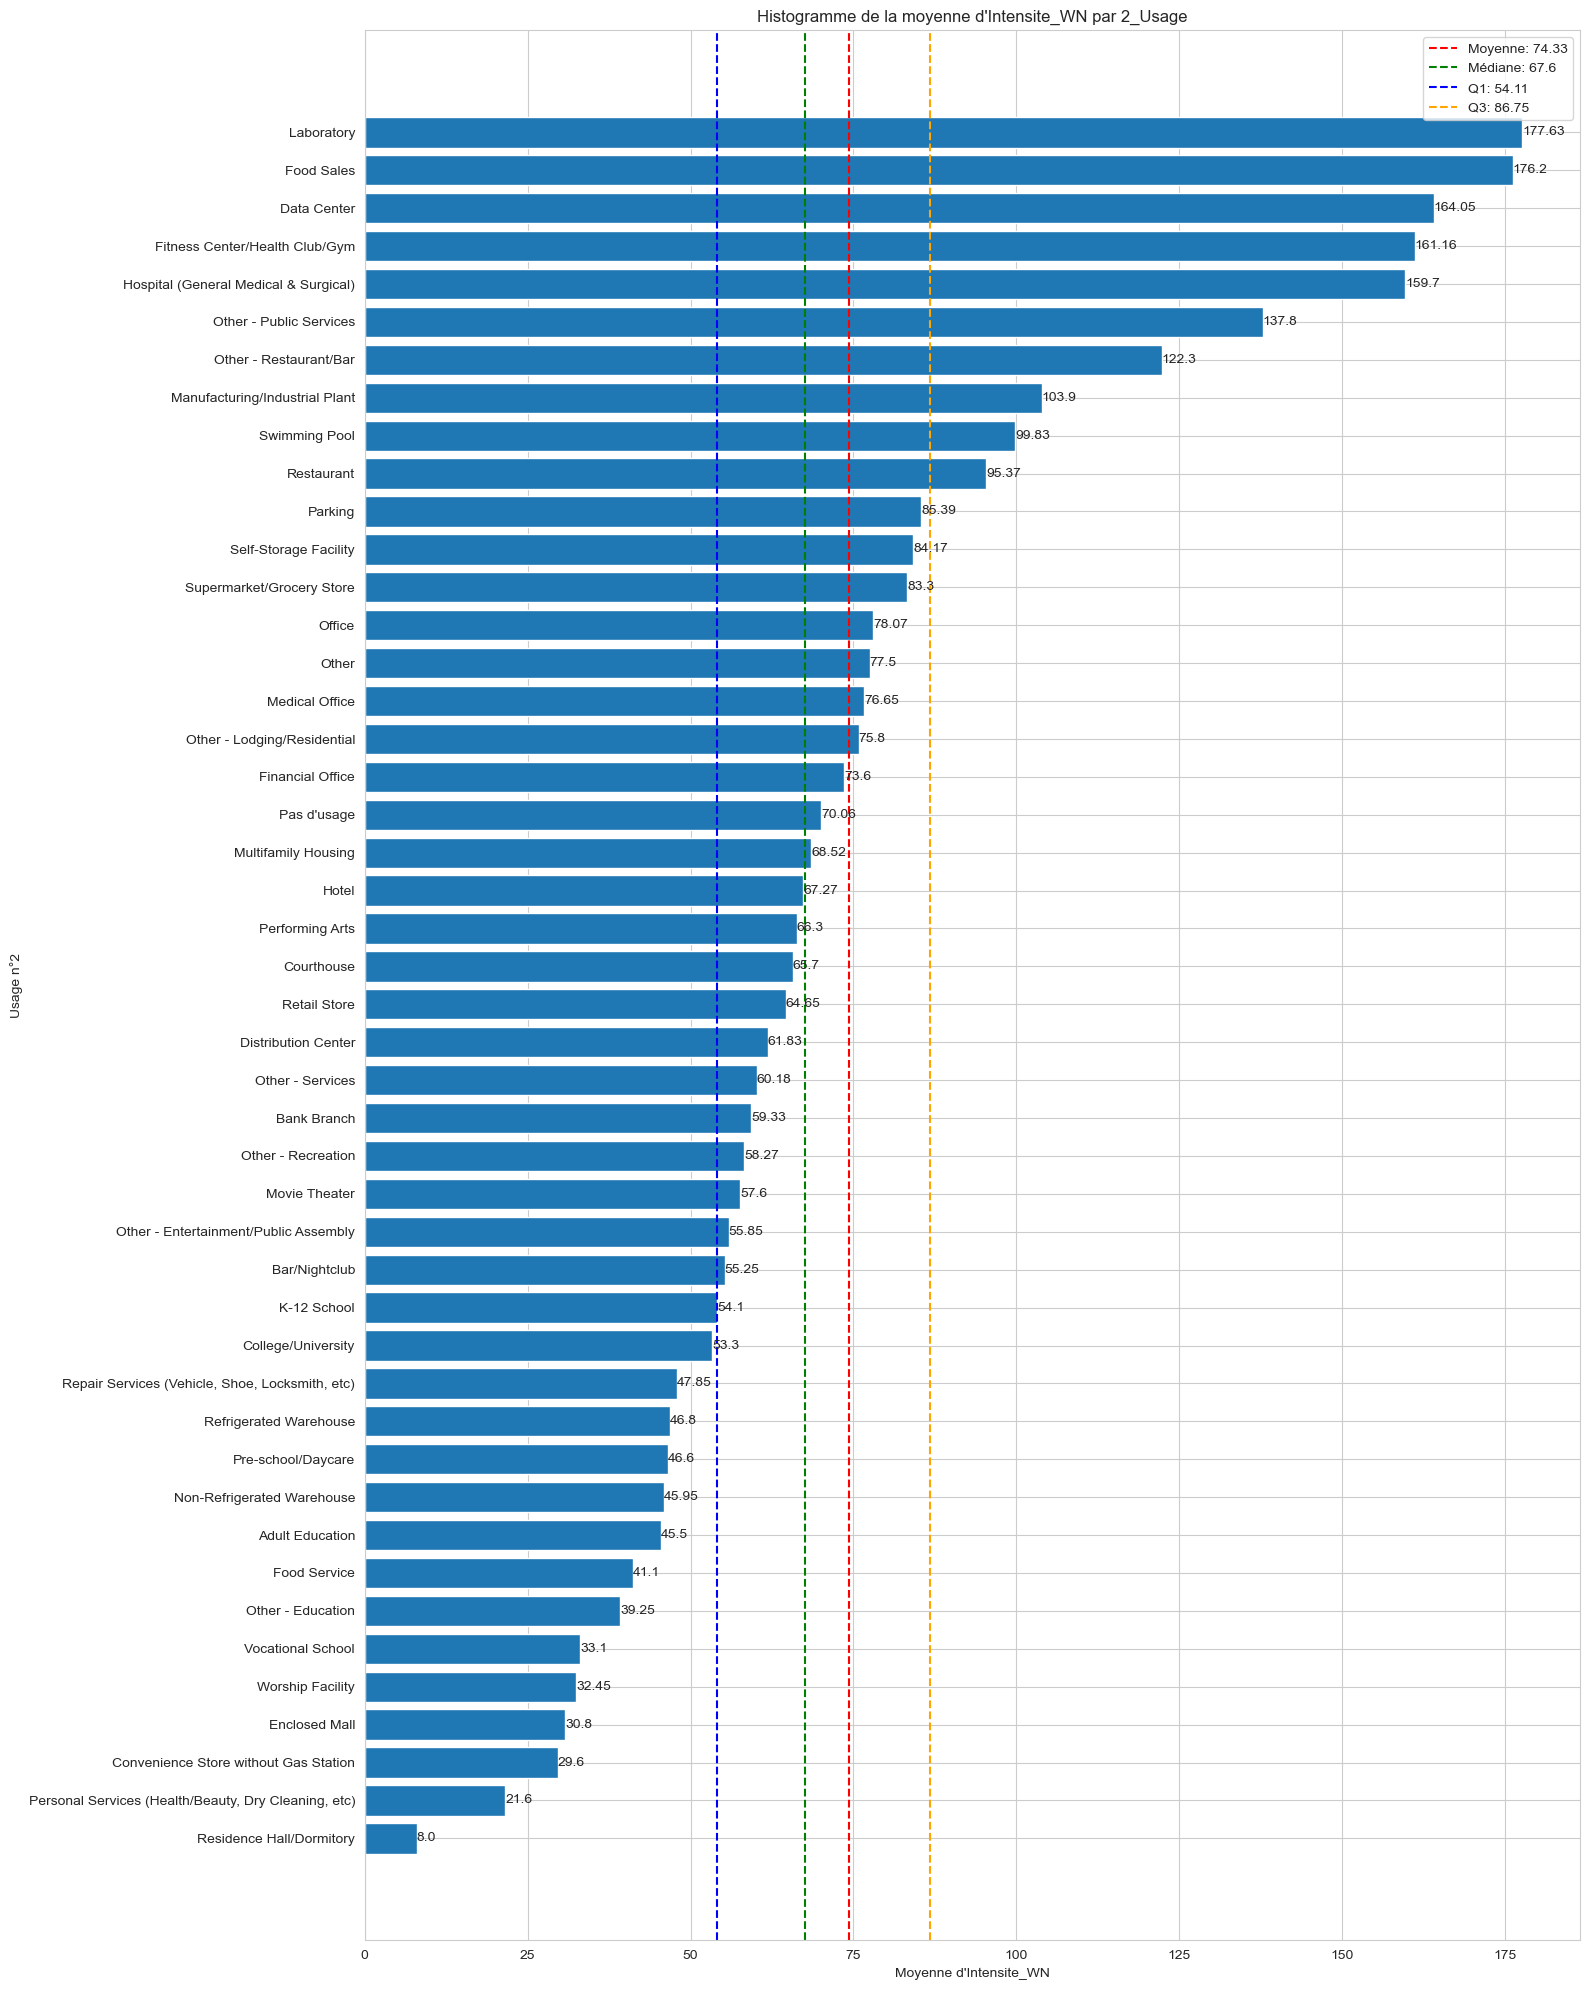

In [355]:
# Calculer la moyenne d'Intensite_WN par 2_Usage
mean_intensity_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_WN par 2_Usage
median_intensity_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_WN par 2_Usage
q1_intensity_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].quantile(0.25)
q3_intensity_by_usage = df_cat.groupby('2_Usage')['Intensite_WN'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°2')
plt.xlabel('Moyenne d\'Intensite_WN')
plt.title('Histogramme de la moyenne d\'Intensite_WN par 2_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [50]:
# Calculer la moyenne par catégorie pour la variable 2_Usage
category_mean_2 = df_cat.groupby('2_Usage')['Intensite_WN'].mean()

# Fonction pour déterminer si une catégorie doit être renommée en "Other" pour la variable 2_Usage
def categorize_usage_2(row):
    usage_category_2 = row['2_Usage']
    if usage_category_2 not in unique_categories_conso:
        return 'Other'
    elif usage_category_2 in category_mean_2.index:
        if 50 <= category_mean_2[usage_category_2] <= 140:
            return 'Other'
        else:
            return usage_category_2
    else:
        return 'Other'

# Appliquer la fonction pour créer une nouvelle colonne 'NewCatUsage2' en utilisant .loc
df_cat['NewCatUsage2'] = df_cat.apply(categorize_usage_2, axis=1)

# Afficher les valeurs uniques de la colonne 'NewCatUsage2'
unique_categories_conso_2 = df_cat['NewCatUsage2'].unique()
print(unique_categories_conso_2)
print(len(unique_categories_conso_2))


['Other' 'Non-Refrigerated Warehouse' 'Data Center' 'Laboratory'
 'Worship Facility' 'Food Service' 'Pre-school/Daycare'
 'Hospital (General Medical & Surgical)']
8


### C. L'intensité et le 3ieme usage des bâtiments

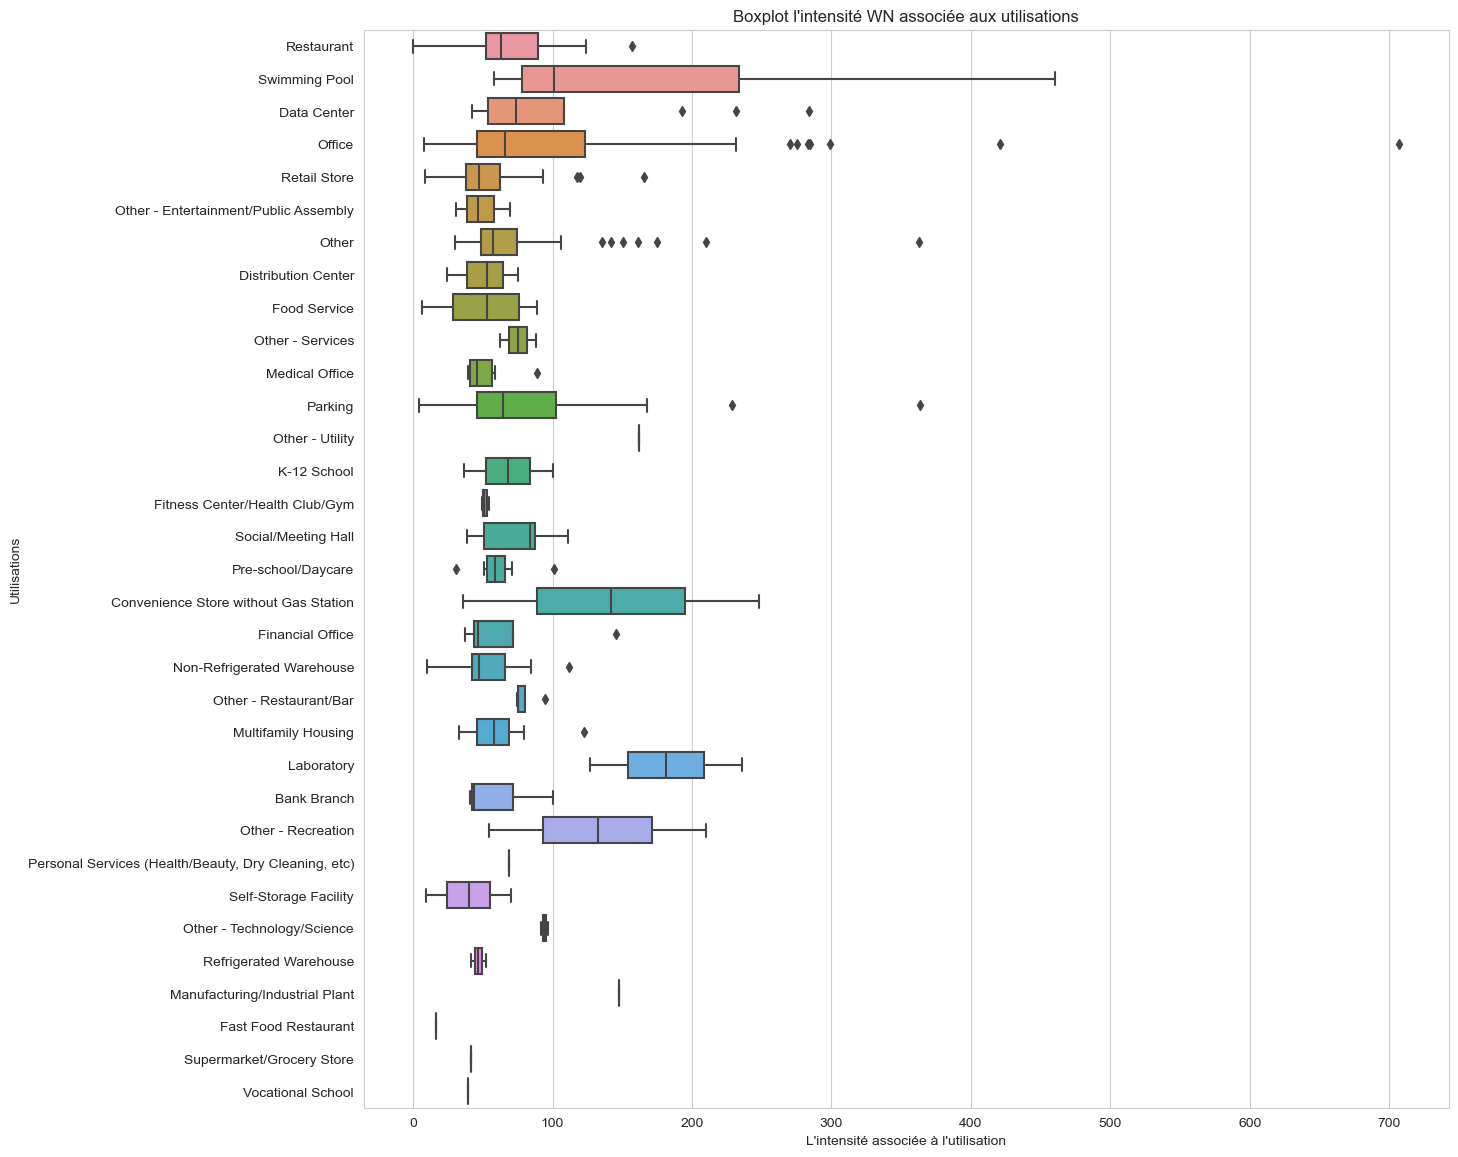

In [326]:
# Filtrer les lignes où '2_Usage' n'est pas égal à 'Pas d'usage'
#df_clean = df_cat[df_clean['3_Usage'] != 'Pas d\'usage']

# Créer le boxplot avec Seaborn
plt.figure(figsize=(14, 14))
sns.boxplot(x='Intensite_WN', y='3_Usage', data=df_clean)

# Afficher le graphique
plt.title('Boxplot l\'intensité WN associée aux utilisations')
plt.xlabel('L\'intensité associée à l\'utilisation')
plt.ylabel('Utilisations')
plt.show()

In [327]:
# Filtrer les données pour exclure la catégorie 'Pas d'usage'
#df_clean = df_clean[df_clean['3_Usage'] != 'Pas d\'usage']

# Calculer la moyenne de 'Intensite_WN' selon les catégories '3_Usage'
mean_intensity_by_usage = df_cat.groupby('3_Usage')['Intensite_WN'].mean()

# Calculer la médiane de 'Intensite_WN' selon les catégories '3_Usage'
median_intensity_by_usage = df_cat.groupby('3_Usage')['Intensite_WN'].median()

# Compter le nombre de valeurs selon les catégories '3_Usage'
count_by_usage = df_cat['3_Usage'].value_counts()

# Calculer le poids de chaque catégorie par rapport au total des valeurs en pourcentage
weight_by_usage_percent = (count_by_usage / len(df_clean)) * 100

# Créer un DataFrame pour stocker les résultats
usage_stats_df = pd.DataFrame({
    'Moyenne Intensite_WN': mean_intensity_by_usage,
    'Médiane Intensite_WN': median_intensity_by_usage,
    'Nombre de valeurs': count_by_usage,
    'Poids par rapport au total (%)': weight_by_usage_percent
})

# Classer les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
usage_stats_df = usage_stats_df.sort_values(by='Moyenne Intensite_WN', ascending=False)

# Afficher le DataFrame
print("Statistiques par catégorie '3_Usage' :")
usage_stats_df


Statistiques par catégorie '3_Usage' :


Moyenne Intensite_WN  \
3_Usage                                                                    
Laboratory                                                    181.150002   
Swimming Pool                                                 164.560001   
Other - Utility                                               161.899994   
Manufacturing/Industrial Plant                                148.000000   
Convenience Store without Gas Station                         142.049999   
Other - Recreation                                            132.249996   
Office                                                        116.506819   
Data Center                                                   106.646154   
Other - Technology/Science                                     94.150002   
Parking                                                        81.232500   
Other                                                          80.891667   
Other - Restaurant/Bar                                         80.000002   
Other - Services                                               75.150002   
Social/Meeting Hall                                            74.180000   
Restaurant                                                     71.068966   
Financial Office                                               68.849998   
Personal Services (Health/Beauty, Dry Cleaning,...             68.699997   
K-12 School                                                    68.150000   
Bank Branch                                                    61.600001   
Multifamily Housing                                            61.570000   
Pre-school/Daycare                                             61.371429   
Retail Store                                                   55.153658   
Non-Refrigerated Warehouse                                     54.700000   
Medical Office                                                 53.250000   
Food Service                                                   51.537500   
Fitness Center/Health Club/Gym                                 51.533334   
Distribution Center                                            50.900000   
Other - Entertainment/Public Assembly                          49.200001   
Refrigerated Warehouse                                         46.850000   
Supermarket/Grocery Store                                      41.799999   
Self-Storage Facility                                          39.750001   
Vocational School                                              39.400002   
Fast Food Restaurant                                           16.700001   

                                                    Médiane Intensite_WN  \
3_Usage                                                                    
Laboratory                                                    181.150002   
Swimming Pool                                                 100.750000   
Other - Utility                                               161.899994   
Manufacturing/Industrial Plant                                148.000000   
Convenience Store without Gas Station                         142.049999   
Other - Recreation                                            132.249996   
Office                                                         65.850002   
Data Center                                                    73.599998   
Other - Technology/Science                                     94.150002   
Parking                                                        64.350002   
Other                                                          57.600000   
Other - Restaurant/Bar                                         75.350002   
Other - Services                                               75.150002   
Social/Meeting Hall                                            83.500000   
Restaurant                                                     62.900002   
Financial Office                                               46.350000   
Personal Services (Heal

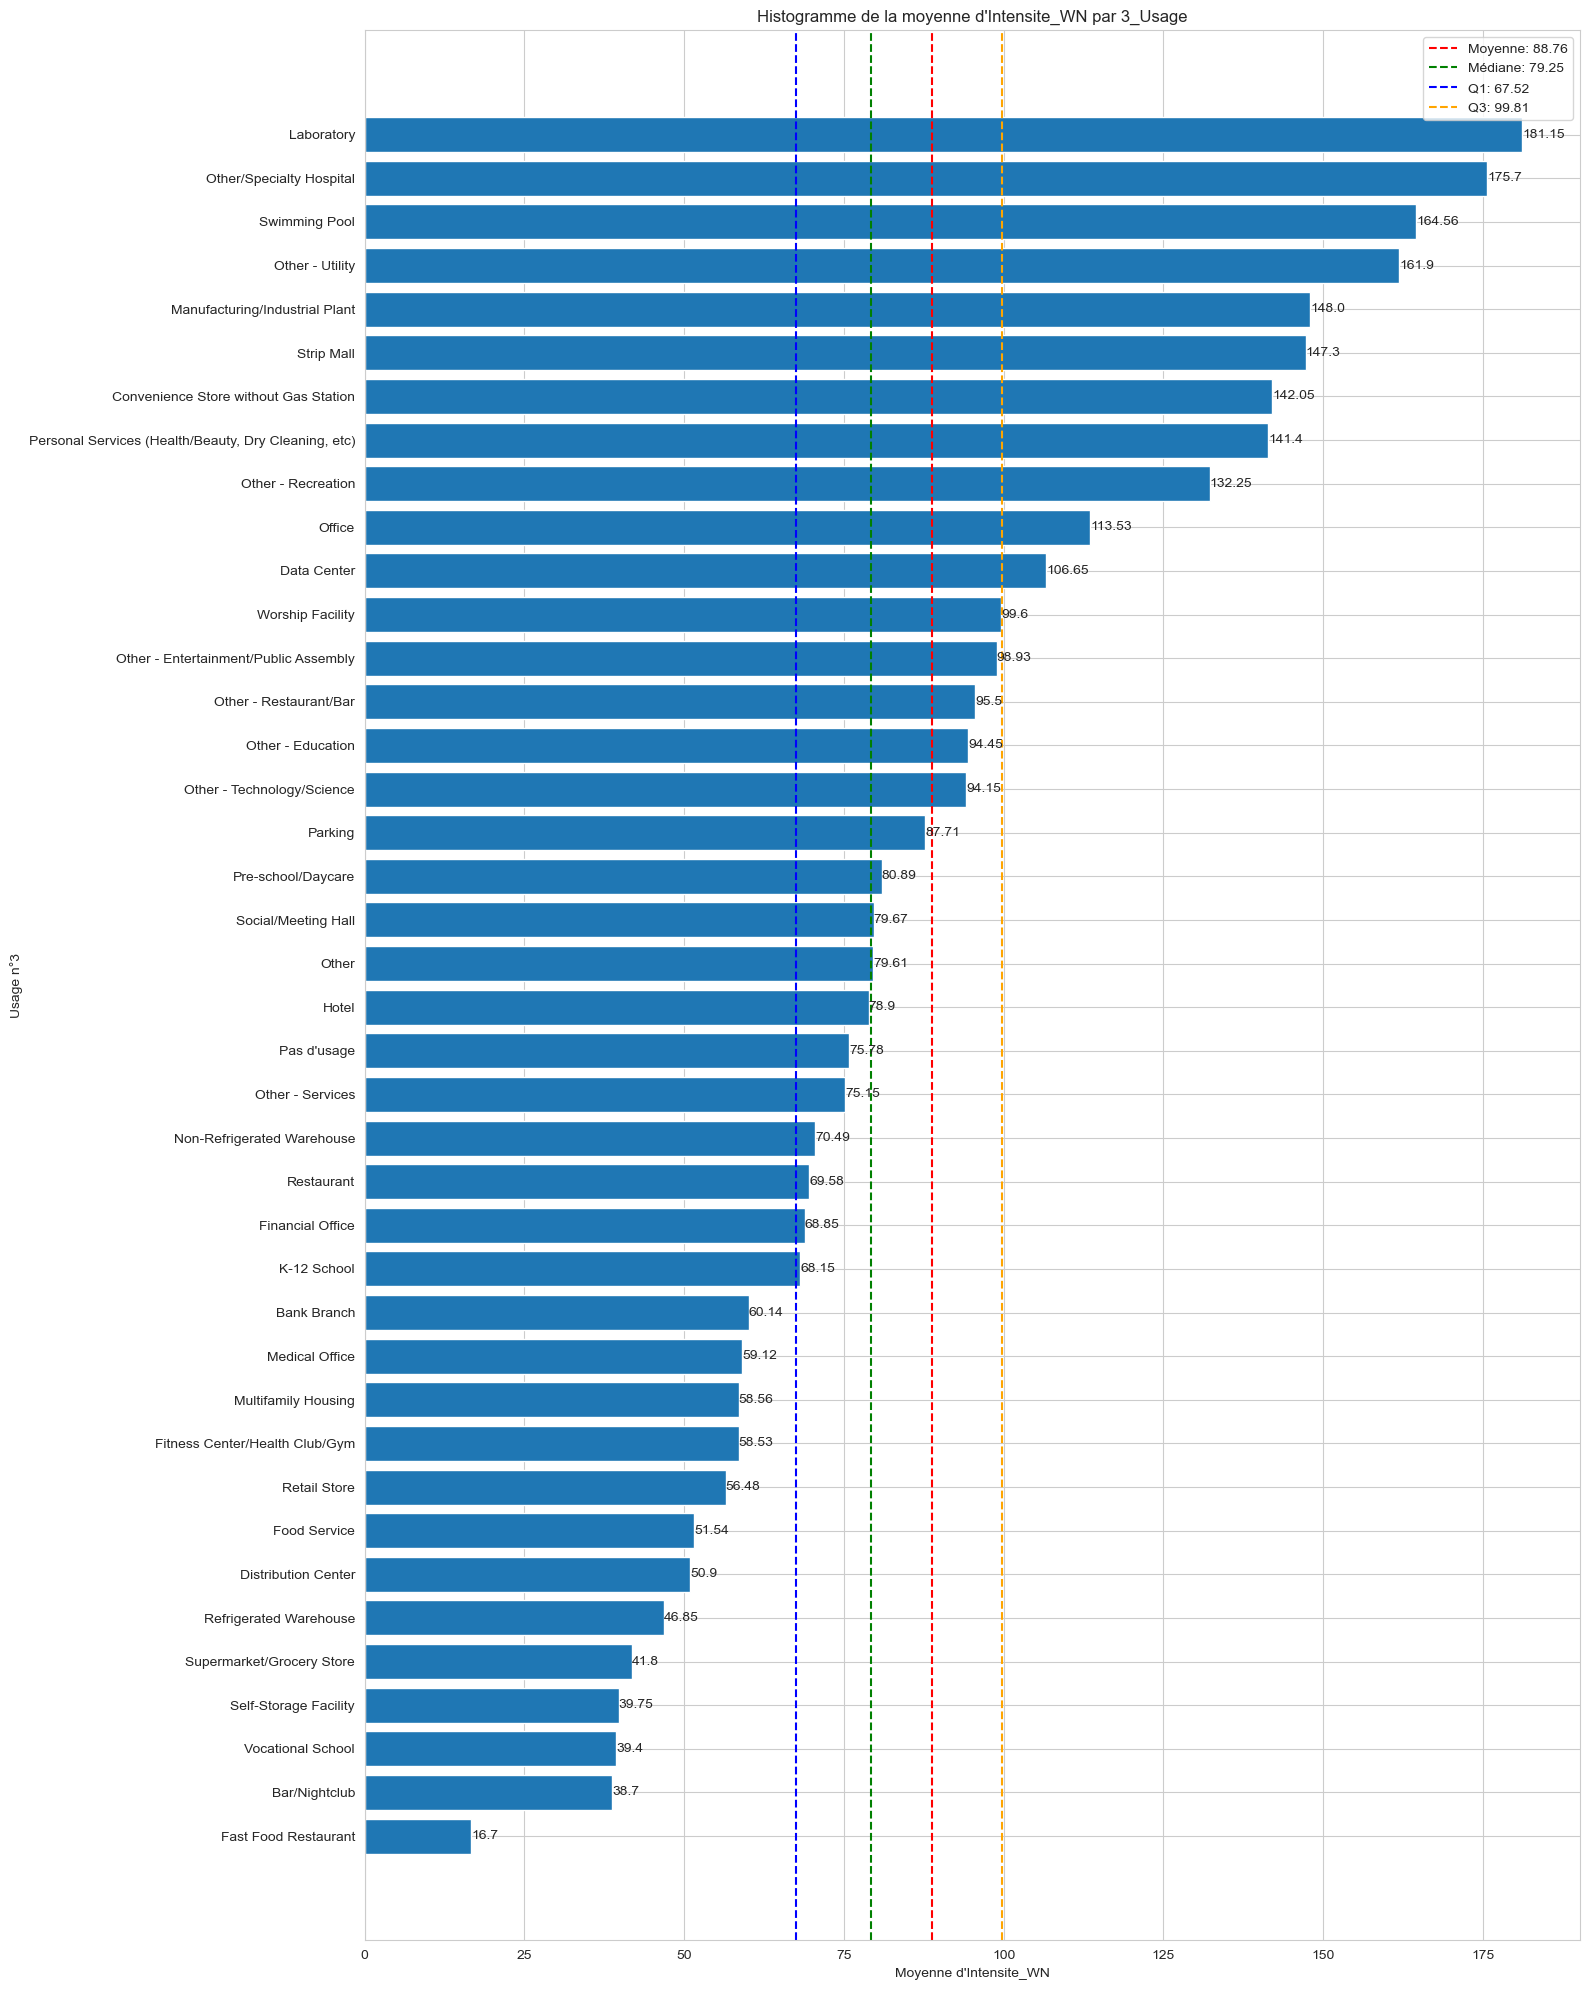

In [328]:
# Calculer la moyenne d'Intensite_WN par 3_Usage
mean_intensity_by_usage = df_cat.groupby('3_Usage')['Intensite_WN'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_WN par 3_Usage
median_intensity_by_usage = df_cat.groupby('3_Usage')['Intensite_WN'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_WN par 3_Usage
q1_intensity_by_usage = df_cat.groupby('3_Usage')['Intensite_WN'].quantile(0.25)
q3_intensity_by_usage = df_cat.groupby('3_Usage')['Intensite_WN'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°3')
plt.xlabel('Moyenne d\'Intensite_WN')
plt.title('Histogramme de la moyenne d\'Intensite_WN par 3_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [51]:
# Calculer la moyenne par catégorie pour la variable 3_Usage
category_mean_3 = df_cat.groupby('3_Usage')['Intensite_WN'].mean()

# Fonction pour déterminer si une catégorie doit être renommée en "Other" pour la variable 3_Usage
def categorize_usage_3(row):
    usage_category_3 = row['3_Usage']
    if usage_category_3 not in unique_categories_conso:
        return 'Other'
    elif usage_category_3 in category_mean_3.index:
        if 50 <= category_mean_3[usage_category_3] <= 140:
            return 'Other'
        else:
            return usage_category_3
    else:
        return 'Other'

# Appliquer la fonction pour créer une nouvelle colonne 'NewCatUsage3' en utilisant .loc
df_cat['NewCatUsage3'] = df_cat.apply(categorize_usage_3, axis=1)

# Afficher les valeurs uniques de la colonne 'NewCatUsage3'
unique_categories_conso_3 = df_cat['NewCatUsage3'].unique()
print(unique_categories_conso_3)
print(len(unique_categories_conso_3))


['Other' 'Other - Utility' 'Laboratory' 'Self-Storage Facility'
 'Supermarket/Grocery Store']
5


In [52]:
print(df_cat['NewCatUsage1'].unique())

['Other' 'Police Station' 'Self-Storage Facility' 'Museum'
 'Other/Specialty Hospital' 'Hospital (General Medical & Surgical)'
 'Non-Refrigerated Warehouse' 'Distribution Center' 'Worship Facility'
 'Restaurant' 'Data Center' 'Parking' 'Laboratory'
 'Supermarket/Grocery Store' 'Urgent Care/Clinic/Other Outpatient'
 'Other - Recreation' 'Performing Arts' 'Other - Restaurant/Bar'
 'Food Service' 'Other - Utility' 'Pre-school/Daycare']


In [53]:
print(df_cat['NewCatUsage2'].unique())

['Other' 'Non-Refrigerated Warehouse' 'Data Center' 'Laboratory'
 'Worship Facility' 'Food Service' 'Pre-school/Daycare'
 'Hospital (General Medical & Surgical)']


In [54]:
print(df_cat['NewCatUsage3'].unique())

['Other' 'Other - Utility' 'Laboratory' 'Self-Storage Facility'
 'Supermarket/Grocery Store']


### D. L'intensité et le principal usage des bâtiments

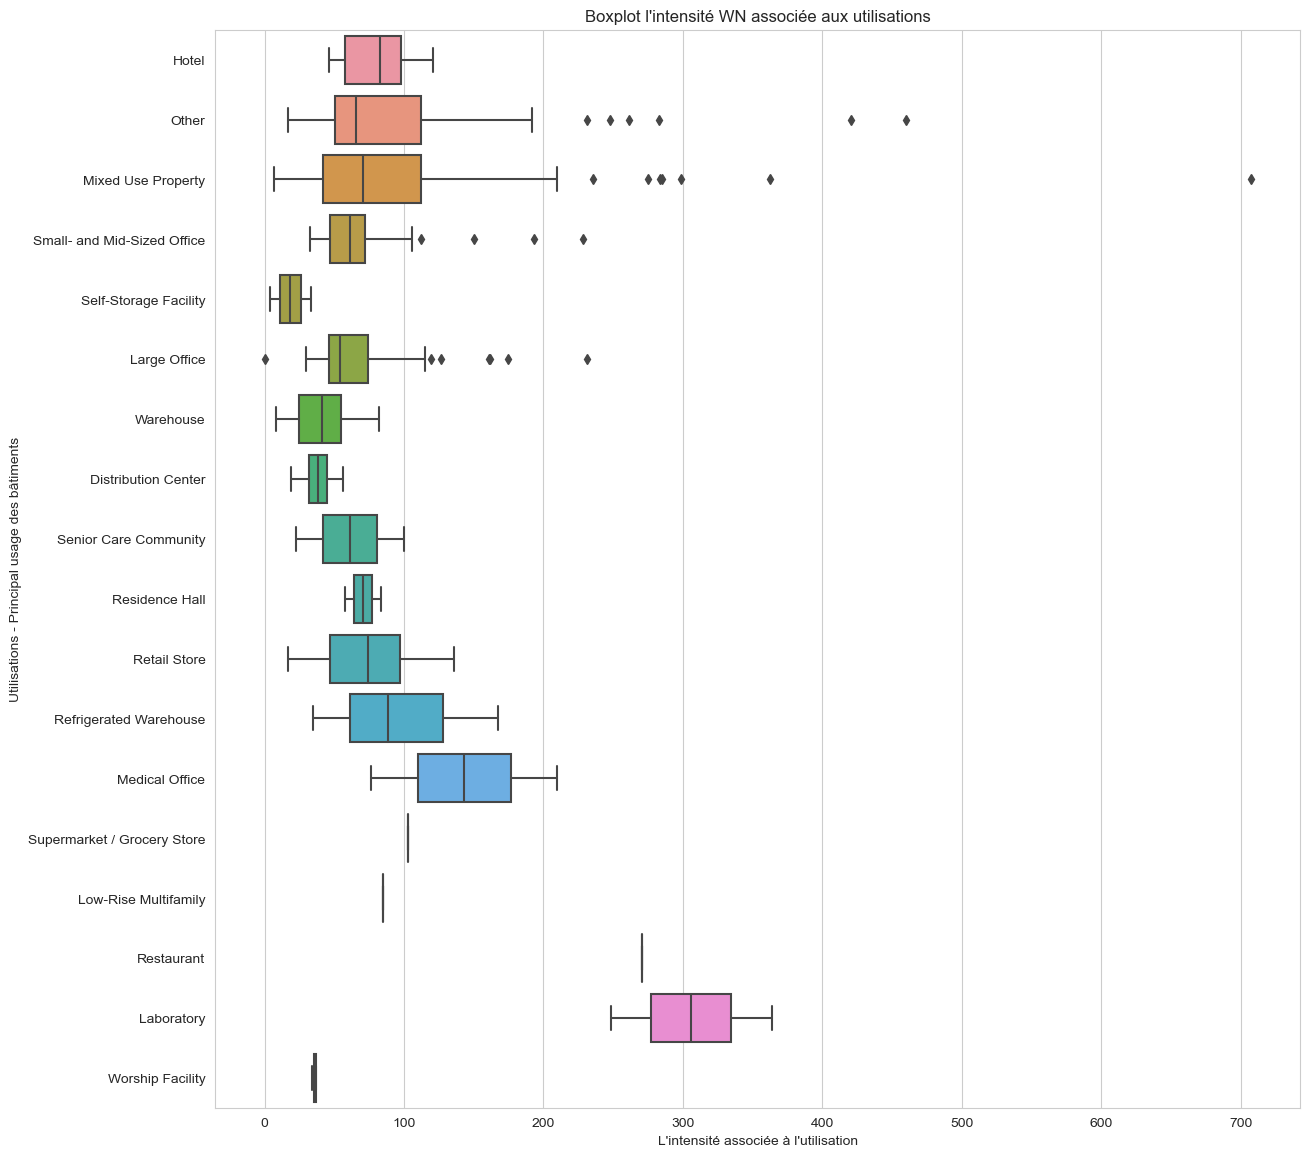

In [333]:
# Créer le boxplot avec Seaborn
plt.figure(figsize=(14, 14))
sns.boxplot(x='Intensite_WN', y='PrincipalUsage', data=df_clean)

# Afficher le graphique
plt.title('Boxplot l\'intensité WN associée aux utilisations')
plt.xlabel('L\'intensité associée à l\'utilisation')
plt.ylabel('Utilisations - Principal usage des bâtiments')
plt.show()

In [334]:
# Calculer la moyenne de 'Intensite_WN' selon les catégories '3_Usage'
mean_intensity_by_usage = df_cat.groupby('PrincipalUsage')['Intensite_WN'].mean()

# Calculer la médiane de 'Intensite_WN' selon les catégories '3_Usage'
median_intensity_by_usage = df_cat.groupby('PrincipalUsage')['Intensite_WN'].median()

# Compter le nombre de valeurs selon les catégories '3_Usage'
count_by_usage = df_cat['PrincipalUsage'].value_counts()

# Calculer le poids de chaque catégorie par rapport au total des valeurs en pourcentage
weight_by_usage_percent = (count_by_usage / len(df_clean)) * 100

# Créer un DataFrame pour stocker les résultats
usage_stats_df = pd.DataFrame({
    'Moyenne Intensite_WN': mean_intensity_by_usage,
    'Médiane Intensite_WN': median_intensity_by_usage,
    'Nombre de valeurs': count_by_usage,
    'Poids par rapport au total (%)': weight_by_usage_percent
})

# Classer les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
usage_stats_df = usage_stats_df.sort_values(by='Moyenne Intensite_WN', ascending=False)

# Afficher le DataFrame
print("Statistiques par catégorie selon le principal usage du bâtiment' :")
usage_stats_df


Statistiques par catégorie selon le principal usage du bâtiment' :


Moyenne Intensite_WN  Médiane Intensite_WN  \
PrincipalUsage                                                            
Laboratory                             305.900001            305.900001   
Restaurant                             270.600006            270.600006   
Medical Office                         143.150002            143.150002   
Other                                  116.483871             65.800003   
Supermarket / Grocery Store            103.000000            103.000000   
Mixed Use Property                      96.890589             70.300003   
Refrigerated Warehouse                  96.799998             88.500000   
Low-Rise Multifamily                    85.199997             85.199997   
Hotel                                   81.453846             82.800003   
Retail Store                            74.533335             74.000000   
Residence Hall                          70.650000             70.650000   
Small- and Mid-Sized Office             69.755000             61.250000   
Large Office                            65.831646             53.900002   
Senior Care Community                   61.150000             61.150000   
Warehouse                               41.127778             41.450001   
Distribution Center                     37.362500             38.550001   
Worship Facility                        35.933333             36.299999   
Self-Storage Facility                   18.549999             18.549999   

                             Nombre de valeurs  Poids par rapport au total (%)  
PrincipalUsage                                                                  
Laboratory                                   2                        0.662252  
Restaurant                                   1                        0.331126  
Medical Office                               2                        0.662252  
Other                                       31                       10.264901  
Supermarket / Grocery Store                  1                        0.331126  
Mixed Use Property                          85                       28.145695  
Refrigerated Warehouse                       3                        0.993377  
Low-Rise Multifamily                         1                        0.331126  
Hotel                                       13                        4.304636  
Retail Store                                 9                        2.980132  
Residence Hall                               2                        0.662252  
Small- and Mid-Sized Office                 40                       13.245033  
Large Office                                79                       26.158940  
Senior Care Community                        2                        0.662252  
Warehouse                                   18                        5.960265  
Distribution Center                          8                        2.649007  
Worship Facility                             3                        0.993377  
Self-Storage Facility                        2                        0.662252

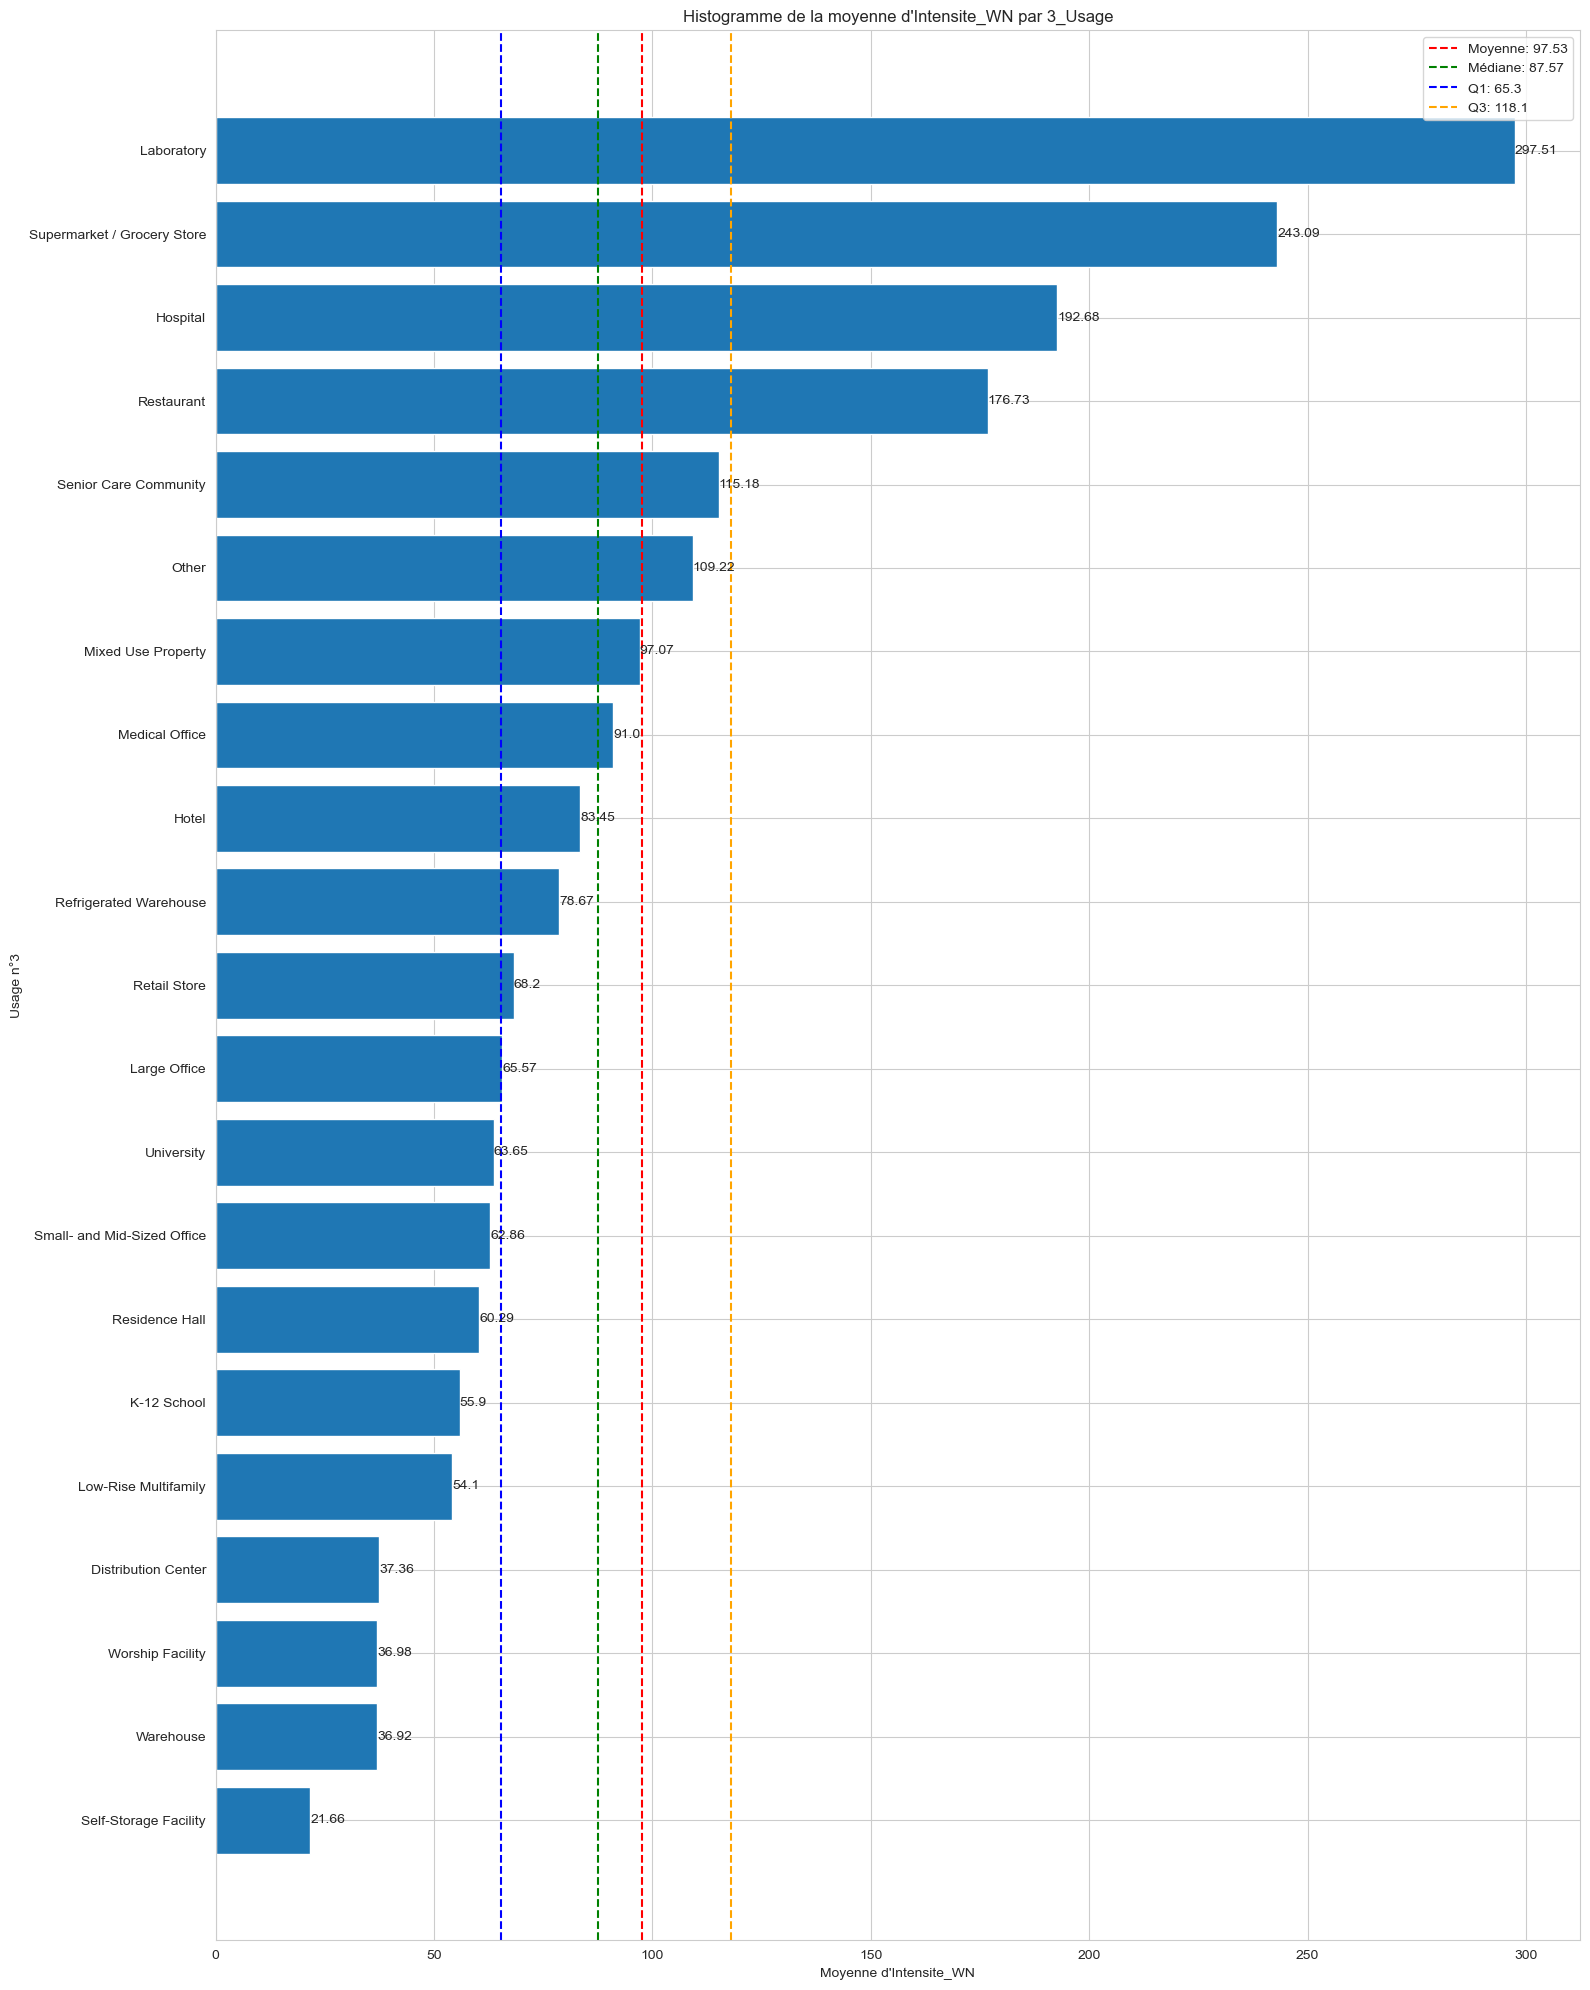

In [335]:
# Calculer la moyenne d'Intensite_WN par 3_Usage
mean_intensity_by_usage = df_cat.groupby('PrincipalUsage')['Intensite_WN'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_WN'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_WN par Princiapl_Usage
median_intensity_by_usage = df_cat.groupby('PrincipalUsage')['Intensite_WN'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_WN par 3_Usage
q1_intensity_by_usage = df_cat.groupby('PrincipalUsage')['Intensite_WN'].quantile(0.25)
q3_intensity_by_usage = df_cat.groupby('PrincipalUsage')['Intensite_WN'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°3')
plt.xlabel('Moyenne d\'Intensite_WN')
plt.title('Histogramme de la moyenne d\'Intensite_WN par 3_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## 5. Analyse focalisée sur l'association entre l'intensité des émissions & leur utilisation

Nous allons procéder à la même analyse pour les émissions de CO2, avec la même logique et manière de procéder, pour les 3 niveaux d'usages.
Cependant, je ne vais que utiliser le diagramme à barres horizontales pour la dataviz qui permet de lire et repérer les types d'utilisation atypiques.

In [36]:
df_cat_CO2 = df_clean.copy()

In [37]:
df_cat_CO2.shape

(1382, 23)

### A. L'intensité des émissions et le 1ier usage des bâtiments

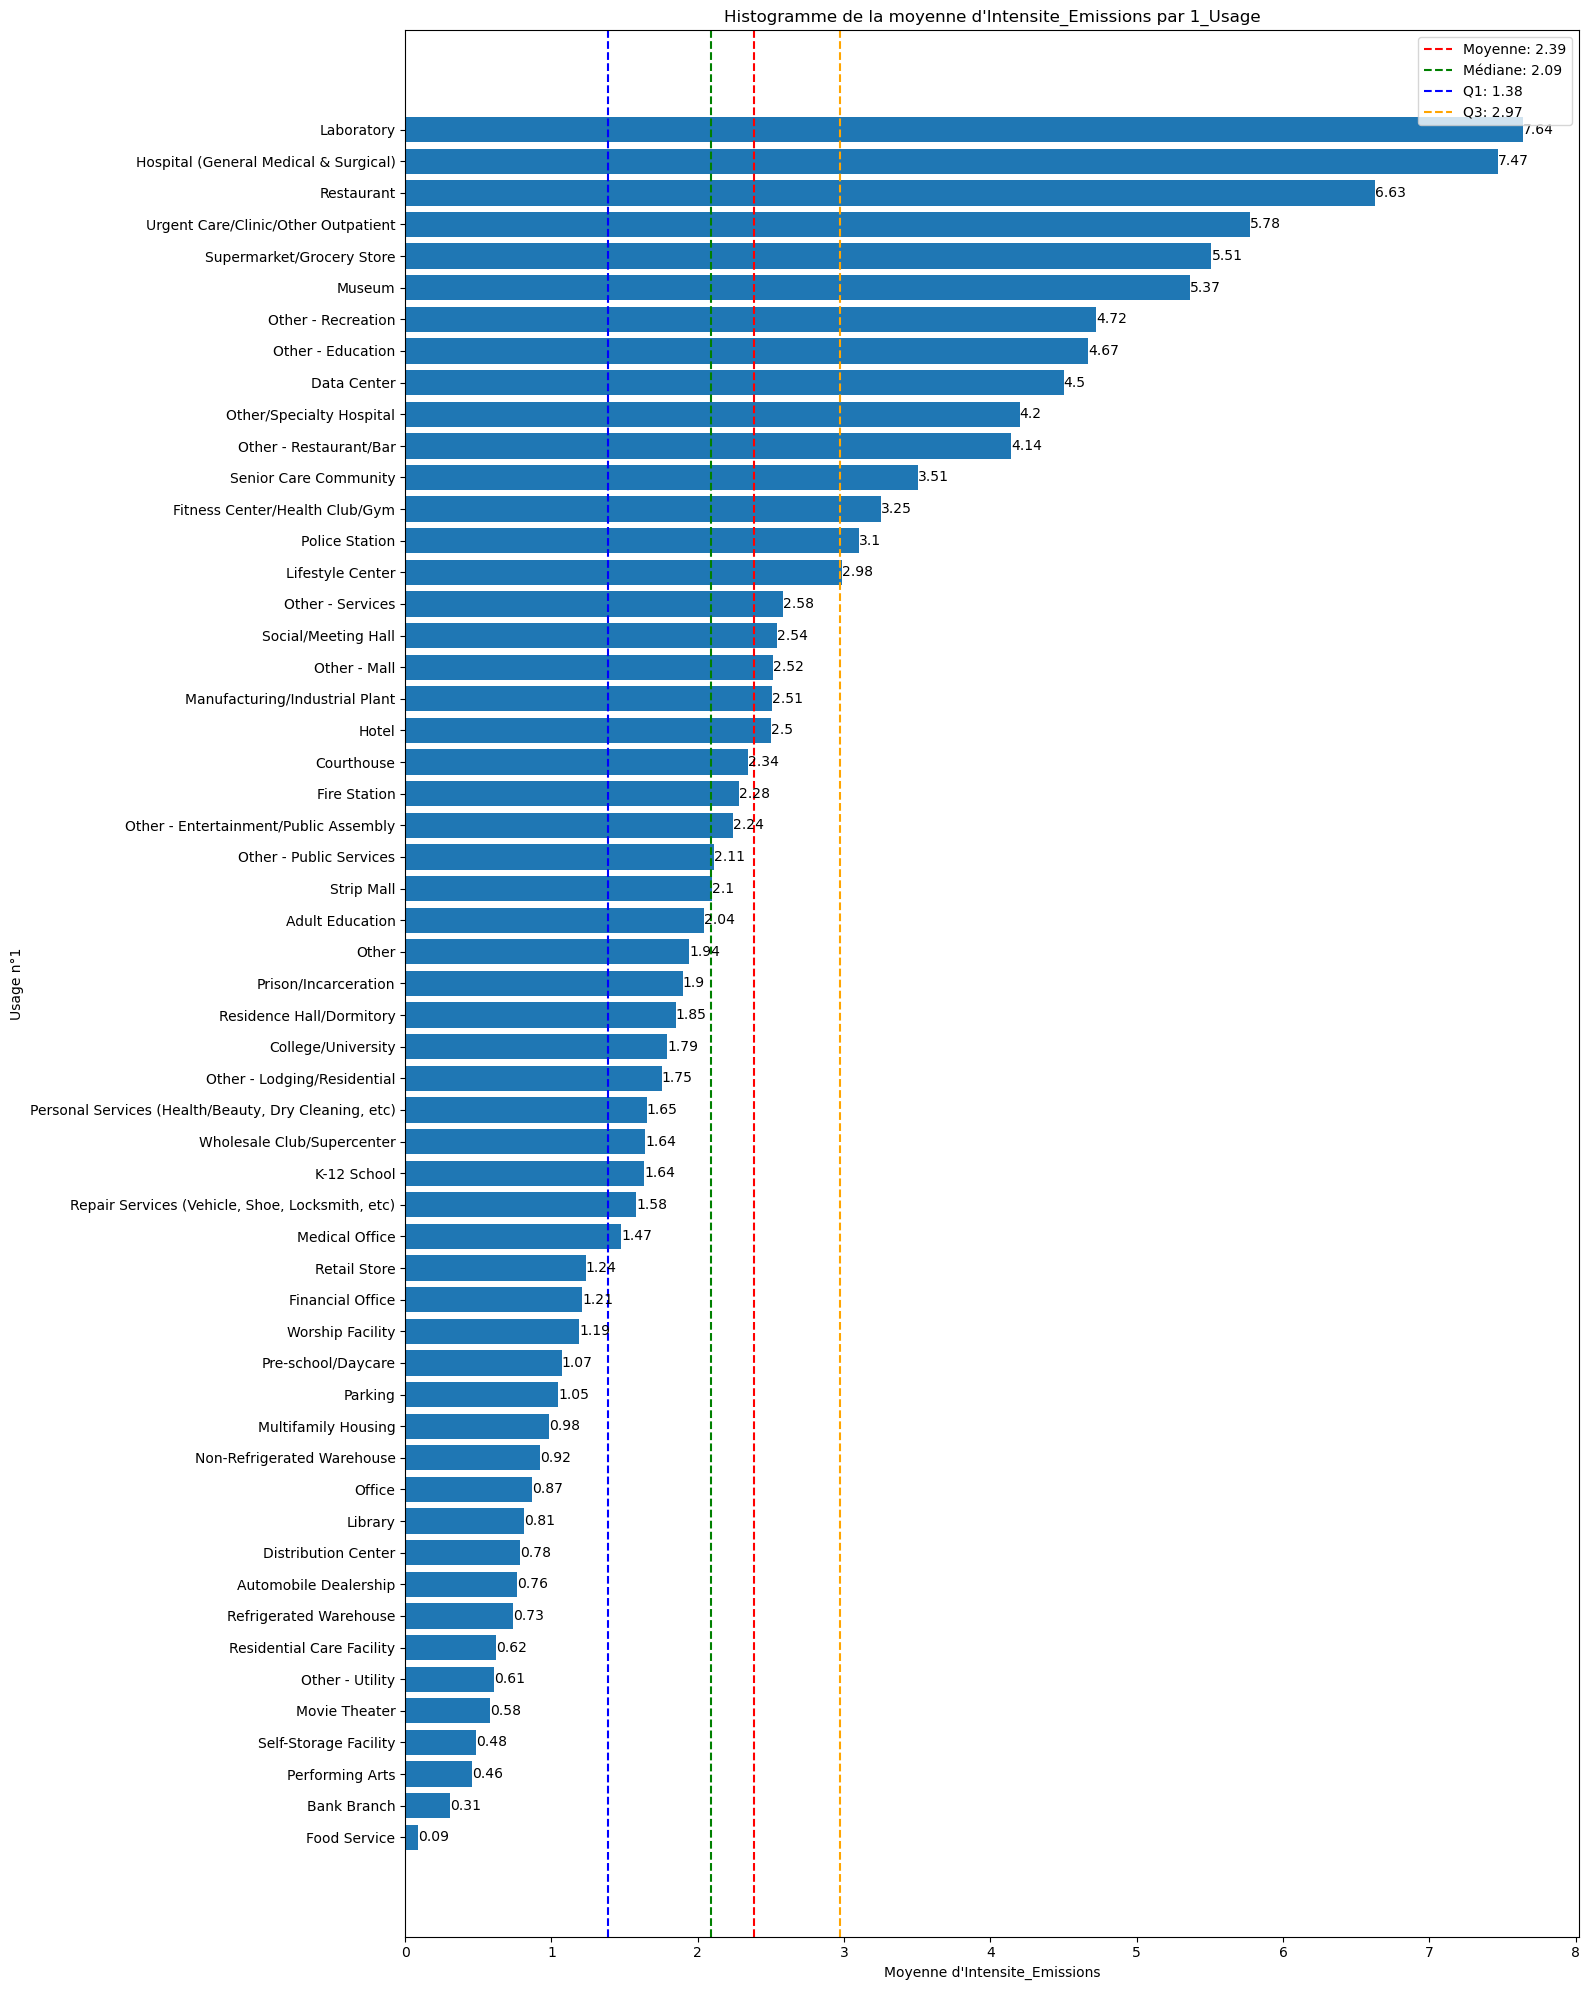

In [38]:
# Calculer la moyenne d'Intensite_CO2 par 1_Usage
mean_intensity_by_usage = df_cat_CO2.groupby('1_Usage')['Intensite_Emissions'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_CO2'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_CO2 par 1_Usage
median_intensity_by_usage = df_cat_CO2.groupby('1_Usage')['Intensite_Emissions'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_CO2 par 1_Usage
q1_intensity_by_usage = df_cat_CO2.groupby('1_Usage')['Intensite_Emissions'].quantile(0.25)
q3_intensity_by_usage = df_cat_CO2.groupby('1_Usage')['Intensite_Emissions'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°1')
plt.xlabel('Moyenne d\'Intensite_Emissions')
plt.title('Histogramme de la moyenne d\'Intensite_Emissions par 1_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [39]:
# Calculer la moyenne par catégorie
category_mean_CO2 = df_cat_CO2.groupby('1_Usage')['Intensite_Emissions'].mean()

# Fonction pour déterminer si une catégorie doit être renommée en "Other"
def categorize_usage_CO2(row):
    if 0.6 <= category_mean_CO2[row['1_Usage']] <= 4:
        return 'Other'
    else:
        return row['1_Usage']

# Appliquer la fonction pour créer une nouvelle colonne 'Category' en utilisant .loc
df_cat_CO2.loc[:, 'NewCatUsage1CO2'] = df_cat_CO2.apply(categorize_usage_CO2, axis=1)

# Afficher les valeurs uniques de la colonne 'Category'
unique_categories_CO2 = df_cat_CO2['NewCatUsage1CO2'].unique()
print(unique_categories_CO2)
print(len(unique_categories_CO2))

['Other' 'Self-Storage Facility' 'Museum' 'Other/Specialty Hospital'
 'Hospital (General Medical & Surgical)' 'Restaurant' 'Data Center'
 'Laboratory' 'Supermarket/Grocery Store'
 'Urgent Care/Clinic/Other Outpatient' 'Other - Recreation'
 'Performing Arts' 'Bank Branch' 'Other - Education'
 'Other - Restaurant/Bar' 'Food Service' 'Movie Theater']
17


### B. L'intensité des émissions et le 2ier usage des bâtiments

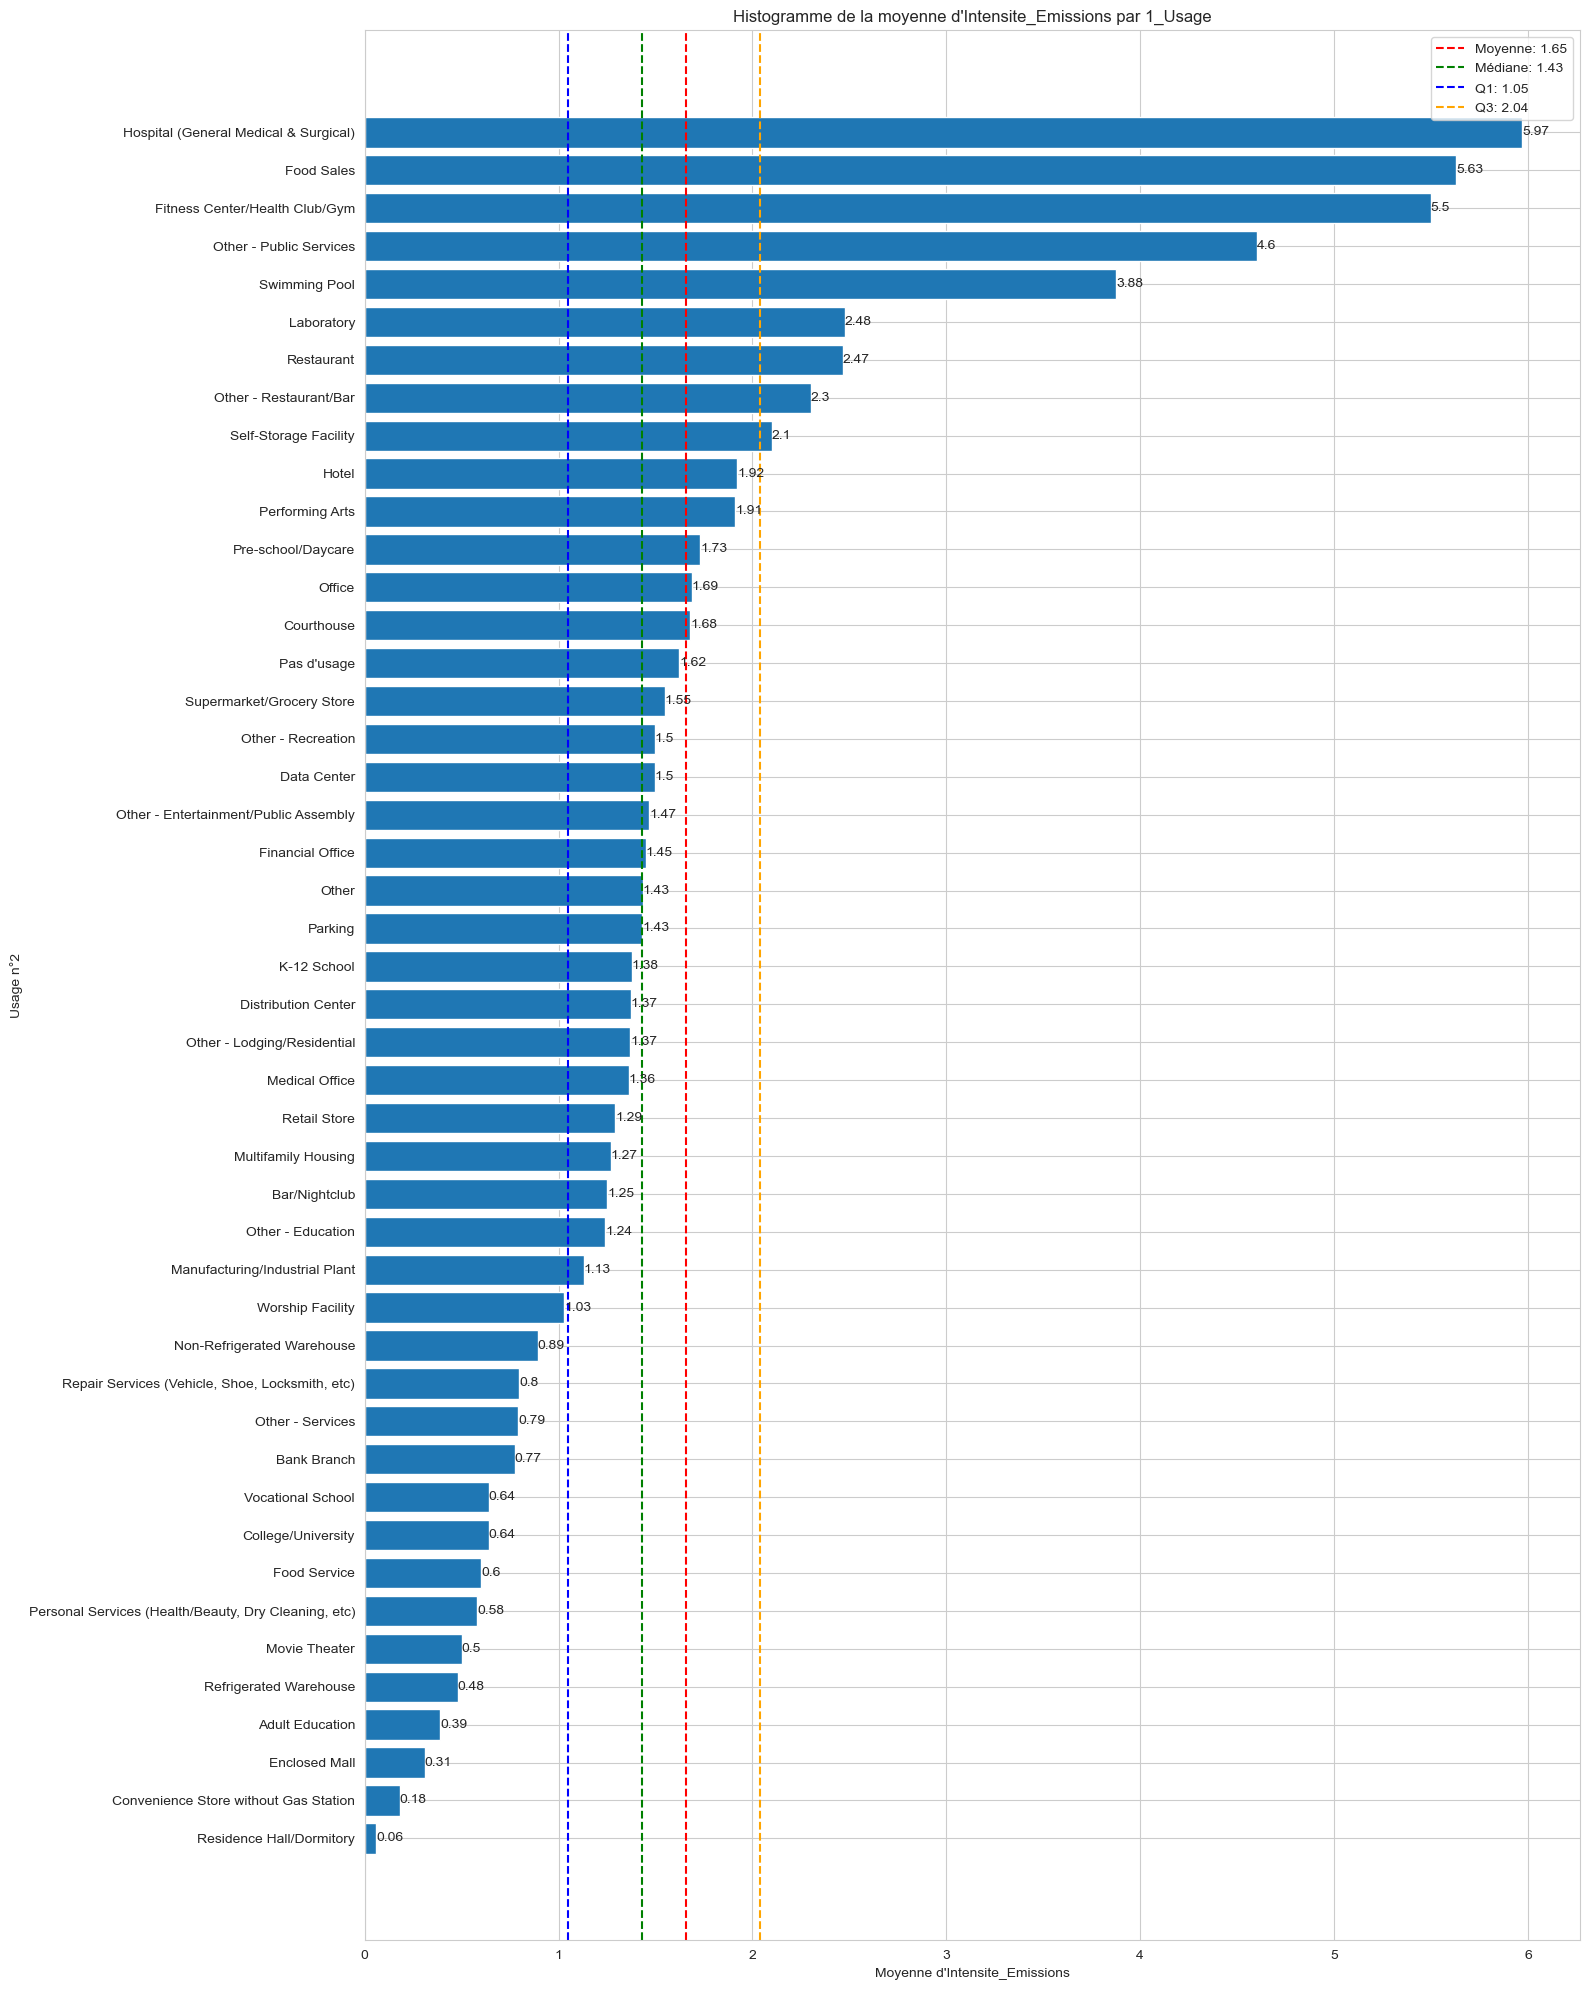

In [253]:
# Calculer la moyenne d'Intensite_CO2 par 1_Usage
mean_intensity_by_usage = df_cat_CO2.groupby('2_Usage')['Intensite_Emissions'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_CO2'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_CO2 par 1_Usage
median_intensity_by_usage = df_cat_CO2.groupby('2_Usage')['Intensite_Emissions'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_CO2 par 1_Usage
q1_intensity_by_usage = df_cat_CO2.groupby('2_Usage')['Intensite_Emissions'].quantile(0.25)
q3_intensity_by_usage = df_cat_CO2.groupby('2_Usage')['Intensite_Emissions'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°2')
plt.xlabel('Moyenne d\'Intensite_Emissions')
plt.title('Histogramme de la moyenne d\'Intensite_Emissions par 1_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [41]:
# Calculer la moyenne par catégorie
category_mean_2 = df_cat_CO2.groupby('2_Usage')['Intensite_Emissions'].mean()

# Fonction pour déterminer si une catégorie doit être renommée en "Other" pour la variable 2_Usage
def categorize_usage_2(row):
    usage_category_2 = row['2_Usage']
    if usage_category_2 not in unique_categories_CO2:
        return 'Other'
    elif usage_category_2 in category_mean_2.index:
        if 0.6 <= category_mean_2[usage_category_2] <= 4:
            return 'Other'
        else:
            return usage_category_2
    else:
        return 'Other'

# Appliquer la fonction pour créer une nouvelle colonne 'NewCatUsage2' en utilisant .loc
df_cat_CO2['NewCatUsage2CO2'] = df_cat_CO2.apply(categorize_usage_2, axis=1)

# Afficher les valeurs uniques de la colonne 'NewCatUsage2'
unique_categories_CO2_2 = df_cat_CO2['NewCatUsage2CO2'].unique()
print(unique_categories_CO2_2)
print(len(unique_categories_CO2_2))

['Other' 'Movie Theater' 'Hospital (General Medical & Surgical)']
3


### C. L'intensité des émissions et le 3ier usage des bâtiments

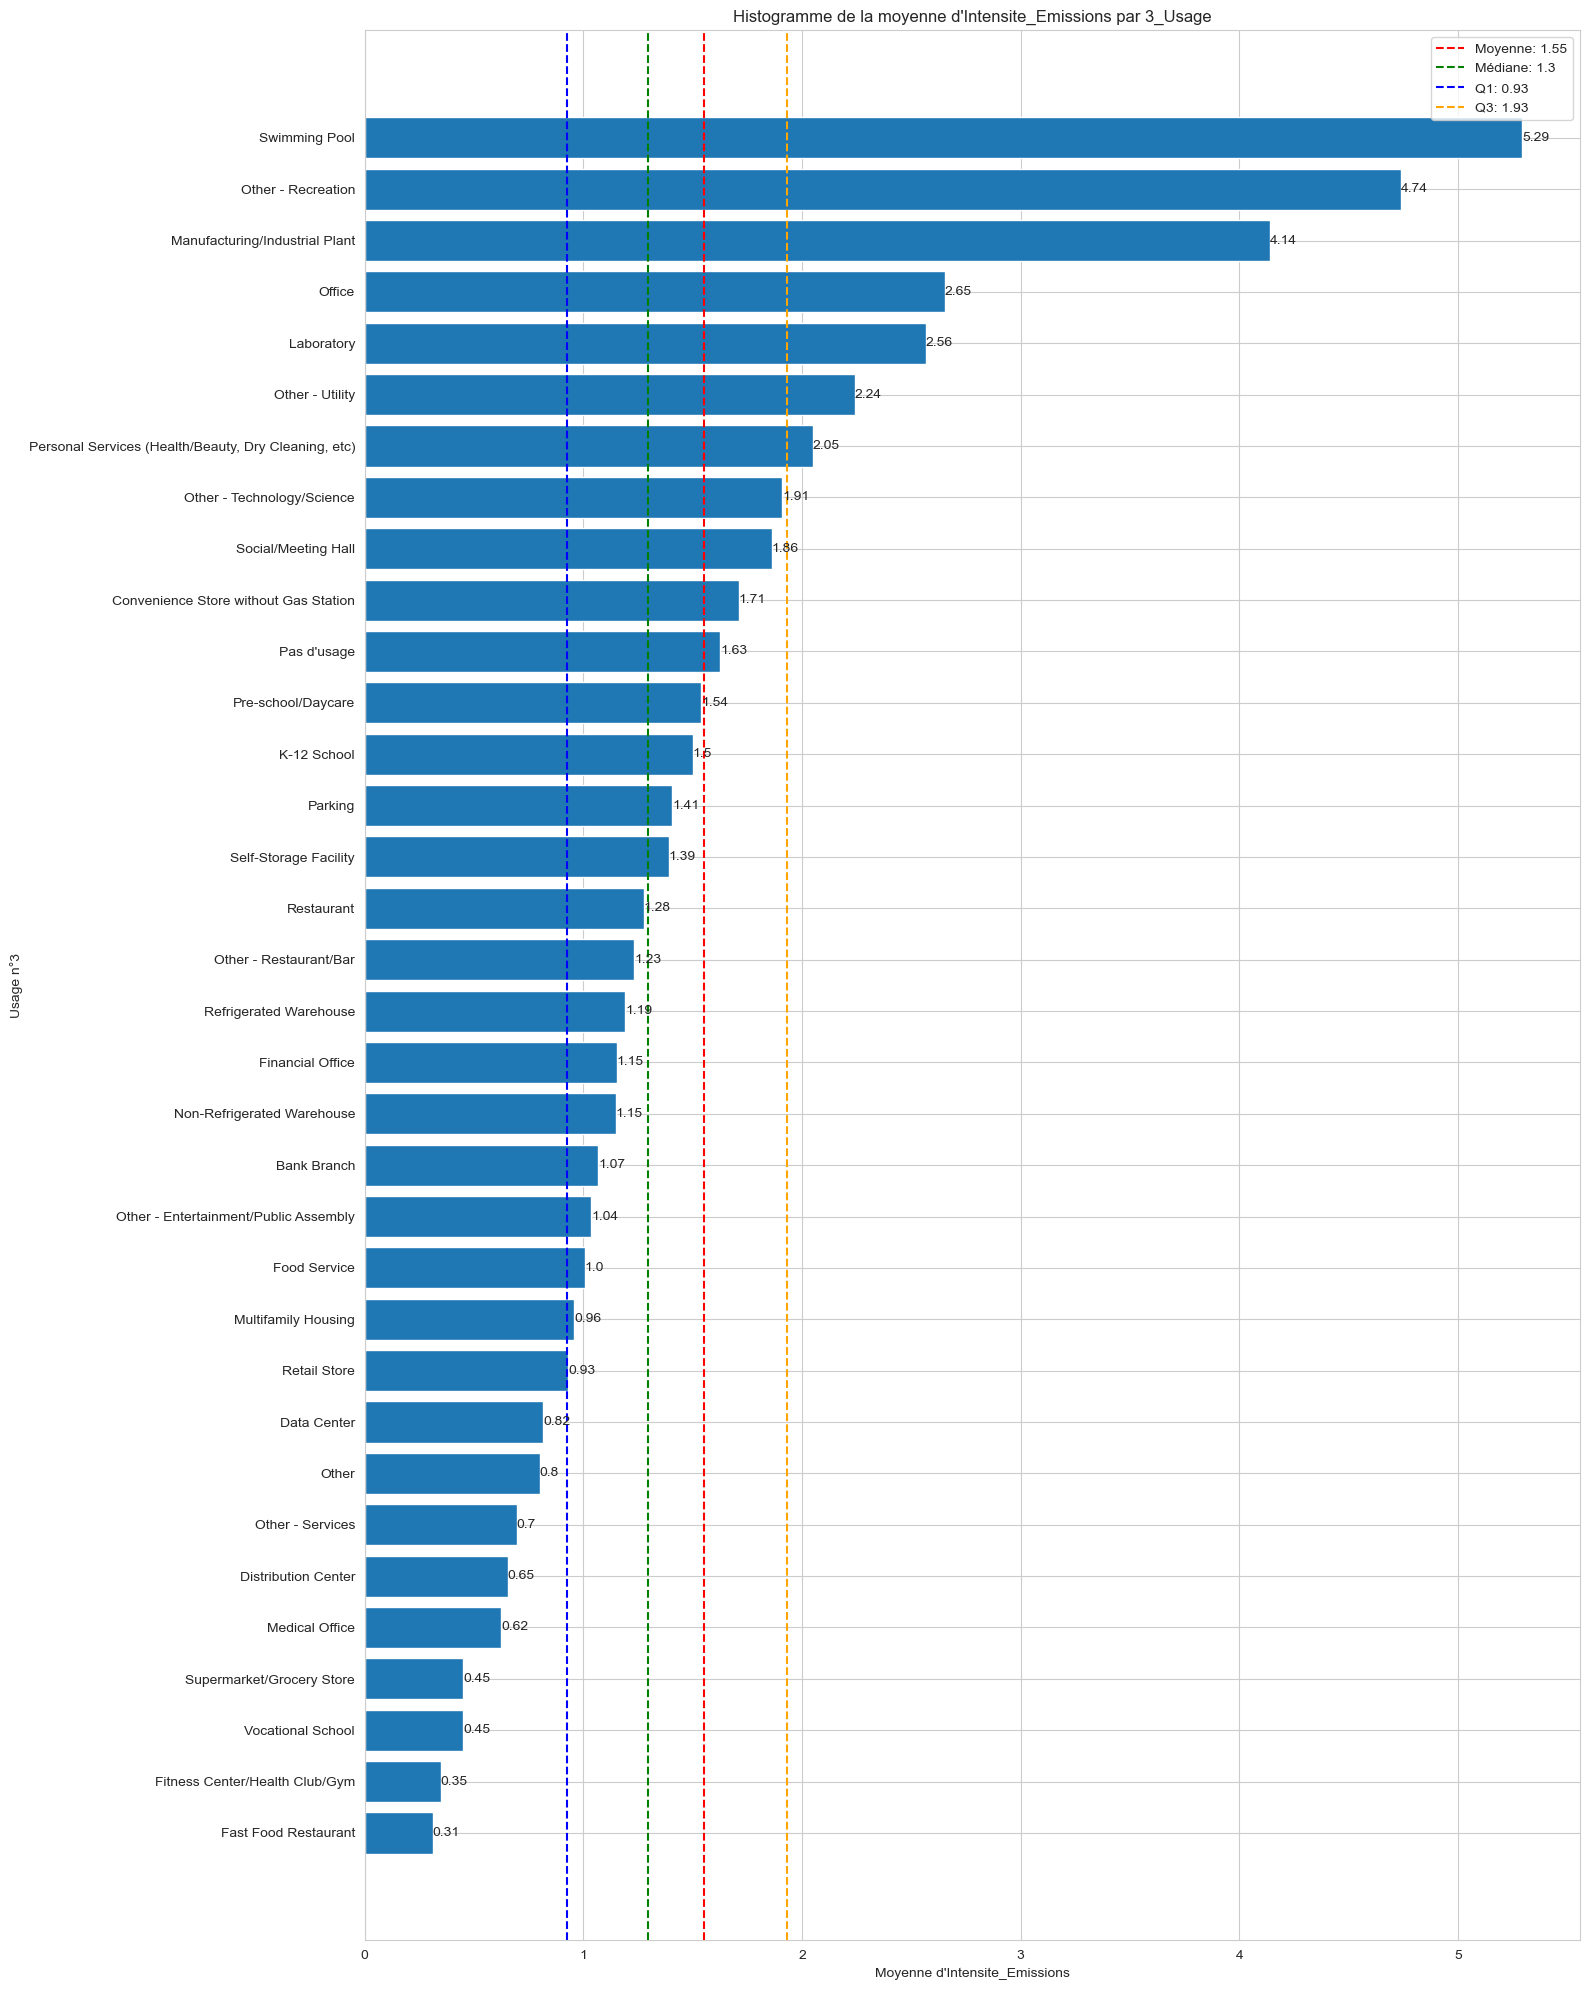

In [259]:
# Calculer la moyenne d'Intensite_CO2 par 1_Usage
mean_intensity_by_usage = df_cat_CO2.groupby('3_Usage')['Intensite_Emissions'].mean()

# Trier les valeurs dans l'ordre décroissant selon la moyenne de 'Intensite_CO2'
mean_intensity_by_usage = mean_intensity_by_usage.sort_values(ascending=True)

# Calculer la médiane d'Intensite_CO2 par 1_Usage
median_intensity_by_usage = df_cat_CO2.groupby('3_Usage')['Intensite_Emissions'].median()

# Calculer les quartiles Q1 et Q3 d'Intensite_CO2 par 1_Usage
q1_intensity_by_usage = df_cat_CO2.groupby('3_Usage')['Intensite_Emissions'].quantile(0.25)
q3_intensity_by_usage = df_cat_CO2.groupby('3_Usage')['Intensite_Emissions'].quantile(0.75)

# Tracer l'histogramme avec les axes inversés
plt.figure(figsize=(16, 20))  # Inverser les dimensions pour s'adapter aux axes inversés
bars = plt.barh(mean_intensity_by_usage.index, mean_intensity_by_usage.values)

# Ajouter une ligne pour la moyenne
plt.axvline(x=mean_intensity_by_usage.mean(), color='r', linestyle='--', label=f"Moyenne: {round(mean_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour la médiane
plt.axvline(x=median_intensity_by_usage.mean(), color='g', linestyle='--', label=f"Médiane: {round(median_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q1
plt.axvline(x=q1_intensity_by_usage.mean(), color='b', linestyle='--', label=f"Q1: {round(q1_intensity_by_usage.mean(), 2)}")

# Ajouter une ligne pour le quartile Q3
plt.axvline(x=q3_intensity_by_usage.mean(), color='orange', linestyle='--', label=f"Q3: {round(q3_intensity_by_usage.mean(), 2)}")

# Ajouter des étiquettes pour les valeurs des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2),
             ha='left', va='center')

# Définir les labels des axes et le titre
plt.ylabel('Usage n°3')
plt.xlabel('Moyenne d\'Intensite_Emissions')
plt.title('Histogramme de la moyenne d\'Intensite_Emissions par 3_Usage')

# Afficher les étiquettes des lignes de référence
plt.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [42]:
# Calculer la moyenne par catégorie pour la variable 3_Usage
category_mean_3 = df_cat_CO2.groupby('3_Usage')['Intensite_Emissions'].mean()

# Fonction pour déterminer si une catégorie doit être renommée en "Other" pour la variable 3_Usage
def categorize_usage_3(row):
    usage_category_3 = row['3_Usage']
    if usage_category_3 not in unique_categories_CO2:
        return 'Other'
    elif usage_category_3 in category_mean_3.index:
        if 0.6 <= category_mean_3[usage_category_3] <= 4:
            return 'Other'
        else:
            return usage_category_3
    else:
        return 'Other'

# Appliquer la fonction pour créer une nouvelle colonne 'NewCatUsage3' en utilisant .loc
df_cat_CO2['NewCatUsage3CO2'] = df_cat_CO2.apply(categorize_usage_3, axis=1)

# Afficher les valeurs uniques de la colonne 'NewCatUsage3'
unique_categories_CO2_3 = df_cat_CO2['NewCatUsage3CO2'].unique()
print(unique_categories_CO2_3)
print(len(unique_categories_CO2_3))


['Other' 'Other - Recreation' 'Supermarket/Grocery Store']
3


In [43]:
print(df_cat_CO2['NewCatUsage1CO2'].unique())

['Other' 'Self-Storage Facility' 'Museum' 'Other/Specialty Hospital'
 'Hospital (General Medical & Surgical)' 'Restaurant' 'Data Center'
 'Laboratory' 'Supermarket/Grocery Store'
 'Urgent Care/Clinic/Other Outpatient' 'Other - Recreation'
 'Performing Arts' 'Bank Branch' 'Other - Education'
 'Other - Restaurant/Bar' 'Food Service' 'Movie Theater']


In [44]:
print(df_cat_CO2['NewCatUsage2CO2'].unique())

['Other' 'Movie Theater' 'Hospital (General Medical & Surgical)']


In [45]:
print(df_cat_CO2['NewCatUsage3CO2'].unique())

['Other' 'Other - Recreation' 'Supermarket/Grocery Store']


# IV. Analyse exploratoire avec l'ACP de SkLearn (non-utilisée dans l'étude)

1. Préparation des données pour l'ACP

In [42]:
# Stocker les features pour notre analyse
cols = ['Intensite_WN',
    'Intensite_source_WN', 
    'Conso_Totale_WN', 
    'Conso_GazNat_kBtu_WN', 
    'Conso_Vapeur_kBtu_WN',
    'Conso_Elec_kBtu_WN'
]

In [43]:
# Création d'un dataframe df pour l'analyse
df_acp = df_clean[cols]
X = df_acp.values

In [44]:
# Création et distinction entre les variables quantitatives et qualitatives
names = df['PrincipalUsage']
features = cols

2. Centrer & réduire les données

In [45]:
# Scaler les données en utilisation la fonction de sklearn 'StandardScaler'
scaler = StandardScaler()

In [46]:
# Adapter le scaler aux données pour calculer la moyenne et l'écart-type
scaler.fit(X)

# Transformer les données originales en utilisant la moyenne et l'écart-type calculés
X_scaled = scaler.transform(X)

# Vérification que nos moyennes sont égales à 0 et nos écart-type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean -0.0  0.0 -0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

3. Application de la ACP / PCA

In [47]:
# Sélection du nombre de composantes
n_components = 4

# Instanciation de l'ACP
pca = PCA(n_components=n_components)

# Entrainement sur les données "X"
pca.fit(X_scaled)

PCA(n_components=4)

4. Etude de la variance captée par les différentes composantes

In [48]:
# Création d'une variable pour visualiser la valeur de la variance stockée par chacune des composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round(2)

# Afficher les valeurs correspondantes
print(scree)
print(scree.cumsum().round(2))
print('Cumul:',sum(scree))

[47.66 29.17 14.65  7.7 ]
[47.66 76.83 91.48 99.18]
Cumul: 99.18


In [49]:
# Définir une variable pour stocker nos composantes
x_list = range(1, n_components+1)

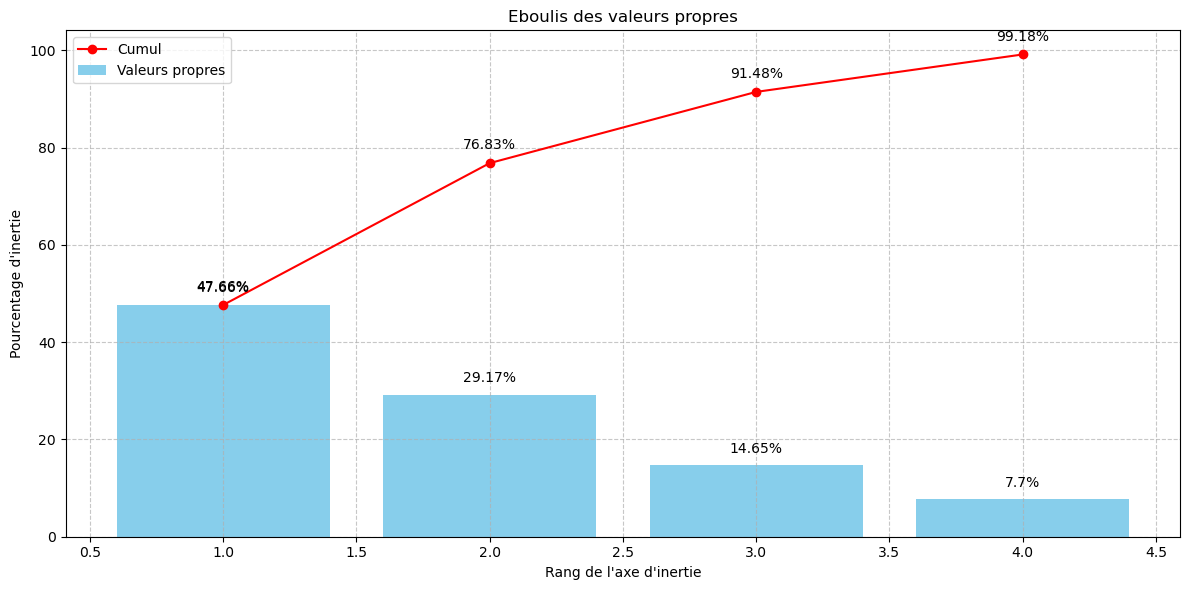

In [50]:
# Graphiques des éboulies des valeurs propres
# Création d'un graphique pour afficher et illustrer ces résultats

plt.figure(figsize=(12, 6))

plt.bar(x_list, scree, color='skyblue', label='Valeurs propres')
plt.plot(x_list, scree_cum, c="red", marker='o', label='Cumul')

plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)

# Ajout des étiquettes de données
for i, value in enumerate(scree):
    plt.text(x_list[i], value + 2, f'{value}%', ha='center', va='bottom')

# Ajout d'annotations pour le cumul
for i, value in enumerate(scree_cum):
    plt.annotate(f'{value}%', (x_list[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

5. Analyse des composantes

Sous la forme d'un dataframe

In [51]:
# Stockage des données de nos composantes dans un dataframe
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.T

F1        F2        F3        F4
Intensite_WN          0.353427 -0.581111 -0.155635  0.127744
Intensite_source_WN   0.352039 -0.566822 -0.262492 -0.031633
Conso_Totale_WN       0.532977  0.294904  0.069421 -0.251294
Conso_GazNat_kBtu_WN  0.280836 -0.137531  0.899868  0.250156
Conso_Vapeur_kBtu_WN  0.360604  0.392076 -0.295553  0.781488
Conso_Elec_kBtu_WN    0.508124  0.285335 -0.070307 -0.496216

Sous la forme d'une 'HeatMap'

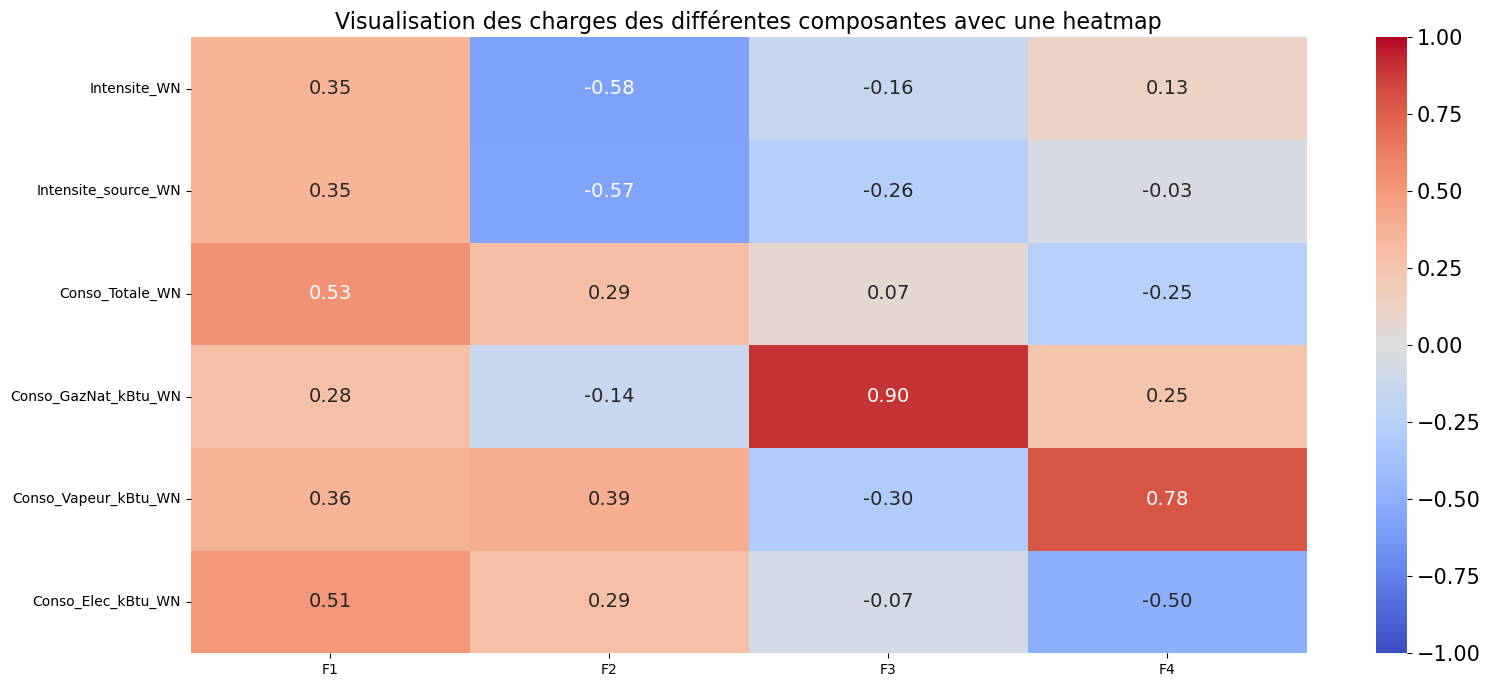

In [52]:
# Visualisation des données via une HeatMap de seaborn
fig, ax = plt.subplots(figsize=(18, 8))
heatmap = sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f", annot_kws={"size": 14})
heatmap.set_title("Visualisation des charges des différentes composantes avec une heatmap", fontsize=16)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

6. Etude des corrélations : 'Cercle des corrélations' F1 & F2

In [53]:
# Définir les axe x,y
x, y = 0,1

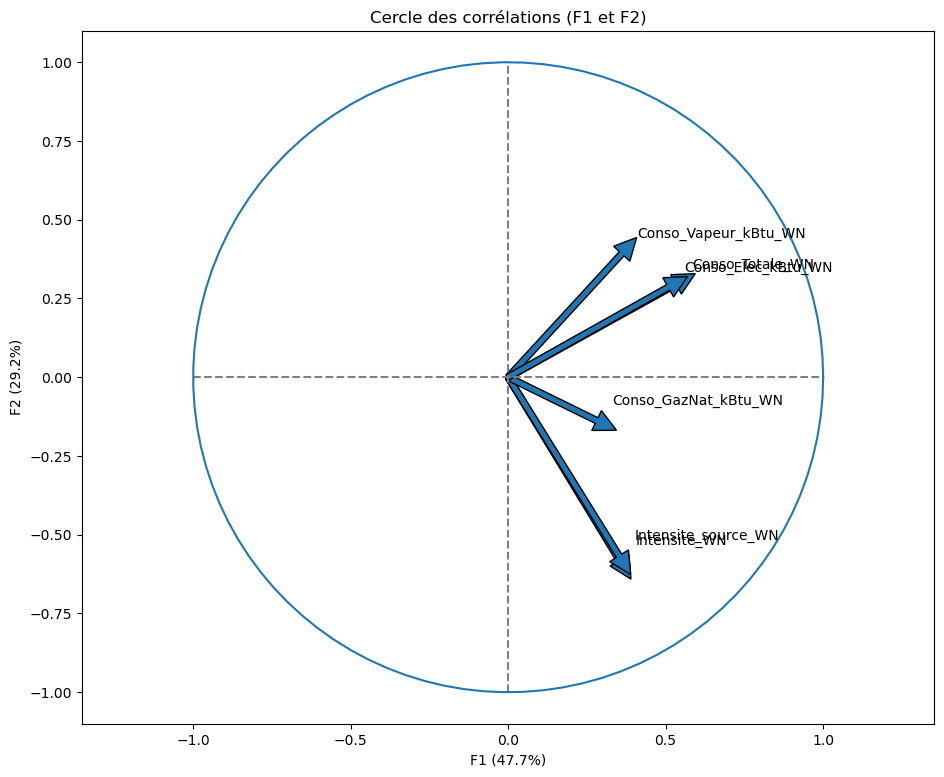

In [54]:
# Création du graphique pour le cercle des corrélations
fig, ax = plt.subplots(figsize=(11, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# Nom des axes, avec le pourcentage d'inertie expliquée
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

7. Projection des individus sur un plan factoriel

In [55]:
X_proj = pca.transform(X_scaled)

In [56]:
x_y = (0,1)

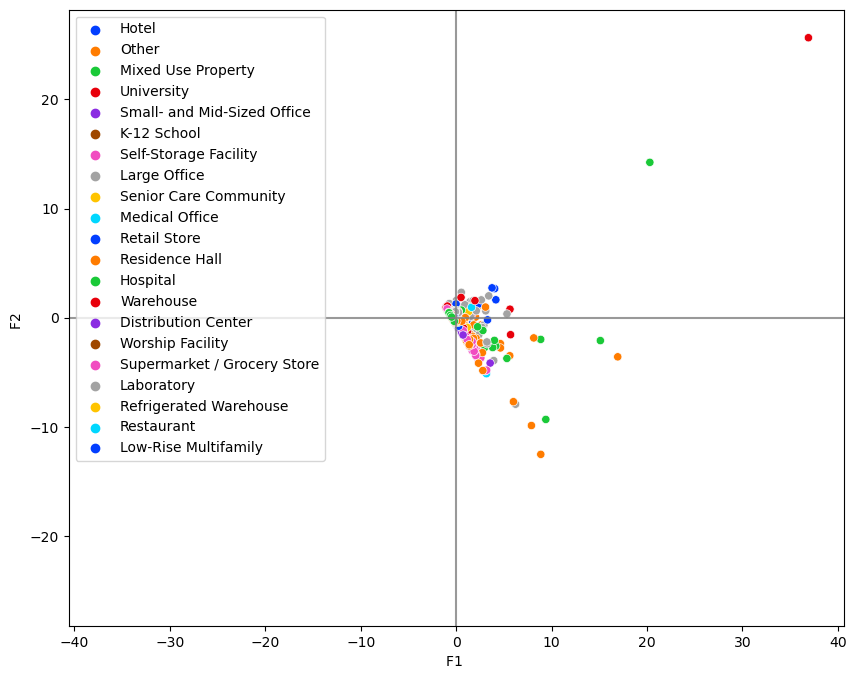

In [57]:
def display_factorial_planes(X_projected, x_y, pca=None, labels='LargestPropertyUseType', clusters=None, alpha=1, figsize=[10,8], marker="."):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (16, 10)

    # On vérifie la variable axis 
    if not len(x_y) == 2: 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y) >= X_.shape[1]: 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=labels, palette='bright')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca: 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else: 
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage de la légende
    plt.legend(loc='best')

# Réimporter la colonne 'nutrition_grade_fr' dans le DataFrame df
df.loc[:, 'PrincipalUsage'] = df_clean['PrincipalUsage']

x_y = [0, 1]
display_factorial_planes(X_proj, x_y, labels=df_clean['PrincipalUsage'])


6. Etude des corrélations : 'Cercle des corrélations' F3 & F4

In [58]:
# Définir les axe x,y
x, y = 2,3

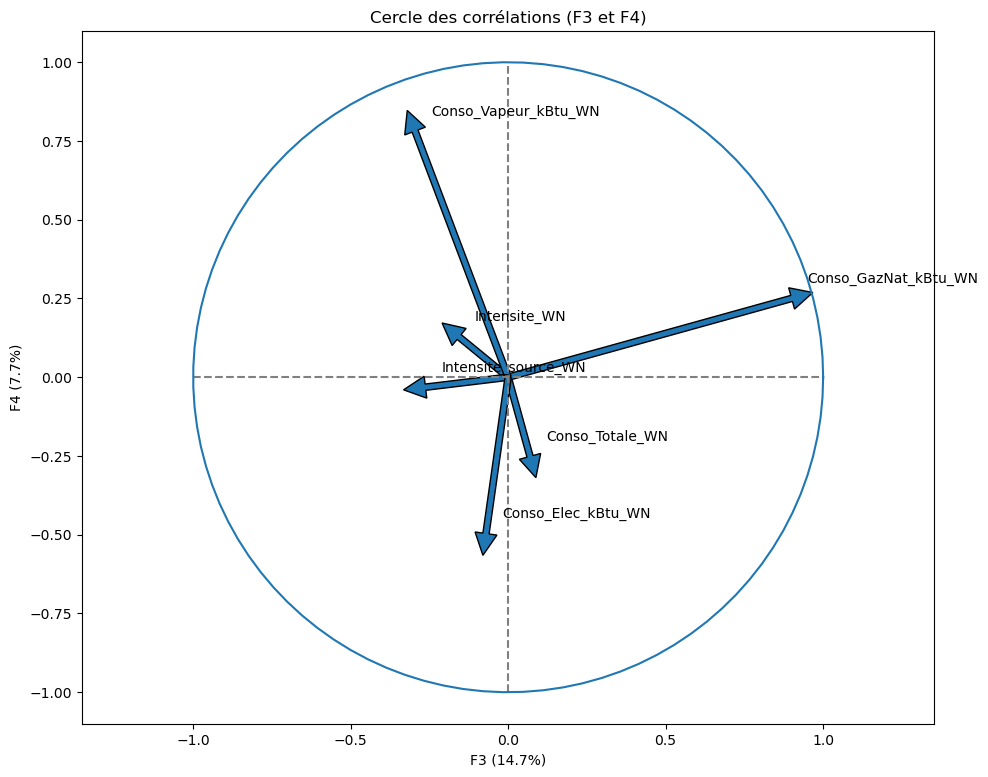

In [59]:
# Création du graphique pour le cercle des corrélations
fig, ax = plt.subplots(figsize=(11, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[2, i] + 0.05,
             pca.components_[3, i] + 0.05,
             features[i])
    
# Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# Nom des axes, avec le pourcentage d'inertie expliquée
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

In [60]:
X_proj = pca.transform(X_scaled)

In [61]:
x_y = (2,3)

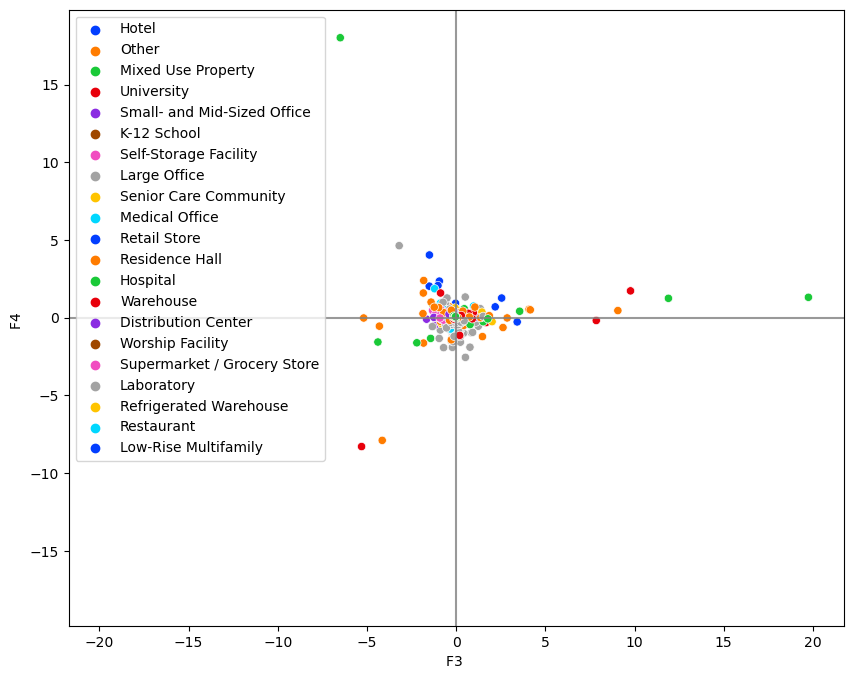

In [62]:
def display_factorial_planes(X_projected, x_y, pca=None, labels='LargestPropertyUseType', clusters=None, alpha=1, figsize=[10,8], marker="."):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (16, 12)

    # On vérifie la variable axis 
    if not len(x_y) == 2: 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y) >= X_.shape[1]: 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=labels, palette='bright')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca: 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else: 
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage de la légende
    plt.legend(loc='best')

# Réimporter la colonne usage principal dans le DataFrame df_clean
df.loc[:, 'PrincipalUsage'] = df_clean['PrincipalUsage']

x_y = [2, 3]
display_factorial_planes(X_proj, x_y, labels=df_clean['PrincipalUsage'])


# V. Pre-processing des données

L'une des étapes les plus importantes lorque nous travaillons sur un problème à résoudre par le Machine Learning, est celle du pre-processsing ou pré-traitement, en français. Celle-ci consiste à mettre en forme les données de la sorte que celle-ci soient de la meilleurs qualité possible pour être traiter ensuite par l'algorithme. Nous sommes ici dans une approche data-centric, en d'autres termes, c'est la qualité des données et non celle du modèle qui va être déterminant sur nos résultats.

Voici les différentes étapes de notre pré-processing :

- Le features engineering pour associer les surfaces & les utilisations , en utilisant l'encodage de sk-learn 'One-Hot-Encoder'
- La création de nouvelles variables pour améliorer notre dataset et l'enrichir
- Conserver les features pertinentes pour ensuite être entrainées dans nos modèles de machine learning

## 1. Le feature engineering pour la dataframe 'consommation'

Création d'un dataframe spécifique pour les opérations de features enginneering pour la dataframe dédié aux consommations

In [55]:
df_fe = df_cat.copy()

In [56]:
df_fe.shape

(1382, 26)

### A. Transformation de la colonne YearBuild

Nous allons également étudier une variable qui pourrait nous intéresser et être utile à notre étude qui est l'année de construction ou de la dernière renovation du bâtiment. On a tendance à croire que plus un bâtiment est vieux, plus sa consommation est elevée car moins bien isolé.
Nous allons donc tranformer notre variable YearBuild, pour avoir l'âge du bâtiment qui semble plus pertient à utiliser sous cette forme.

In [57]:
# Calculer l'âge du bâtiment et mettre à jour la colonne YearBuilt en utilisant .loc[]
df_fe.loc[:, 'YearBuilt'] = 2016 - df_fe['YearBuilt']

# Renommer la colonne pour refléter qu'elle représente l'âge du bâtiment
df_fe.rename(columns={'YearBuilt': 'Age_batiment'}, inplace=True)

### B. Transformation des colonnes en type booléen pour les énergies

Le propos ici n'est pas d'inclure la valeur de la consommation pour les énergies, cela ne repondrait pas à l'attendu du sujet qui est de supprimer le relevé des consommations. Néanmoins, en transformant le contenu des colonnes en booléen, revient à dire, avec quel type d'énergie le bâtiment s'alimente, sans prendre en compte la consommation réelle. Cela apporte permet d'apporter de l'information à notre modèle. Le fait de disposer ou non l'information est plus simple que de faire le relevé exacte de la valeur consommée sur un an. Cela peut-être soit inclue dès maintenant dans notre modèle, ou par la suite si acquérir ces données est relativement facile, ou non.

In [58]:
# Convertir les colonnes énergies en type booléen
def convert_to_bool(value):
    return 1 if value > 0 else 0

# Appliquer la fonction à chaque colonne
for column in ['Conso_GazNat_kBtu_WN', 'Conso_Vapeur_kBtu_WN', 'Conso_Elec_kBtu_WN']:
    df_fe[column] = df_fe[column].apply(lambda x: convert_to_bool(x))

### C. Création de ratio pour les surfaces selon le niveau d'usage

In [59]:
# Création Ratio pour la surface 1
df_fe['ratioSurfaceU1'] = df_fe['Surface_1Usage'] / df_fe['Surface_totale']
df_fe['ratioSurfaceU2'] = df_fe['Surface_2Usage'] / df_fe['Surface_totale']
df_fe['ratioSurfaceU3'] = df_fe['Surface_3Usage'] / df_fe['Surface_totale']

df_fe['TotalRatio'] = df_fe['ratioSurfaceU1'] + df_fe['ratioSurfaceU2'] + df_fe['ratioSurfaceU3']

meanRatio = df_fe['TotalRatio'].mean()

print('Vérification si la moyenne est bien égale à 1 :', meanRatio)

# Suppression de la colonne totalRatio
df_fe.drop(columns=['TotalRatio'], inplace=True)
df_fe.drop(columns=['Surface_1Usage'], inplace=True)
df_fe.drop(columns=['Surface_2Usage'], inplace=True)
df_fe.drop(columns=['Surface_3Usage'], inplace=True)

Vérification si la moyenne est bien égale à 1 : 1.0


Le cumul de nos ratios est égale à 1, ce qui est cohérent et confirme la non-présence de valeurs anormales ou aberrantes.

Nous pouvons supprimer la colonne 'TotalRatio' qui n'est plus utile ainsi que les colonnes concernant les surfaces en valeurs absolue.

### D. Transformation des colonnes catégorielles pour les types d'usage avec le OneHotEncoder pour les consommations

#### i. 1ier Usage

In [60]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Adapter et transformer les données
encoded_data = encoder.fit_transform(df_fe[['NewCatUsage1']])

# Convertir la sortie en un DataFrame pandas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['NewCatUsage1']))

# Réinitialiser l'index du DataFrame d'origine
df_fe.reset_index(drop=True, inplace=True)

# Concaténer les données encodées avec le DataFrame d'origine
df_fe = pd.concat([df_fe, encoded_df], axis=1)

In [61]:
# Boucle pour le produit conditionnel
for col in df_fe.columns:
    if col.startswith('NewCatUsage1') and col != 'NewCatUsage1':
        # Conditionner le remplacement de valeurs
        df_fe[col] = df_fe['ratioSurfaceU1'] * df_fe[col]

#### ii. 2ième Usage

In [62]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Adapter et transformer les données
encoded_data = encoder.fit_transform(df_fe[['NewCatUsage2']])

# Convertir la sortie en un DataFrame pandas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['NewCatUsage2']))

# Réinitialiser l'index du DataFrame d'origine
df_fe.reset_index(drop=True, inplace=True)

# Concaténer les données encodées avec le DataFrame d'origine
df_fe = pd.concat([df_fe, encoded_df], axis=1)

In [63]:
# Boucle pour le produit conditionnel
for col in df_fe.columns:
    if col.startswith('NewCatUsage2') and col != 'NewCatUsage2':
        # Conditionner le remplacement de valeurs
        df_fe[col] = df_fe['ratioSurfaceU2'] * df_fe[col]

#### iii. 3ième usage

In [64]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Adapter et transformer les données
encoded_data = encoder.fit_transform(df_fe[['NewCatUsage3']])

# Convertir la sortie en un DataFrame pandas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['NewCatUsage3']))

# Réinitialiser l'index du DataFrame d'origine
df_fe.reset_index(drop=True, inplace=True)

# Concaténer les données encodées avec le DataFrame d'origine
df_fe = pd.concat([df_fe, encoded_df], axis=1)

In [65]:
# Boucle pour le produit conditionnel
for col in df_fe.columns:
    if col.startswith('NewCatUsage3') and col != 'NewCatUsage3':
        # Conditionner le remplacement de valeurs
        df_fe[col] = df_fe['ratioSurfaceU3'] * df_fe[col]

In [66]:
pd.set_option('display.max_columns', None)
df_fe.head(30)

PropertyName               PrincipalUsage  \
0                           Mayflower park hotel                        Hotel   
1                                Paramount Hotel                        Hotel   
2                        5673-The Westin Seattle                        Hotel   
3                                      HOTEL MAX                        Hotel   
4                    WARWICK SEATTLE HOTEL (ID8)                        Hotel   
5                                  West Precinct                        Other   
6                                         Camlin                        Hotel   
7                              Paramount Theatre                        Other   
8                           311wh-Pioneer Square                        Hotel   
9                           Hotel Monaco Seattle                        Hotel   
10                                5679-W Seattle                        Hotel   
11                       Executive Pacific Plaza                        Hotel   
12                    Crowne Plaza Hotel Seattle                        Hotel   
13                         Hotel Vintage Seattle                        Hotel   
14  The Seattle Public Library - Central Library                        Other   
15                         Downtown Seattle YMCA                        Other   
16                     Renaissance Seattle Hotel                        Hotel   
17                              The Rainier Club           Mixed Use Property   
18                           Arctic Club Seattle                        Hotel   
19                        King County Courthouse                        Other   
20             King County Correctional Facility                        Other   
21                               WATERTOWN HOTEL                        Hotel   
22                            Main Campus Center                   University   
23                                 Seattle Honda                        Other   
24                               Homewood Suites                        Hotel   
25               Marriott Springhill Suites (33)                        Hotel   
26                                    Hotel Five                        Hotel   
27                          Good Shepherd Center  Small- and Mid-Sized Office   
28                       Silver Cloud University                        Hotel   
29                             Lawton Elementary                  K-12 School   

                                          Liste_Usage  Age_batiment  \
0                                               Hotel            89   
1                          Hotel, Parking, Restaurant            20   
2                                               Hotel            47   
3                                               Hotel            90   
4                       Hotel, Parking, Swimming Pool            36   
5                                      Police Station            17   
6                                               Hotel            90   
7               Other - Entertainment/Public Assembly            90   
8                                               Hotel           112   
9                                               Hotel            47   
10                                              Hotel            18   
11                                              Hotel            88   
12                                     Hotel, Parking            36   
13                                     Hotel, Parking            94   
14                      Data Center, Library, Parking            12   
15  Fitness Center/Health Club/Gym, Office, Swimmi...            86   
16                                     Hotel, Parking            33   
17  Office, Other, Other - Lodging/Residential, Re...           109   
18                                              Hotel           100   
19                                         Courthouse           100   
20                               

In [67]:
# Créer une liste des colonnes commençant par le préfixe 'NewCatUsage' et de type float
columns_to_sum = [col for col in df_fe.columns if col.startswith('NewCatUsage') and df_fe[col].dtype == 'float']

# Ajouter une nouvelle colonne contenant la somme des valeurs des colonnes sélectionnées
df_fe['Somme_NewCatUsage'] = df_fe[columns_to_sum].sum(axis=1)

# Faire la moyenne de la nouvelle colonne 
meanverif = df_fe['Somme_NewCatUsage'].mean()
print('Vérification si la moyenne est bien de \"1\"si oui pas de perte d\'information pendant les transformations',meanverif)

# Supprimer la colonne dédiée à la vérification
df_fe.drop(columns=['Somme_NewCatUsage'], inplace=True)

Vérification si la moyenne est bien de "1"si oui pas de perte d'information pendant les transformations 1.0


#### iiii. Consolidation des colonnes ayant le même usage

La dernière étape consiste à regrouper les colonnes avec le même type d'utilisation pour limiter l'inflation de colonne qui pourrait perturber nos modèles par la suite avec ce qu'on appelle 'The curse of dimensions'.

In [68]:
# Initialiser un dictionnaire pour stocker les sommes par suffixe
sums = {}

# Parcourir les colonnes du DataFrame
for col in df_fe.columns:
    # Vérifier si le préfixe est l'un des préfixes souhaités
    if col.startswith(('NewCatUsage1', 'NewCatUsage2', 'NewCatUsage3')):
        # Vérifier si la colonne est de type float
        if df_fe[col].dtype == 'float64':
            # Extraire le suffixe après l'underscore
            suffix = col.split('_')[-1]
            # Ajouter la valeur de la colonne à la somme correspondante dans le dictionnaire
            sums.setdefault(suffix, 0)
            sums[suffix] += df_fe[col]

# Créer un DataFrame à partir du dictionnaire de sommes
result = pd.DataFrame(sums)

In [69]:
# Définir une fonction pour retirer le préfixe
def remove_prefix(column_name):
    prefixes = ['NewCatUsage1_', 'NewCatUsage2_', 'NewCatUsage3_']
    for prefix in prefixes:
        if column_name.startswith(prefix):
            return column_name[len(prefix):]
    return column_name

# Renommer les colonnes en utilisant la fonction
df_fe.rename(columns=remove_prefix, inplace=True)

In [70]:
# Supprimer les colonnes existantes de `df_fe`
df_fe = df_fe.drop(columns=result.columns, errors='ignore')

# Ajouter les colonnes de `result` à `df_fe`
df_fe = pd.concat([df_fe, result], axis=1)

In [71]:
# Sélectionner les colonnes de l'index 26 à l'index 61 et faire la somme
sum_values = df_fe.iloc[:, 26:62].sum(axis=1)

# Ajouter la somme comme une nouvelle colonne
df_fe['Sum_Index_26_to_61'] = sum_values

# Afficher la moyenne de la colonne totale
mean_total = df_fe['Sum_Index_26_to_61'].mean()
print('Si la moyenne de notre colonne total est égale à 1, nous pouvons estimer que nous n\'avons pas fait de fausses manipulations durant les transformations',mean_total)

# Supprimer la colonne dédiée à la vérification
df_fe.drop(columns=['Sum_Index_26_to_61'], inplace=True)

Si la moyenne de notre colonne total est égale à 1, nous pouvons estimer que nous n'avons pas fait de fausses manipulations durant les transformations 1.0


### E. Passage au log de notre variable cible : consommation totale

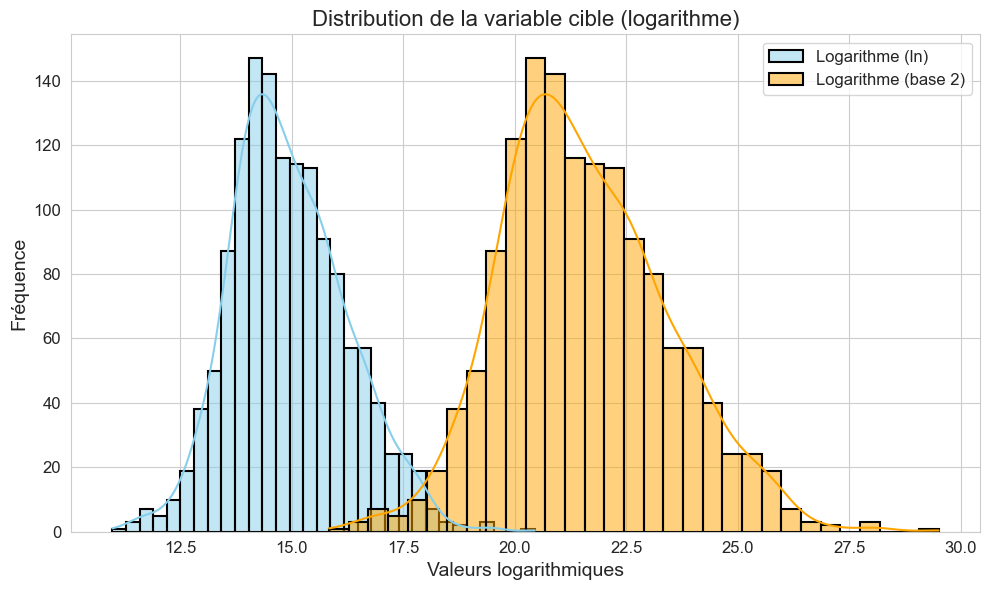

In [72]:
# Passage au logarithme (ln) avec arrondissement
df_fe['Conso_totale_WN_log'] = df_fe['Conso_Totale_WN'].apply(lambda x: round(math.log(x), 10))

# Passage au logarithme base 2 avec arrondissement
df_fe['Conso_totale_WN_log2'] = df_fe['Conso_Totale_WN'].apply(lambda x: round(math.log2(x), 10))

# Création du graphique pour illustrer la distribution 
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_fe['Conso_totale_WN_log'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5, label='Logarithme (ln)')
sns.histplot(df_fe['Conso_totale_WN_log2'], kde=True, color='orange', edgecolor='black', linewidth=1.5, label='Logarithme (base 2)')
plt.title('Distribution de la variable cible (logarithme)', fontsize=16)
plt.xlabel('Valeurs logarithmiques', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Lors de l'analyse descriptive de nos variables clés, nous avons pu voir que notre variable consommation totale ne suivait pas une distribution normale, ainsi que plusieurs extrêmes qui pourraient nuire à notre modèle. Une solution consiste à transformer cette variable cible avec la fonction log les effets négatifs sur notre modèle.

### F. Créations de features avec des ratios ou association de variables

Dans les lignes de commande suivantes, nous allons calculer les ratios suivants :
- La surface par bâtiments au sein de la propriété
- La surface par étage
- La proportion de parking
- La proportion hors-parking
- Nombre d'usage par propriété

In [73]:
# Création de nouvelles features avec arrondi
df_fe['rateParking'] = np.where(df_fe['Surface_parking'] == 0, 0, round(df_fe['Surface_parking'] / df_fe['Surface_totale'], 4)) 
df_fe['rateBuilding'] = round(1 - df_fe['rateParking'], 4)
df_fe['surfaceEtage'] = np.where((df_fe['NbEtages'] != 0) & (~np.isinf(df_fe['Surface_totale'] / df_fe['NbEtages'])),
                                 round(df_fe['Surface_totale'] / df_fe['NbEtages'], 4), 0)
df_fe['surfaceParBat'] = round(df_fe['Surface_totale'] / df_fe['NbBat'].replace(0, 1), 4)

In [74]:
# Colonnes à supprimer
#colonneSupp = df_fe[['Surface_parking', 'NbEtages', 'NbBat']]
#df_fe = df_fe.drop(colonneSupp, axis=1)

In [75]:
# Fonction pour compter le nombre d'usages
def count_usages(usage_string):
    if pd.isnull(usage_string):
        return 0
    else:
        return len(usage_string.split(','))

# Appliquer la fonction count_usages à la colonne 'Liste_Usage' et créer une nouvelle colonne 'nombre_usages'
df_fe['nombre_usages'] = df_fe['Liste_Usage'].apply(count_usages)

# Supprimer la colonne 'Liste_Usage'
df_fe.drop(columns=['Liste_Usage'], inplace=True)

### G. Association des surfaces allouées aux usages 'conso'

In [76]:
# Créer une copie de dataframe à ce niveau d'étude pour avoir un df avec ou sans la transformation ci-dessous où on garde la variable 'surface_totale'
df_fe_SF = df_fe.copy()

In [77]:
# Parcourir chaque nom de catégorie unique
for category in unique_categories_conso:
    # Vérifier si le nom de la catégorie est une colonne dans le DataFrame df_fe
    if category in df_fe.columns:
        # Sélectionner les lignes où la valeur de la colonne est différente de zéro
        non_zero_rows = df_fe[category] != 0
        # Effectuer la multiplication uniquement sur ces lignes
        df_fe.loc[non_zero_rows, category] *= df_fe.loc[non_zero_rows, 'Surface_totale']

In [78]:
# Calculer la somme des valeurs dans les colonnes spécifiées dans unique_categories_conso pour chaque ligne
df_fe['Sum_Values'] = df_fe[unique_categories_conso].sum(axis=1)

# Diviser la somme par la valeur de la surface totale pour chaque ligne
df_fe['Ratio'] = df_fe['Sum_Values'] / df_fe['Surface_totale']

# Extraire les lignes où la colonne "ratio" n'est pas égale à 1
result = df_fe[df_fe['Ratio'] != 1]

moyenne = df_fe['Ratio'].mean()
sum1 = df_fe['Sum_Values'].sum()
sum2 = df_fe['Surface_totale'].sum()

# Vérification de l'exhaustivité des données
result.head(25)
print('Moyenne de la colonne ratio', moyenne)
print('Somme de l\'ensemble des colonnes associées aux usages',sum1)
print('Somme de la colonne surface totale',sum2)

Moyenne de la colonne ratio 1.0
Somme de l'ensemble des colonnes associées aux usages 163495742.797124
Somme de la colonne surface totale 163495742.797124


## 2. Le feature engineering pour le dataframe 'émissions'

In [146]:
df_fe_CO2 = df_cat_CO2.copy()

In [147]:
df_fe_CO2.shape

(1382, 26)

### A. Transformation de la colonne YearBuild (CO2)

In [148]:
# Calculer l'âge du bâtiment et mettre à jour la colonne YearBuilt en utilisant .loc[]
df_fe_CO2.loc[:, 'YearBuilt'] = 2016 - df_fe_CO2['YearBuilt']

# Renommer la colonne pour refléter qu'elle représente l'âge du bâtiment
df_fe_CO2.rename(columns={'YearBuilt': 'Age_batiment'}, inplace=True)

### B. Transformation des colonnes en type booléen pour les énergies (CO2)

In [149]:
# Convertir les colonnes énergies en type booléen
def convert_to_bool(value):
    return 1 if value > 0 else 0

# Appliquer la fonction à chaque colonne
for column in ['Conso_GazNat_kBtu_WN', 'Conso_Vapeur_kBtu_WN', 'Conso_Elec_kBtu_WN']:
    df_fe_CO2[column] = df_fe_CO2[column].apply(lambda x: convert_to_bool(x))

### C. Création de ratio pour les surfaces selon le niveau d'usage (CO2)

In [150]:
# Création Ratio pour la surface 1
df_fe_CO2['ratioSurfaceU1'] = df_fe_CO2['Surface_1Usage'] / df_fe_CO2['Surface_totale']
df_fe_CO2['ratioSurfaceU2'] = df_fe_CO2['Surface_2Usage'] / df_fe_CO2['Surface_totale']
df_fe_CO2['ratioSurfaceU3'] = df_fe_CO2['Surface_3Usage'] / df_fe_CO2['Surface_totale']

df_fe_CO2['TotalRatio'] = df_fe_CO2['ratioSurfaceU1'] + df_fe_CO2['ratioSurfaceU2'] + df_fe_CO2['ratioSurfaceU3']

meanRatio = df_fe_CO2['TotalRatio'].mean()

print('Vérification si la moyenne est bien égale à 1 :', meanRatio)

# Suppression de la colonne totalRatio
df_fe_CO2.drop(columns=['TotalRatio'], inplace=True)
df_fe_CO2.drop(columns=['Surface_1Usage'], inplace=True)
df_fe_CO2.drop(columns=['Surface_2Usage'], inplace=True)
df_fe_CO2.drop(columns=['Surface_3Usage'], inplace=True)


Vérification si la moyenne est bien égale à 1 : 1.0


### D. Transformation des colonnes catégorielles pour les types d'usage avec le OneHotEncoder pour le CO2

#### i. 1ier Usage CO2

In [151]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Adapter et transformer les données
encoded_data = encoder.fit_transform(df_fe_CO2[['NewCatUsage1CO2']])

# Convertir la sortie en un DataFrame pandas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['NewCatUsage1CO2']))

# Réinitialiser l'index du DataFrame d'origine
df_fe_CO2.reset_index(drop=True, inplace=True)

# Concaténer les données encodées avec le DataFrame d'origine
df_fe_CO2 = pd.concat([df_fe_CO2, encoded_df], axis=1)

In [152]:
# Boucle pour le produit conditionnel
for col in df_fe_CO2.columns:
    if col.startswith('NewCatUsage1CO2') and col != 'NewCatUsage1CO2':
        # Conditionner le remplacement de valeurs
        df_fe_CO2[col] = df_fe_CO2['ratioSurfaceU1'] * df_fe_CO2[col]

#### ii. 2ieme Usage CO2

In [153]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Adapter et transformer les données
encoded_data = encoder.fit_transform(df_fe_CO2[['NewCatUsage2CO2']])

# Convertir la sortie en un DataFrame pandas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['NewCatUsage2CO2']))

# Réinitialiser l'index du DataFrame d'origine
df_fe_CO2.reset_index(drop=True, inplace=True)

# Concaténer les données encodées avec le DataFrame d'origine
df_fe_CO2 = pd.concat([df_fe_CO2, encoded_df], axis=1)

In [154]:
# Boucle pour le produit conditionnel
for col in df_fe_CO2.columns:
    if col.startswith('NewCatUsage2CO2') and col != 'NewCatUsage2CO2':
        # Conditionner le remplacement de valeurs
        df_fe_CO2[col] = df_fe_CO2['ratioSurfaceU2'] * df_fe_CO2[col]

#### iii. 3ieme Usage CO2

In [155]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Adapter et transformer les données
encoded_data = encoder.fit_transform(df_fe_CO2[['NewCatUsage3CO2']])

# Convertir la sortie en un DataFrame pandas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['NewCatUsage3CO2']))

# Réinitialiser l'index du DataFrame d'origine
df_fe_CO2.reset_index(drop=True, inplace=True)

# Concaténer les données encodées avec le DataFrame d'origine
df_fe_CO2 = pd.concat([df_fe_CO2, encoded_df], axis=1)

In [156]:
# Boucle pour le produit conditionnel
for col in df_fe_CO2.columns:
    if col.startswith('NewCatUsage3CO2') and col != 'NewCatUsage3CO2':
        # Conditionner le remplacement de valeurs
        df_fe_CO2[col] = df_fe_CO2['ratioSurfaceU3'] * df_fe_CO2[col]

In [157]:
pd.set_option('display.max_columns', None)
df_fe_CO2.head(30)

PropertyName               PrincipalUsage  \
0                           Mayflower park hotel                        Hotel   
1                                Paramount Hotel                        Hotel   
2                        5673-The Westin Seattle                        Hotel   
3                                      HOTEL MAX                        Hotel   
4                    WARWICK SEATTLE HOTEL (ID8)                        Hotel   
5                                  West Precinct                        Other   
6                                         Camlin                        Hotel   
7                              Paramount Theatre                        Other   
8                           311wh-Pioneer Square                        Hotel   
9                           Hotel Monaco Seattle                        Hotel   
10                                5679-W Seattle                        Hotel   
11                       Executive Pacific Plaza                        Hotel   
12                    Crowne Plaza Hotel Seattle                        Hotel   
13                         Hotel Vintage Seattle                        Hotel   
14  The Seattle Public Library - Central Library                        Other   
15                         Downtown Seattle YMCA                        Other   
16                     Renaissance Seattle Hotel                        Hotel   
17                              The Rainier Club           Mixed Use Property   
18                           Arctic Club Seattle                        Hotel   
19                        King County Courthouse                        Other   
20             King County Correctional Facility                        Other   
21                               WATERTOWN HOTEL                        Hotel   
22                            Main Campus Center                   University   
23                                 Seattle Honda                        Other   
24                               Homewood Suites                        Hotel   
25               Marriott Springhill Suites (33)                        Hotel   
26                                    Hotel Five                        Hotel   
27                          Good Shepherd Center  Small- and Mid-Sized Office   
28                       Silver Cloud University                        Hotel   
29                             Lawton Elementary                  K-12 School   

                                          Liste_Usage  Age_batiment  \
0                                               Hotel            89   
1                          Hotel, Parking, Restaurant            20   
2                                               Hotel            47   
3                                               Hotel            90   
4                       Hotel, Parking, Swimming Pool            36   
5                                      Police Station            17   
6                                               Hotel            90   
7               Other - Entertainment/Public Assembly            90   
8                                               Hotel           112   
9                                               Hotel            47   
10                                              Hotel            18   
11                                              Hotel            88   
12                                     Hotel, Parking            36   
13                                     Hotel, Parking            94   
14                      Data Center, Library, Parking            12   
15  Fitness Center/Health Club/Gym, Office, Swimmi...            86   
16                                     Hotel, Parking            33   
17  Office, Other, Other - Lodging/Residential, Re...           109   
18                                              Hotel           100   
19                                         Courthouse           100   
20                               

In [158]:
# Créer une liste des colonnes commençant par le préfixe 'NewCatUsage' et de type float
columns_to_sum = [col for col in df_fe_CO2.columns if col.startswith('NewCatUsage') and df_fe_CO2[col].dtype == 'float']

# Ajouter une nouvelle colonne contenant la somme des valeurs des colonnes sélectionnées
df_fe_CO2['Somme_NewCatUsage'] = df_fe_CO2[columns_to_sum].sum(axis=1)

# Faire la moyenne de la nouvelle colonne 
meanverif = df_fe_CO2['Somme_NewCatUsage'].mean()
print('Vérification si la moyenne est bien de \"1\"si oui pas de perte d\'information pendant les transformations',meanverif)

# Supprimer la colonne dédiée à la vérification
df_fe_CO2.drop(columns=['Somme_NewCatUsage'], inplace=True)

Vérification si la moyenne est bien de "1"si oui pas de perte d'information pendant les transformations 1.0


#### iiii. Consolidation des colonnes ayant le même usage (CO2)

La dernière étape consiste à regrouper les colonnes avec le même type d'utilisation pour limiter l'inflation de colonne qui pourrait perturber nos modèles par la suite avec ce qu'on appelle 'The curse of dimensions'.

In [159]:
# Initialiser un dictionnaire pour stocker les sommes par suffixe
sums = {}

# Parcourir les colonnes du DataFrame
for col in df_fe_CO2.columns:
    # Vérifier si le préfixe est l'un des préfixes souhaités
    if col.startswith(('NewCatUsage1CO2_', 'NewCatUsage2CO2_', 'NewCatUsage3CO2_')):
        # Vérifier si la colonne est de type float
        if df_fe_CO2[col].dtype == 'float64':
            # Extraire le suffixe après l'underscore
            suffix = col.split('_')[-1]
            # Ajouter la valeur de la colonne à la somme correspondante dans le dictionnaire
            sums.setdefault(suffix, 0)
            sums[suffix] += df_fe_CO2[col]

# Créer un DataFrame à partir du dictionnaire de sommes
result = pd.DataFrame(sums)

In [160]:
# Définir une fonction pour retirer le préfixe
def remove_prefix(column_name):
    prefixes = ['NewCatUsage1CO2_', 'NewCatUsage2CO2_', 'NewCatUsage3CO2_']
    for prefix in prefixes:
        if column_name.startswith(prefix):
            return column_name[len(prefix):]
    return column_name

# Renommer les colonnes en utilisant la fonction
df_fe_CO2.rename(columns=remove_prefix, inplace=True)

In [161]:
# Supprimer les colonnes existantes de `df_fe`
df_fe_CO2 = df_fe_CO2.drop(columns=result.columns, errors='ignore')

# Ajouter les colonnes de `result` à `df_fe`
df_fe_CO2 = pd.concat([df_fe_CO2, result], axis=1)

In [162]:
# Sélectionner les colonnes de l'index 26 à l'index 59 et faire la somme
sum_values = df_fe_CO2.iloc[:, 26:43].sum(axis=1)

# Ajouter la somme comme une nouvelle colonne
df_fe_CO2['Sum_Index_26_to_43'] = sum_values

# Afficher la moyenne de la colonne totale
mean_total = df_fe_CO2['Sum_Index_26_to_43'].mean()
print('Si la moyenne de notre colonne total est égale à 1, nous pouvons estimer que nous n\'avons pas fait de fausses manipulations durant les transformations Résultat =',mean_total)

# Supprimer la colonne dédiée à la vérification
df_fe_CO2.drop(columns=['Sum_Index_26_to_43'], inplace=True)

Si la moyenne de notre colonne total est égale à 1, nous pouvons estimer que nous n'avons pas fait de fausses manipulations durant les transformations Résultat = 1.0


### E. Passage au log de notre variable cible : émissions totales (CO2)

In [163]:
df_fe_CO2.describe().round()

Age_batiment  Surface_totale  Surface_parking   NbBat  NbEtages  \
count        1382.0          1382.0           1382.0  1382.0    1382.0   
mean           55.0        118304.0          12062.0     1.0       4.0   
std            33.0        318970.0          40129.0     3.0       7.0   
min             1.0         11285.0              0.0     1.0       0.0   
25%            28.0         28312.0              0.0     1.0       1.0   
50%            51.0         47006.0              0.0     1.0       2.0   
75%            87.0        100231.0              0.0     1.0       4.0   
max           116.0       9320156.0         512608.0   111.0      76.0   

       Intensite_WN  Intensite_source_WN  Conso_Totale_WN  \
count        1382.0               1382.0           1382.0   
mean           76.0                182.0        8317098.0   
std            76.0                190.0       27209020.0   
min             0.0                  0.0          58670.0   
25%            37.0                 82.0        1251293.0   
50%            56.0                139.0        2687930.0   
75%            86.0                208.0        7043507.0   
max           834.0               2620.0      762017565.0   

       Conso_GazNat_kBtu_WN  Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  \
count                1382.0                1382.0              1382.0   
mean                    1.0                   0.0                 1.0   
std                     0.0                   0.0                 0.0   
min                     0.0                   0.0                 0.0   
25%                     0.0                   0.0                 1.0   
50%                     1.0                   0.0                 1.0   
75%                     1.0                   0.0                 1.0   
max                     1.0                   1.0                 1.0   

       Emissions_Totales  Intensite_Emissions  ENERGYSTARScore  \
count             1382.0               1382.0           1382.0   
mean               168.0                  2.0             41.0   
std                589.0                  2.0             38.0   
min                  0.0                  0.0              0.0   
25%                 20.0                  0.0              0.0   
50%                 49.0                  1.0             40.0   
75%                142.0                  2.0             79.0   
max              12307.0                 26.0            100.0   

       ratioSurfaceU1  ratioSurfaceU2  ratioSurfaceU3  Bank Branch  \
count          1382.0          1382.0          1382.0       1382.0   
mean              1.0             0.0             0.0          0.0   
std               0.0             0.0             0.0          0.0   
min               0.0             0.0             0.0          0.0   
25%               1.0             0.0             0.0          0.0   
50%               1.0             0.0             0.0          0.0   
75%               1.0             0.0             0.0          0.0   
max               1.0             0.0             0.0          1.0   

       Data Center  Food Service  Hospital (General Medical & Surgical)  \
count       1382.0        1382.0                                 1382.0   
mean           0.0           0.0                                    0.0   
std            0.0           0.0                                    0.0   
min            0.0           0.0                                    0.0   
25%            0.0           0.0                                    0.0   
50%            0.0           0.0                                    0.0   
75%            0.0           0.0                                    0.0   
max            1.0           1.0                                    1.0   

       Laboratory  Movie Theater  Museum   Other  Other - Education  \
count      1382.0         1382.0  1382.0  1382.0             1382.0   
mean          0.0            0.0     0.0     1.0                0.0   
std           0.0

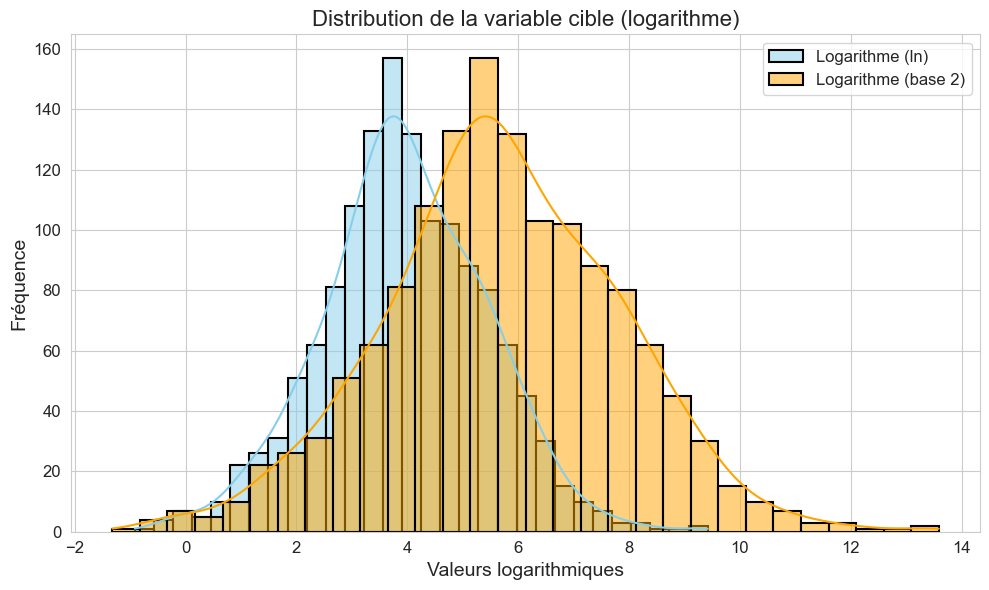

In [164]:
# Passage au logarithme (ln) avec arrondissement
df_fe_CO2['Emissions_Totales_log'] = df_fe_CO2['Emissions_Totales'].apply(lambda x: round(math.log(x), 10))

# Passage au logarithme base 2 avec arrondissement
df_fe_CO2['Emissions_Totales_log2'] = df_fe_CO2['Emissions_Totales'].apply(lambda x: round(math.log2(x), 10))

# Création du graphique pour illustrer la distribution 
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_fe_CO2['Emissions_Totales_log'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5, label='Logarithme (ln)')
sns.histplot(df_fe_CO2['Emissions_Totales_log2'], kde=True, color='orange', edgecolor='black', linewidth=1.5, label='Logarithme (base 2)')
plt.title('Distribution de la variable cible (logarithme)', fontsize=16)
plt.xlabel('Valeurs logarithmiques', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### F. Créations de features avec des ratios ou association de variables (CO2)

In [165]:
# Création de nouvelles features avec arrondi
df_fe_CO2['rateParking'] = np.where(df_fe_CO2['Surface_parking'] == 0, 0, round(df_fe_CO2['Surface_parking'] / df_fe_CO2['Surface_totale'], 4)) 
df_fe_CO2['rateBuilding'] = round(1 - df_fe_CO2['rateParking'], 4)
df_fe_CO2['surfaceEtage'] = np.where((df_fe_CO2['NbEtages'] != 0) & (~np.isinf(df_fe_CO2['Surface_totale'] / df_fe_CO2['NbEtages'])),
                                 round(df_fe_CO2['Surface_totale'] / df_fe_CO2['NbEtages'], 4), 0)
df_fe_CO2['surfaceParBat'] = round(df_fe_CO2['Surface_totale'] / df_fe_CO2['NbBat'].replace(0, 1), 4)


In [166]:
# Colonnes à supprimer
#colonneSupp = df_fe_CO2[['Surface_parking', 'NbEtages', 'NbBat']]
#df_fe_CO2 = df_fe_CO2.drop(colonneSupp, axis=1)

In [167]:
# Fonction pour compter le nombre d'usages
def count_usages(usage_string):
    if pd.isnull(usage_string):
        return 0
    else:
        return len(usage_string.split(','))

# Appliquer la fonction count_usages à la colonne 'Liste_Usage' et créer une nouvelle colonne 'nombre_usages'
df_fe_CO2['nombre_usages'] = df_fe_CO2['Liste_Usage'].apply(count_usages)

# Supprimer la colonne 'Liste_Usage'
df_fe_CO2.drop(columns=['Liste_Usage'], inplace=True)

### G. Association des surfaces allouées aux usages 'CO2'

In [168]:
# Créer une copie de dataframe à ce niveau d'étude pour avoir un df avec ou sans la transformation ci-dessous où on garde la variable 'surface_totale'
df_fe_CO2_SF = df_fe_CO2.copy()
df_fe_CO2_SF.head(50)

PropertyName               PrincipalUsage  \
0                           Mayflower park hotel                        Hotel   
1                                Paramount Hotel                        Hotel   
2                        5673-The Westin Seattle                        Hotel   
3                                      HOTEL MAX                        Hotel   
4                    WARWICK SEATTLE HOTEL (ID8)                        Hotel   
5                                  West Precinct                        Other   
6                                         Camlin                        Hotel   
7                              Paramount Theatre                        Other   
8                           311wh-Pioneer Square                        Hotel   
9                           Hotel Monaco Seattle                        Hotel   
10                                5679-W Seattle                        Hotel   
11                       Executive Pacific Plaza                        Hotel   
12                    Crowne Plaza Hotel Seattle                        Hotel   
13                         Hotel Vintage Seattle                        Hotel   
14  The Seattle Public Library - Central Library                        Other   
15                         Downtown Seattle YMCA                        Other   
16                     Renaissance Seattle Hotel                        Hotel   
17                              The Rainier Club           Mixed Use Property   
18                           Arctic Club Seattle                        Hotel   
19                        King County Courthouse                        Other   
20             King County Correctional Facility                        Other   
21                               WATERTOWN HOTEL                        Hotel   
22                            Main Campus Center                   University   
23                                 Seattle Honda                        Other   
24                               Homewood Suites                        Hotel   
25               Marriott Springhill Suites (33)                        Hotel   
26                                    Hotel Five                        Hotel   
27                          Good Shepherd Center  Small- and Mid-Sized Office   
28                       Silver Cloud University                        Hotel   
29                             Lawton Elementary                  K-12 School   
30                                         SBC52  Small- and Mid-Sized Office   
31                          El Centro de la Raza  Small- and Mid-Sized Office   
32                          Blanchet High School                  K-12 School   
33                                   Vine Street        Self-Storage Facility   
34                          Seattle Hilton Hotel                        Hotel   
35                                  5th and Pine                 Large Office   
36                               1525 4th Avenue                        Other   
37                               Gibraltar Tower  Small- and Mid-Sized Office   
38                                 Mann Building           Mixed Use Property   
39                               Roosevelt Hotel                        Hotel   
40                        Sheraton Seattle Hotel                        Hotel   
41                             Inn at the Market                        Hotel   
42                               Moore Hotel INC                        Hotel   
43                                   QUALITY INN                        Hotel   
44                           Rainier Hospitality                        Hotel   
45                           Sequim Lodging Corp                        Hotel   
46    Homewood Suites by Hilton Seattle Downtonw                        Hotel   
47                        Seattle Hebrew Academy                  K-12 School   
48                 Comfort Suites Seattle Center                   

In [169]:
# Parcourir chaque nom de catégorie unique
for category in unique_categories_CO2:
    # Vérifier si le nom de la catégorie est une colonne dans le DataFrame df_fe
    if category in df_fe_CO2.columns:
        # Sélectionner les lignes où la valeur de la colonne est différente de zéro
        non_zero_rows = df_fe_CO2[category] != 0
        # Effectuer la multiplication uniquement sur ces lignes
        df_fe_CO2.loc[non_zero_rows, category] *= df_fe_CO2.loc[non_zero_rows, 'Surface_totale']

In [170]:
# Calculer la somme des valeurs dans les colonnes spécifiées dans unique_categories_conso pour chaque ligne
df_fe_CO2['Sum_Values'] = df_fe_CO2[unique_categories_CO2].sum(axis=1)

# Diviser la somme par la valeur de la surface totale pour chaque ligne
df_fe_CO2['Ratio'] = df_fe_CO2['Sum_Values'] / df_fe_CO2['Surface_totale']

# Extraire les lignes où la colonne "ratio" n'est pas égale à 1
result = df_fe_CO2[df_fe_CO2['Ratio'] != 1]

moyenne = df_fe_CO2['Ratio'].mean()
sum1 = df_fe_CO2['Sum_Values'].sum()
sum2 = df_fe_CO2['Surface_totale'].sum()

# Vérification de l'exhaustivité des données
result.head(25)
print('Moyenne de la colonne ratio', moyenne)
print('Somme de l\'ensemble des colonnes associées aux usages',sum1)
print('Somme de la colonne surface totale',sum2)

Moyenne de la colonne ratio 1.0
Somme de l'ensemble des colonnes associées aux usages 163495742.797124
Somme de la colonne surface totale 163495742.797124


## 3. Création des dataframe finaux avant ML pour la prédiction de nos target

### A. Dataframe pour les prédictions sur la consommation totale

In [79]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PropertyName                           1382 non-null   object 
 1   PrincipalUsage                         1382 non-null   object 
 2   Age_batiment                           1382 non-null   int64  
 3   Surface_totale                         1382 non-null   float64
 4   Surface_parking                        1382 non-null   int64  
 5   NbBat                                  1382 non-null   float64
 6   NbEtages                               1382 non-null   int64  
 7   1_Usage                                1382 non-null   object 
 8   2_Usage                                1382 non-null   object 
 9   3_Usage                                1382 non-null   object 
 10  Intensite_WN                           1382 non-null   float64
 11  Inte

In [80]:
df_fe_SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PropertyName                           1382 non-null   object 
 1   PrincipalUsage                         1382 non-null   object 
 2   Age_batiment                           1382 non-null   int64  
 3   Surface_totale                         1382 non-null   float64
 4   Surface_parking                        1382 non-null   int64  
 5   NbBat                                  1382 non-null   float64
 6   NbEtages                               1382 non-null   int64  
 7   1_Usage                                1382 non-null   object 
 8   2_Usage                                1382 non-null   object 
 9   3_Usage                                1382 non-null   object 
 10  Intensite_WN                           1382 non-null   float64
 11  Inte

In [81]:
# Sélection des variables pour créer le dataframe final pour être entrainer dans les modèles de machine learning

columnDrop = df_fe[['PropertyName',
                    'Surface_totale',
                    'PrincipalUsage',
                    'Surface_parking',
                    'NbBat',
                    '1_Usage',
                    '2_Usage',                    
                    '3_Usage',
                    'Intensite_WN',
                    'Intensite_source_WN',
                    'Intensite_Emissions',
                    'Emissions_Totales',
                    'ENERGYSTARScore',
                    'Conso_totale_WN_log2',
                    'NewCatUsage1',
                    'NewCatUsage2',
                    'NewCatUsage3',
                    'ratioSurfaceU1',
                    'ratioSurfaceU2',
                    'ratioSurfaceU3',
                    'Ratio',
                    'Sum_Values'
                   ]]

df_ml_conso = df_fe.drop(columnDrop, axis = 1)

In [150]:
# Sélection des variables pour créer le dataframe final pour être entrainer dans les modèles de machine learning
columnDrop = df_fe[['PropertyName',
                    'PrincipalUsage',
                    'Surface_parking',
                    'NbBat',
                    '1_Usage',
                    '2_Usage',                    
                    '3_Usage',
                    'Intensite_WN',
                    'Intensite_source_WN',
                    'Intensite_Emissions',
                    'Emissions_Totales',
                    'ENERGYSTARScore',
                    'Conso_totale_WN_log2',
                    'NewCatUsage1',
                    'NewCatUsage2',
                    'NewCatUsage3',
                    'ratioSurfaceU1',
                    'ratioSurfaceU2',
                    'ratioSurfaceU3',
                   ]]

df_ml_conso_sf = df_fe_SF.drop(columnDrop, axis = 1)

In [82]:
df_ml_conso.head(50)

Age_batiment  NbEtages  Conso_Totale_WN  Conso_GazNat_kBtu_WN  \
0             89        12     7.420717e+06                     1   
1             20        11     8.613529e+06                     1   
2             47        41     7.453927e+07                     1   
3             90        10     6.977326e+06                     1   
4             36        18     1.455378e+07                     1   
5             17         2     1.241169e+07                     1   
6             90        11     5.913680e+06                     1   
7             90         8     6.467521e+06                     1   
8            112        15     1.409293e+07                     1   
9             47        11     1.644742e+07                     1   
10            18        25     2.766570e+07                     1   
11            88         9     6.773461e+06                     1   
12            36        33     2.292581e+07                     1   
13            94        11     1.103913e+07                     1   
14            12        11     1.908881e+07                     0   
15            86         6     1.022418e+07                     1   
16            33        28     3.445927e+07                     1   
17           109         5     7.810652e+06                     1   
18           100        10     1.042772e+07                     1   
19           100        10     4.619434e+07                     1   
20            31        19     4.914702e+07                     1   
21            15         6     3.762066e+06                     1   
22            88         7     1.164878e+07                     1   
23            86         2     1.345475e+06                     0   
24            25         8     5.471352e+06                     1   
25            15        10     1.135943e+07                     1   
26            38         5     4.576579e+06                     1   
27           110         3     4.257426e+06                     1   
28            22         4     6.847921e+06                     1   
29            26         2     1.694664e+06                     1   
30            55         2     6.352848e+06                     1   
31           116         2     3.030708e+06                     1   
32            62         3     7.182866e+06                     1   
33           105         3     2.216686e+06                     1   
34            47        24     1.659791e+07                     1   
35            43         5     9.792638e+06                     0   
36            96         2     1.280910e+06                     1   
37           106         8     5.208385e+06                     0   
38            90         2     1.543033e+07                     1   
39            86        20     4.971557e+06                     1   
40            34        34     8.263345e+07                     1   
41            31         7     5.492152e+06                     1   
42           108         7     5.546546e+06                     1   
43            57         5     5.426467e+06                     1   
44            16         7     6.895794e+06                     1   
45            19         6     5.984330e+06                     1   
46            18         6     7.020780e+06                     1   
47           105         3     3.321788e+06                     1   
48            17         4     5.480883e+06                     1   
49            54         2     3.465988e+06                     1   

    Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  Data Center  \
0                      1                   1          0.0   
1                      0                   1          0.0   
2                      1                   1          0.0   
3                      1                   1          0.0   
4                      0                   1          0.0   
5                      0                   1          0.0   
6                      0                   1          0.0

In [152]:
df_ml_conso_sf.head(50)

Age_batiment  Surface_totale  NbEtages  Conso_Totale_WN  \
0             89         88434.0        12     7.420717e+06   
1             20        103566.0        11     8.613529e+06   
2             47        756493.0        41     7.453927e+07   
3             90         61320.0        10     6.977326e+06   
4             36        191454.0        18     1.455378e+07   
5             17         88830.0         2     1.241169e+07   
6             90         81352.0        11     5.913680e+06   
7             90        102761.0         8     6.467521e+06   
8            112        163984.0        15     1.409293e+07   
9             47        133884.0        11     1.644742e+07   
10            18        336640.0        25     2.766570e+07   
11            88         65009.0         9     6.773461e+06   
12            36        353111.0        33     2.292581e+07   
13            94         92590.0        11     1.103913e+07   
14            12        414987.0        11     1.908881e+07   
15            86        130000.0         6     1.022418e+07   
16            33        433329.0        28     3.445927e+07   
17           109         41688.0         5     7.810652e+06   
18           100        104352.0        10     1.042772e+07   
19           100        537150.0        10     4.619434e+07   
20            31        385274.0        19     4.914702e+07   
21            15         88592.0         6     3.762066e+06   
22            88        125000.0         7     1.164878e+07   
23            86         67224.0         2     1.345475e+06   
24            25        159176.0         8     5.471352e+06   
25            15        128909.0        10     1.135943e+07   
26            38         47994.0         5     4.576579e+06   
27           110         63403.0         3     4.257426e+06   
28            22         81871.0         4     6.847921e+06   
29            26         54986.0         2     1.694664e+06   
30            55         94900.0         2     6.352848e+06   
31           116         58878.0         2     3.030708e+06   
32            62        175015.0         3     7.182866e+06   
33           105         70495.0         3     2.216686e+06   
34            47        348630.0        24     1.659791e+07   
35            43        169531.0         5     9.792638e+06   
36            96         57428.0         2     1.280910e+06   
37           106         39940.0         8     5.208385e+06   
38            90         52459.0         2     1.543033e+07   
39            86         98634.0        20     4.971557e+06   
40            34       1111880.0        34     8.263345e+07   
41            31         64674.0         7     5.492152e+06   
42           108        122810.0         7     5.546546e+06   
43            57        113173.0         5     5.426467e+06   
44            16        110547.0         7     6.895794e+06   
45            19        116790.0         6     5.984330e+06   
46            18        155602.0         6     7.020780e+06   
47           105         56072.0         3     3.321788e+06   
48            17        122942.0         4     5.480883e+06   
49            54         54984.0         2     3.465988e+06   

    Conso_GazNat_kBtu_WN  Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  \
0                      1                     1                   1   
1                      1                     0                   1   
2                      1                     1                   1   
3                      1                     1                   1   
4                      1                     0                   1   
5                      1                     0                   1   
6                      1                     0                   1   
7                      1                     1                   1   
8                      1                     0                   1   
9                      1                     1                   1   
10                  

### B. Dataframe pour les prédictions sur les émissions totales (CO2)

In [140]:
df_fe_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PropertyName                           1382 non-null   object 
 1   PrincipalUsage                         1382 non-null   object 
 2   Age_batiment                           1382 non-null   int64  
 3   Surface_totale                         1382 non-null   float64
 4   Surface_parking                        1382 non-null   int64  
 5   NbBat                                  1382 non-null   float64
 6   NbEtages                               1382 non-null   int64  
 7   1_Usage                                1382 non-null   object 
 8   2_Usage                                1382 non-null   object 
 9   3_Usage                                1382 non-null   object 
 10  Intensite_WN                           1382 non-null   float64
 11  Inte

In [141]:
# Sélection des variables pour créer le dataframe final pour être entrainer dans les modèles de machine learning

columnDrop = df_fe_CO2[['PropertyName',
                        'Surface_totale',
                        'Conso_Totale_WN',
                        'PrincipalUsage',
                        'Surface_parking',
                        'NbBat',
                        '1_Usage',
                        '2_Usage',                    
                        '3_Usage',
                        'Intensite_WN',
                        'Intensite_source_WN',
                        'Intensite_Emissions',
                        'Emissions_Totales_log2',
                        'NewCatUsage1CO2',
                        'NewCatUsage2CO2',
                        'NewCatUsage3CO2',
                        'ratioSurfaceU1',
                        'ratioSurfaceU2',
                        'ratioSurfaceU3',
                        'Ratio',
                        'Sum_Values'
                   ]]

df_ml_CO2 = df_fe_CO2.drop(columnDrop, axis = 1)

In [171]:
# Sélection des variables pour créer le dataframe final pour être entrainer dans les modèles de machine learning

columnDrop = df_fe_CO2_SF[['PropertyName',
                        'Conso_Totale_WN',
                        'PrincipalUsage',
                        'Surface_parking',
                        'NbBat',
                        '1_Usage',
                        '2_Usage',                    
                        '3_Usage',
                        'Intensite_WN',
                        'Intensite_source_WN',
                        'Intensite_Emissions',
                        'Emissions_Totales_log2',
                        'NewCatUsage1CO2',
                        'NewCatUsage2CO2',
                        'NewCatUsage3CO2',
                        'ratioSurfaceU1',
                        'ratioSurfaceU2',
                        'ratioSurfaceU3'
                   ]]

df_ml_CO2_SF = df_fe_CO2_SF.drop(columnDrop, axis = 1)

In [172]:
df_ml_CO2.head(50)

Age_batiment  NbEtages  Conso_GazNat_kBtu_WN  Conso_Vapeur_kBtu_WN  \
0             89        12                     1                     1   
1             20        11                     1                     0   
2             47        41                     1                     1   
3             90        10                     1                     1   
4             36        18                     1                     0   
5             17         2                     1                     0   
6             90        11                     1                     0   
7             90         8                     1                     1   
8            112        15                     1                     0   
9             47        11                     1                     1   
10            18        25                     1                     1   
11            88         9                     1                     1   
12            36        33                     1                     1   
13            94        11                     1                     1   
14            12        11                     0                     1   
15            86         6                     1                     1   
16            33        28                     1                     0   
17           109         5                     1                     1   
18           100        10                     1                     1   
19           100        10                     1                     0   
20            31        19                     1                     0   
21            15         6                     1                     0   
22            88         7                     1                     0   
23            86         2                     0                     0   
24            25         8                     1                     0   
25            15        10                     1                     0   
26            38         5                     1                     0   
27           110         3                     1                     0   
28            22         4                     1                     0   
29            26         2                     1                     0   
30            55         2                     1                     0   
31           116         2                     1                     0   
32            62         3                     1                     0   
33           105         3                     1                     0   
34            47        24                     1                     0   
35            43         5                     0                     0   
36            96         2                     1                     0   
37           106         8                     0                     0   
38            90         2                     1                     0   
39            86        20                     1                     0   
40            34        34                     1                     1   
41            31         7                     1                     0   
42           108         7                     1                     0   
43            57         5                     1                     0   
44            16         7                     1                     0   
45            19         6                     1                     0   
46            18         6                     1                     0   
47           105         3                     1                     0   
48            17         4                     1                     0   
49            54         2                     1                     0   

    Conso_Elec_kBtu_WN  Emissions_Totales  ENERGYSTARScore  Bank Branch  \
0                    1             249.98             60.0          0.0   
1                    1             295.86             61.0          0.0   
2   

In [173]:
df_ml_CO2_SF.head(50)

Age_batiment  Surface_totale  NbEtages  Conso_GazNat_kBtu_WN  \
0             89         88434.0        12                     1   
1             20        103566.0        11                     1   
2             47        756493.0        41                     1   
3             90         61320.0        10                     1   
4             36        191454.0        18                     1   
5             17         88830.0         2                     1   
6             90         81352.0        11                     1   
7             90        102761.0         8                     1   
8            112        163984.0        15                     1   
9             47        133884.0        11                     1   
10            18        336640.0        25                     1   
11            88         65009.0         9                     1   
12            36        353111.0        33                     1   
13            94         92590.0        11                     1   
14            12        414987.0        11                     0   
15            86        130000.0         6                     1   
16            33        433329.0        28                     1   
17           109         41688.0         5                     1   
18           100        104352.0        10                     1   
19           100        537150.0        10                     1   
20            31        385274.0        19                     1   
21            15         88592.0         6                     1   
22            88        125000.0         7                     1   
23            86         67224.0         2                     0   
24            25        159176.0         8                     1   
25            15        128909.0        10                     1   
26            38         47994.0         5                     1   
27           110         63403.0         3                     1   
28            22         81871.0         4                     1   
29            26         54986.0         2                     1   
30            55         94900.0         2                     1   
31           116         58878.0         2                     1   
32            62        175015.0         3                     1   
33           105         70495.0         3                     1   
34            47        348630.0        24                     1   
35            43        169531.0         5                     0   
36            96         57428.0         2                     1   
37           106         39940.0         8                     0   
38            90         52459.0         2                     1   
39            86         98634.0        20                     1   
40            34       1111880.0        34                     1   
41            31         64674.0         7                     1   
42           108        122810.0         7                     1   
43            57        113173.0         5                     1   
44            16        110547.0         7                     1   
45            19        116790.0         6                     1   
46            18        155602.0         6                     1   
47           105         56072.0         3                     1   
48            17        122942.0         4                     1   
49            54         54984.0         2                     1   

    Conso_Vapeur_kBtu_WN  Conso_Elec_kBtu_WN  Emissions_Totales  \
0                      1                   1             249.98   
1                      0                   1             295.86   
2                      1                   1            2089.28   
3                      1                   1             286.43   
4                      0                   1             505.01   
5                      0                   1             301.81   
6                      0                   1             176.14   

### C. Transformation en fichier CSV des dataframe

In [83]:
# Transformer les dataframe avec la pondération des surfaces en valeur absolue en fichier CSV
df_ml_CO2.to_csv('df_ml_CO2.csv', index=False)
df_ml_conso.to_csv('df_ml_conso.csv', index=False)

In [178]:
# Transformer les dataframe sans la pondération des surfaces (en gardant la variable surface_totale)
df_ml_CO2_SF.to_csv('df_ml_CO2_sf.csv', index=False)
df_ml_conso_sf.to_csv('df_ml_conso_sf.csv', index=False)